In [1]:
from model import LeNet
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.backend import image_data_format
import matplotlib.pyplot as plt
import numpy as np

print('Tensorflow version: {}'.format(tf.__version__))

Tensorflow version: 1.12.0


In [2]:
print("[INFO] accessing MNIST...")
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()

print('Straight from the dataset:')
print('Training data shape: {}'.format(trainData.shape))
print('Training labels shape: {}'.format(trainLabels.shape))
print('Test data shape: {}'.format(testData.shape))
print('Test labels shape: {}'.format(testLabels.shape))

# Channels first
if image_data_format() == "channels_first":
    trainData = trainData.reshape((trainData.shape[0], 1, 28, 28))
    testData = testData.reshape((testData.shape[0], 1, 28, 28))
# Channels last
else:
    trainData = trainData.reshape((trainData.shape[0], 28, 28, 1))
    testData = testData.reshape((testData.shape[0], 28, 28, 1))

trainData = trainData.astype(np.float32) / 255.0
testData = testData.astype(np.float32) / 255.0

le = LabelBinarizer()
trainLabels = le.fit_transform(trainLabels)
testLabels = le.transform(testLabels)

print('After data preparation:')
print('Training data shape: {}'.format(trainData.shape))
print('Training labels shape: {}'.format(trainLabels.shape))
print('Test data shape: {}'.format(testData.shape))
print('Test labels shape: {}'.format(testLabels.shape))

[INFO] accessing MNIST...
Straight from the dataset:
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
After data preparation:
Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000, 10)
Test data shape: (10000, 28, 28, 1)
Test labels shape: (10000, 10)


In [3]:
print("[INFO] compiling model...")
opt = SGD(lr=0.01)
properties = {
    'width':    28,
    'height':   28,
    'channels': 1,
    'classes':  10
}
model = LeNet.build(properties)
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)
model.summary()


[INFO] compiling model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2450)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               1225500   
_________________________________________________________________
dense_1 (Dense)              (None, 10)           

In [5]:
print("[INFO] training network...")
H = model.fit(
    trainData, trainLabels,
    validation_data=(testData, testLabels),
    batch_size=128,
    epochs=60,
    verbose=1
)

[INFO] training network...
Train on 60000 samples, validate on 10000 samples
Epoch 1/60
  128/60000 [..............................] - ETA: 4s - loss: 0.0457 - acc: 0.9922

 1408/60000 [..............................] - ETA: 2s - loss: 0.0345 - acc: 0.9901

 2816/60000 [>.............................] - ETA: 2s - loss: 0.0412 - acc: 0.9890

 4224/60000 [=>............................] - ETA: 2s - loss: 0.0392 - acc: 0.9889

 5760/60000 [=>............................] - ETA: 2s - loss: 0.0373 - acc: 0.9892

 7168/60000 [==>...........................] - ETA: 1s - loss: 0.0379 - acc: 0.9886

 8448/60000 [===>..........................] - ETA: 1s - loss: 0.0383 - acc: 0.9880

 9856/60000 [===>..........................] - ETA: 1s - loss: 0.0380 - acc: 0.9881

11008/60000 [====>.........................] - ETA: 1s - loss: 0.0379 - acc: 0.9882

12160/60000 [=====>........................] - ETA: 1s - loss: 0.0375 - acc: 0.9885

13184/60000 [=====>........................] - ETA: 1s - loss: 0.0377 - acc: 0.9884

14720/60000 [======>.......................] - ETA: 1s - loss: 0.0385 - acc: 0.9883

16384/60000 [=======>......................] - ETA: 1s - loss: 0.0381 - acc: 0.9886

17920/60000 [=======>......................] - ETA: 1s - loss: 0.0379 - acc: 0.9887

19584/60000 [========>.....................] - ETA: 1s - loss: 0.0382 - acc: 0.9886

21120/60000 [=========>....................] - ETA: 1s - loss: 0.0388 - acc: 0.9885

22656/60000 [==========>...................] - ETA: 1s - loss: 0.0386 - acc: 0.9887

24192/60000 [===========>..................] - ETA: 1s - loss: 0.0384 - acc: 0.9886

25600/60000 [===========>..................] - ETA: 1s - loss: 0.0385 - acc: 0.9885

27136/60000 [============>.................] - ETA: 1s - loss: 0.0390 - acc: 0.9884

28672/60000 [=============>................] - ETA: 1s - loss: 0.0400 - acc: 0.9882

30080/60000 [==============>...............] - ETA: 1s - loss: 0.0404 - acc: 0.9882

31616/60000 [==============>...............] - ETA: 1s - loss: 0.0407 - acc: 0.9881

33152/60000 [===============>..............] - ETA: 0s - loss: 0.0406 - acc: 0.9881

34688/60000 [================>.............] - ETA: 0s - loss: 0.0403 - acc: 0.9881

36224/60000 [=================>............] - ETA: 0s - loss: 0.0402 - acc: 0.9882

37760/60000 [=================>............] - ETA: 0s - loss: 0.0404 - acc: 0.9882

39296/60000 [==================>...........] - ETA: 0s - loss: 0.0403 - acc: 0.9882

40832/60000 [===================>..........] - ETA: 0s - loss: 0.0404 - acc: 0.9883

42368/60000 [====================>.........] - ETA: 0s - loss: 0.0404 - acc: 0.9882

43904/60000 [====================>.........] - ETA: 0s - loss: 0.0401 - acc: 0.9883

45440/60000 [=====================>........] - ETA: 0s - loss: 0.0397 - acc: 0.9884

46976/60000 [======================>.......] - ETA: 0s - loss: 0.0399 - acc: 0.9882

48384/60000 [=======================>......] - ETA: 0s - loss: 0.0396 - acc: 0.9884

49792/60000 [=======================>......] - ETA: 0s - loss: 0.0397 - acc: 0.9883

51328/60000 [========================>.....] - ETA: 0s - loss: 0.0399 - acc: 0.9883

52864/60000 [=========================>....] - ETA: 0s - loss: 0.0397 - acc: 0.9883

54400/60000 [==========================>...] - ETA: 0s - loss: 0.0399 - acc: 0.9882

55808/60000 [==========================>...] - ETA: 0s - loss: 0.0397 - acc: 0.9883

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0398 - acc: 0.9882

58880/60000 [============================>.] - ETA: 0s - loss: 0.0398 - acc: 0.9882

60000/60000 [==============================] - 2s 38us/step - loss: 0.0399 - acc: 0.9882 - val_loss: 0.0411 - val_acc: 0.9858


Epoch 2/60
  128/60000 [..............................] - ETA: 3s - loss: 0.0330 - acc: 0.9922

 1408/60000 [..............................] - ETA: 2s - loss: 0.0385 - acc: 0.9872

 2688/60000 [>.............................] - ETA: 2s - loss: 0.0363 - acc: 0.9885

 3968/60000 [>.............................] - ETA: 2s - loss: 0.0391 - acc: 0.9879

 5248/60000 [=>............................] - ETA: 2s - loss: 0.0384 - acc: 0.9884

 6528/60000 [==>...........................] - ETA: 2s - loss: 0.0424 - acc: 0.9870

 7808/60000 [==>...........................] - ETA: 2s - loss: 0.0409 - acc: 0.9877

 9088/60000 [===>..........................] - ETA: 2s - loss: 0.0391 - acc: 0.9882

10368/60000 [====>.........................] - ETA: 1s - loss: 0.0402 - acc: 0.9876

11904/60000 [====>.........................] - ETA: 1s - loss: 0.0382 - acc: 0.9882

13440/60000 [=====>........................] - ETA: 1s - loss: 0.0391 - acc: 0.9879

14976/60000 [======>.......................] - ETA: 1s - loss: 0.0388 - acc: 0.9881

16512/60000 [=======>......................] - ETA: 1s - loss: 0.0388 - acc: 0.9883

18048/60000 [========>.....................] - ETA: 1s - loss: 0.0383 - acc: 0.9885

19584/60000 [========>.....................] - ETA: 1s - loss: 0.0379 - acc: 0.9886

21120/60000 [=========>....................] - ETA: 1s - loss: 0.0374 - acc: 0.9888

22656/60000 [==========>...................] - ETA: 1s - loss: 0.0370 - acc: 0.9889

24064/60000 [===========>..................] - ETA: 1s - loss: 0.0364 - acc: 0.9892

25600/60000 [===========>..................] - ETA: 1s - loss: 0.0365 - acc: 0.9892

27136/60000 [============>.................] - ETA: 1s - loss: 0.0373 - acc: 0.9891

28672/60000 [=============>................] - ETA: 1s - loss: 0.0383 - acc: 0.9889

30080/60000 [==============>...............] - ETA: 1s - loss: 0.0383 - acc: 0.9888

31488/60000 [==============>...............] - ETA: 1s - loss: 0.0382 - acc: 0.9889

32896/60000 [===============>..............] - ETA: 0s - loss: 0.0382 - acc: 0.9888

34304/60000 [================>.............] - ETA: 0s - loss: 0.0380 - acc: 0.9888

35840/60000 [================>.............] - ETA: 0s - loss: 0.0379 - acc: 0.9888

37248/60000 [=================>............] - ETA: 0s - loss: 0.0381 - acc: 0.9886

38656/60000 [==================>...........] - ETA: 0s - loss: 0.0377 - acc: 0.9887

40064/60000 [===================>..........] - ETA: 0s - loss: 0.0379 - acc: 0.9885

41472/60000 [===================>..........] - ETA: 0s - loss: 0.0382 - acc: 0.9884

42880/60000 [====================>.........] - ETA: 0s - loss: 0.0383 - acc: 0.9884

44416/60000 [=====================>........] - ETA: 0s - loss: 0.0382 - acc: 0.9884

45824/60000 [=====================>........] - ETA: 0s - loss: 0.0382 - acc: 0.9885

47232/60000 [======================>.......] - ETA: 0s - loss: 0.0382 - acc: 0.9885

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0381 - acc: 0.9885

50048/60000 [========================>.....] - ETA: 0s - loss: 0.0379 - acc: 0.9886

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0381 - acc: 0.9885

52864/60000 [=========================>....] - ETA: 0s - loss: 0.0384 - acc: 0.9884

54272/60000 [==========================>...] - ETA: 0s - loss: 0.0383 - acc: 0.9884

55808/60000 [==========================>...] - ETA: 0s - loss: 0.0384 - acc: 0.9884

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0385 - acc: 0.9884

58752/60000 [============================>.] - ETA: 0s - loss: 0.0387 - acc: 0.9883

60000/60000 [==============================] - 2s 39us/step - loss: 0.0387 - acc: 0.9882 - val_loss: 0.0548 - val_acc: 0.9806


Epoch 3/60
  128/60000 [..............................] - ETA: 4s - loss: 0.0199 - acc: 1.0000

 1408/60000 [..............................] - ETA: 2s - loss: 0.0447 - acc: 0.9879

 2816/60000 [>.............................] - ETA: 2s - loss: 0.0354 - acc: 0.9901

 4224/60000 [=>............................] - ETA: 2s - loss: 0.0323 - acc: 0.9915

 5632/60000 [=>............................] - ETA: 2s - loss: 0.0322 - acc: 0.9915

 7040/60000 [==>...........................] - ETA: 2s - loss: 0.0327 - acc: 0.9906

 8576/60000 [===>..........................] - ETA: 1s - loss: 0.0311 - acc: 0.9914

 9984/60000 [===>..........................] - ETA: 1s - loss: 0.0333 - acc: 0.9906

11392/60000 [====>.........................] - ETA: 1s - loss: 0.0343 - acc: 0.9899

12800/60000 [=====>........................] - ETA: 1s - loss: 0.0347 - acc: 0.9897

14208/60000 [======>.......................] - ETA: 1s - loss: 0.0338 - acc: 0.9899

15872/60000 [======>.......................] - ETA: 1s - loss: 0.0363 - acc: 0.9897

17536/60000 [=======>......................] - ETA: 1s - loss: 0.0363 - acc: 0.9893

19072/60000 [========>.....................] - ETA: 1s - loss: 0.0368 - acc: 0.9894

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0360 - acc: 0.9894

22272/60000 [==========>...................] - ETA: 1s - loss: 0.0359 - acc: 0.9894

23936/60000 [==========>...................] - ETA: 1s - loss: 0.0359 - acc: 0.9893

25472/60000 [===========>..................] - ETA: 1s - loss: 0.0370 - acc: 0.9890

26880/60000 [============>.................] - ETA: 1s - loss: 0.0369 - acc: 0.9890

28416/60000 [=============>................] - ETA: 1s - loss: 0.0371 - acc: 0.9889

29952/60000 [=============>................] - ETA: 1s - loss: 0.0368 - acc: 0.9890

31488/60000 [==============>...............] - ETA: 0s - loss: 0.0371 - acc: 0.9892

33024/60000 [===============>..............] - ETA: 0s - loss: 0.0371 - acc: 0.9892

34560/60000 [================>.............] - ETA: 0s - loss: 0.0370 - acc: 0.9893

35968/60000 [================>.............] - ETA: 0s - loss: 0.0372 - acc: 0.9893

37376/60000 [=================>............] - ETA: 0s - loss: 0.0372 - acc: 0.9893

38784/60000 [==================>...........] - ETA: 0s - loss: 0.0370 - acc: 0.9894

40192/60000 [===================>..........] - ETA: 0s - loss: 0.0373 - acc: 0.9892

41600/60000 [===================>..........] - ETA: 0s - loss: 0.0372 - acc: 0.9892

43008/60000 [====================>.........] - ETA: 0s - loss: 0.0372 - acc: 0.9891

44416/60000 [=====================>........] - ETA: 0s - loss: 0.0370 - acc: 0.9893

45824/60000 [=====================>........] - ETA: 0s - loss: 0.0368 - acc: 0.9893

47232/60000 [======================>.......] - ETA: 0s - loss: 0.0369 - acc: 0.9892

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0370 - acc: 0.9892

49920/60000 [=======================>......] - ETA: 0s - loss: 0.0373 - acc: 0.9891

51200/60000 [========================>.....] - ETA: 0s - loss: 0.0372 - acc: 0.9891

52608/60000 [=========================>....] - ETA: 0s - loss: 0.0370 - acc: 0.9891

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0370 - acc: 0.9891

55552/60000 [==========================>...] - ETA: 0s - loss: 0.0368 - acc: 0.9892

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0371 - acc: 0.9891

58624/60000 [============================>.] - ETA: 0s - loss: 0.0370 - acc: 0.9891

60000/60000 [==============================] - 2s 38us/step - loss: 0.0369 - acc: 0.9891 - val_loss: 0.0398 - val_acc: 0.9868


Epoch 4/60
  128/60000 [..............................] - ETA: 4s - loss: 0.0197 - acc: 0.9922

 1408/60000 [..............................] - ETA: 2s - loss: 0.0284 - acc: 0.9929

 2688/60000 [>.............................] - ETA: 2s - loss: 0.0300 - acc: 0.9903

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0287 - acc: 0.9907

 5376/60000 [=>............................] - ETA: 2s - loss: 0.0283 - acc: 0.9911

 6784/60000 [==>...........................] - ETA: 2s - loss: 0.0306 - acc: 0.9910

 8192/60000 [===>..........................] - ETA: 2s - loss: 0.0324 - acc: 0.9906

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.0331 - acc: 0.9908

10880/60000 [====>.........................] - ETA: 1s - loss: 0.0332 - acc: 0.9908

12160/60000 [=====>........................] - ETA: 1s - loss: 0.0350 - acc: 0.9903

13440/60000 [=====>........................] - ETA: 1s - loss: 0.0352 - acc: 0.9901

14720/60000 [======>.......................] - ETA: 1s - loss: 0.0352 - acc: 0.9900

16000/60000 [=======>......................] - ETA: 1s - loss: 0.0346 - acc: 0.9901

17280/60000 [=======>......................] - ETA: 1s - loss: 0.0340 - acc: 0.9903

18432/60000 [========>.....................] - ETA: 1s - loss: 0.0334 - acc: 0.9905

19840/60000 [========>.....................] - ETA: 1s - loss: 0.0333 - acc: 0.9907

21120/60000 [=========>....................] - ETA: 1s - loss: 0.0341 - acc: 0.9902

22528/60000 [==========>...................] - ETA: 1s - loss: 0.0347 - acc: 0.9900

23808/60000 [==========>...................] - ETA: 1s - loss: 0.0347 - acc: 0.9901

24960/60000 [===========>..................] - ETA: 1s - loss: 0.0347 - acc: 0.9901

26240/60000 [============>.................] - ETA: 1s - loss: 0.0347 - acc: 0.9901

27520/60000 [============>.................] - ETA: 1s - loss: 0.0349 - acc: 0.9898

28800/60000 [=============>................] - ETA: 1s - loss: 0.0349 - acc: 0.9898

30080/60000 [==============>...............] - ETA: 1s - loss: 0.0349 - acc: 0.9898

31232/60000 [==============>...............] - ETA: 1s - loss: 0.0351 - acc: 0.9897

32512/60000 [===============>..............] - ETA: 1s - loss: 0.0351 - acc: 0.9897

33664/60000 [===============>..............] - ETA: 1s - loss: 0.0354 - acc: 0.9896

34944/60000 [================>.............] - ETA: 1s - loss: 0.0356 - acc: 0.9896

36224/60000 [=================>............] - ETA: 0s - loss: 0.0353 - acc: 0.9896

37376/60000 [=================>............] - ETA: 0s - loss: 0.0353 - acc: 0.9896

38656/60000 [==================>...........] - ETA: 0s - loss: 0.0350 - acc: 0.9897

39808/60000 [==================>...........] - ETA: 0s - loss: 0.0350 - acc: 0.9897

41088/60000 [===================>..........] - ETA: 0s - loss: 0.0354 - acc: 0.9895

42368/60000 [====================>.........] - ETA: 0s - loss: 0.0355 - acc: 0.9894

43648/60000 [====================>.........] - ETA: 0s - loss: 0.0360 - acc: 0.9893

44800/60000 [=====================>........] - ETA: 0s - loss: 0.0361 - acc: 0.9893

45952/60000 [=====================>........] - ETA: 0s - loss: 0.0359 - acc: 0.9893

47232/60000 [======================>.......] - ETA: 0s - loss: 0.0361 - acc: 0.9893

48384/60000 [=======================>......] - ETA: 0s - loss: 0.0358 - acc: 0.9894

49664/60000 [=======================>......] - ETA: 0s - loss: 0.0357 - acc: 0.9894

50944/60000 [========================>.....] - ETA: 0s - loss: 0.0356 - acc: 0.9895

52224/60000 [=========================>....] - ETA: 0s - loss: 0.0357 - acc: 0.9894

53504/60000 [=========================>....] - ETA: 0s - loss: 0.0358 - acc: 0.9893

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0357 - acc: 0.9894

55808/60000 [==========================>...] - ETA: 0s - loss: 0.0357 - acc: 0.9894

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0356 - acc: 0.9894

58624/60000 [============================>.] - ETA: 0s - loss: 0.0358 - acc: 0.9893

60000/60000 [==============================] - 3s 43us/step - loss: 0.0357 - acc: 0.9893 - val_loss: 0.0400 - val_acc: 0.9862


Epoch 5/60
  128/60000 [..............................] - ETA: 3s - loss: 0.0332 - acc: 0.9922

 1408/60000 [..............................] - ETA: 2s - loss: 0.0281 - acc: 0.9943

 2816/60000 [>.............................] - ETA: 2s - loss: 0.0325 - acc: 0.9918

 4352/60000 [=>............................] - ETA: 2s - loss: 0.0307 - acc: 0.9917

 5888/60000 [=>............................] - ETA: 1s - loss: 0.0301 - acc: 0.9915

 7040/60000 [==>...........................] - ETA: 2s - loss: 0.0314 - acc: 0.9908

 8576/60000 [===>..........................] - ETA: 1s - loss: 0.0317 - acc: 0.9907

10112/60000 [====>.........................] - ETA: 1s - loss: 0.0309 - acc: 0.9907

11392/60000 [====>.........................] - ETA: 1s - loss: 0.0318 - acc: 0.9903

12800/60000 [=====>........................] - ETA: 1s - loss: 0.0317 - acc: 0.9904

14208/60000 [======>.......................] - ETA: 1s - loss: 0.0332 - acc: 0.9901

15488/60000 [======>.......................] - ETA: 1s - loss: 0.0336 - acc: 0.9899

16896/60000 [=======>......................] - ETA: 1s - loss: 0.0334 - acc: 0.9900

18432/60000 [========>.....................] - ETA: 1s - loss: 0.0335 - acc: 0.9902

19584/60000 [========>.....................] - ETA: 1s - loss: 0.0341 - acc: 0.9899

20992/60000 [=========>....................] - ETA: 1s - loss: 0.0332 - acc: 0.9903

22400/60000 [==========>...................] - ETA: 1s - loss: 0.0328 - acc: 0.9906

23552/60000 [==========>...................] - ETA: 1s - loss: 0.0328 - acc: 0.9906

24960/60000 [===========>..................] - ETA: 1s - loss: 0.0327 - acc: 0.9905

26240/60000 [============>.................] - ETA: 1s - loss: 0.0326 - acc: 0.9905

27520/60000 [============>.................] - ETA: 1s - loss: 0.0330 - acc: 0.9904

28672/60000 [=============>................] - ETA: 1s - loss: 0.0333 - acc: 0.9903

29952/60000 [=============>................] - ETA: 1s - loss: 0.0333 - acc: 0.9903

31104/60000 [==============>...............] - ETA: 1s - loss: 0.0335 - acc: 0.9902

32640/60000 [===============>..............] - ETA: 1s - loss: 0.0339 - acc: 0.9900

34048/60000 [================>.............] - ETA: 1s - loss: 0.0338 - acc: 0.9901

35456/60000 [================>.............] - ETA: 0s - loss: 0.0340 - acc: 0.9899

36992/60000 [=================>............] - ETA: 0s - loss: 0.0336 - acc: 0.9900

38528/60000 [==================>...........] - ETA: 0s - loss: 0.0338 - acc: 0.9900

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0337 - acc: 0.9900

41472/60000 [===================>..........] - ETA: 0s - loss: 0.0331 - acc: 0.9903

43008/60000 [====================>.........] - ETA: 0s - loss: 0.0332 - acc: 0.9902

44544/60000 [=====================>........] - ETA: 0s - loss: 0.0332 - acc: 0.9901

45952/60000 [=====================>........] - ETA: 0s - loss: 0.0331 - acc: 0.9901

47104/60000 [======================>.......] - ETA: 0s - loss: 0.0331 - acc: 0.9900

48512/60000 [=======================>......] - ETA: 0s - loss: 0.0333 - acc: 0.9900

49920/60000 [=======================>......] - ETA: 0s - loss: 0.0336 - acc: 0.9899

51328/60000 [========================>.....] - ETA: 0s - loss: 0.0337 - acc: 0.9898

52608/60000 [=========================>....] - ETA: 0s - loss: 0.0340 - acc: 0.9898

54144/60000 [==========================>...] - ETA: 0s - loss: 0.0340 - acc: 0.9898

55552/60000 [==========================>...] - ETA: 0s - loss: 0.0340 - acc: 0.9898

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0337 - acc: 0.9900

58496/60000 [============================>.] - ETA: 0s - loss: 0.0338 - acc: 0.9900

60000/60000 [==============================] - 2s 40us/step - loss: 0.0343 - acc: 0.9899 - val_loss: 0.0376 - val_acc: 0.9878


Epoch 6/60
  128/60000 [..............................] - ETA: 3s - loss: 0.0192 - acc: 1.0000

 1408/60000 [..............................] - ETA: 2s - loss: 0.0324 - acc: 0.9936

 2688/60000 [>.............................] - ETA: 2s - loss: 0.0317 - acc: 0.9903

 3968/60000 [>.............................] - ETA: 2s - loss: 0.0289 - acc: 0.9919

 5504/60000 [=>............................] - ETA: 2s - loss: 0.0291 - acc: 0.9907

 7168/60000 [==>...........................] - ETA: 2s - loss: 0.0290 - acc: 0.9911

 8576/60000 [===>..........................] - ETA: 1s - loss: 0.0309 - acc: 0.9902

10112/60000 [====>.........................] - ETA: 1s - loss: 0.0321 - acc: 0.9899

11648/60000 [====>.........................] - ETA: 1s - loss: 0.0331 - acc: 0.9899

13184/60000 [=====>........................] - ETA: 1s - loss: 0.0332 - acc: 0.9899

14720/60000 [======>.......................] - ETA: 1s - loss: 0.0327 - acc: 0.9900

16128/60000 [=======>......................] - ETA: 1s - loss: 0.0321 - acc: 0.9901

17664/60000 [=======>......................] - ETA: 1s - loss: 0.0316 - acc: 0.9901

19328/60000 [========>.....................] - ETA: 1s - loss: 0.0329 - acc: 0.9895

20864/60000 [=========>....................] - ETA: 1s - loss: 0.0330 - acc: 0.9895

22272/60000 [==========>...................] - ETA: 1s - loss: 0.0328 - acc: 0.9896

23808/60000 [==========>...................] - ETA: 1s - loss: 0.0331 - acc: 0.9896

25344/60000 [===========>..................] - ETA: 1s - loss: 0.0328 - acc: 0.9896

26752/60000 [============>.................] - ETA: 1s - loss: 0.0324 - acc: 0.9898

28288/60000 [=============>................] - ETA: 1s - loss: 0.0327 - acc: 0.9898

29824/60000 [=============>................] - ETA: 1s - loss: 0.0325 - acc: 0.9898

31104/60000 [==============>...............] - ETA: 1s - loss: 0.0323 - acc: 0.9899

32640/60000 [===============>..............] - ETA: 0s - loss: 0.0327 - acc: 0.9898

34176/60000 [================>.............] - ETA: 0s - loss: 0.0324 - acc: 0.9899

35712/60000 [================>.............] - ETA: 0s - loss: 0.0321 - acc: 0.9900

36992/60000 [=================>............] - ETA: 0s - loss: 0.0323 - acc: 0.9901

38528/60000 [==================>...........] - ETA: 0s - loss: 0.0327 - acc: 0.9899

40064/60000 [===================>..........] - ETA: 0s - loss: 0.0329 - acc: 0.9899

41600/60000 [===================>..........] - ETA: 0s - loss: 0.0326 - acc: 0.9900

43136/60000 [====================>.........] - ETA: 0s - loss: 0.0327 - acc: 0.9901

44544/60000 [=====================>........] - ETA: 0s - loss: 0.0329 - acc: 0.9900

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0336 - acc: 0.9897

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0335 - acc: 0.9898

49152/60000 [=======================>......] - ETA: 0s - loss: 0.0331 - acc: 0.9899

50432/60000 [========================>.....] - ETA: 0s - loss: 0.0330 - acc: 0.9900

51968/60000 [========================>.....] - ETA: 0s - loss: 0.0328 - acc: 0.9901

53504/60000 [=========================>....] - ETA: 0s - loss: 0.0327 - acc: 0.9901

54912/60000 [==========================>...] - ETA: 0s - loss: 0.0329 - acc: 0.9899

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0331 - acc: 0.9899

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0331 - acc: 0.9899

59392/60000 [============================>.] - ETA: 0s - loss: 0.0329 - acc: 0.9900

60000/60000 [==============================] - 2s 38us/step - loss: 0.0327 - acc: 0.9901 - val_loss: 0.0394 - val_acc: 0.9867


Epoch 7/60
  128/60000 [..............................] - ETA: 6s - loss: 0.0414 - acc: 0.9688

 1408/60000 [..............................] - ETA: 2s - loss: 0.0477 - acc: 0.9844

 3072/60000 [>.............................] - ETA: 2s - loss: 0.0365 - acc: 0.9883

 4480/60000 [=>............................] - ETA: 2s - loss: 0.0368 - acc: 0.9884

 6144/60000 [==>...........................] - ETA: 1s - loss: 0.0342 - acc: 0.9894

 7808/60000 [==>...........................] - ETA: 1s - loss: 0.0341 - acc: 0.9899

 9344/60000 [===>..........................] - ETA: 1s - loss: 0.0338 - acc: 0.9898

10880/60000 [====>.........................] - ETA: 1s - loss: 0.0330 - acc: 0.9900

12416/60000 [=====>........................] - ETA: 1s - loss: 0.0330 - acc: 0.9898

13952/60000 [=====>........................] - ETA: 1s - loss: 0.0326 - acc: 0.9900

15232/60000 [======>.......................] - ETA: 1s - loss: 0.0326 - acc: 0.9900

16768/60000 [=======>......................] - ETA: 1s - loss: 0.0327 - acc: 0.9900

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0319 - acc: 0.9904

19712/60000 [========>.....................] - ETA: 1s - loss: 0.0319 - acc: 0.9904

21120/60000 [=========>....................] - ETA: 1s - loss: 0.0328 - acc: 0.9897

22400/60000 [==========>...................] - ETA: 1s - loss: 0.0328 - acc: 0.9898

23680/60000 [==========>...................] - ETA: 1s - loss: 0.0322 - acc: 0.9898

25088/60000 [===========>..................] - ETA: 1s - loss: 0.0324 - acc: 0.9898

26496/60000 [============>.................] - ETA: 1s - loss: 0.0321 - acc: 0.9900

27776/60000 [============>.................] - ETA: 1s - loss: 0.0329 - acc: 0.9897

29312/60000 [=============>................] - ETA: 1s - loss: 0.0324 - acc: 0.9899

30720/60000 [==============>...............] - ETA: 1s - loss: 0.0320 - acc: 0.9901

32128/60000 [===============>..............] - ETA: 1s - loss: 0.0324 - acc: 0.9899

33536/60000 [===============>..............] - ETA: 0s - loss: 0.0327 - acc: 0.9898

34816/60000 [================>.............] - ETA: 0s - loss: 0.0334 - acc: 0.9896

36224/60000 [=================>............] - ETA: 0s - loss: 0.0331 - acc: 0.9897

37504/60000 [=================>............] - ETA: 0s - loss: 0.0329 - acc: 0.9897

39040/60000 [==================>...........] - ETA: 0s - loss: 0.0330 - acc: 0.9897

40576/60000 [===================>..........] - ETA: 0s - loss: 0.0331 - acc: 0.9897

41984/60000 [===================>..........] - ETA: 0s - loss: 0.0331 - acc: 0.9897

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0327 - acc: 0.9899

44928/60000 [=====================>........] - ETA: 0s - loss: 0.0323 - acc: 0.9900

46464/60000 [======================>.......] - ETA: 0s - loss: 0.0324 - acc: 0.9900

47872/60000 [======================>.......] - ETA: 0s - loss: 0.0322 - acc: 0.9901

49408/60000 [=======================>......] - ETA: 0s - loss: 0.0318 - acc: 0.9902

50944/60000 [========================>.....] - ETA: 0s - loss: 0.0321 - acc: 0.9901

52352/60000 [=========================>....] - ETA: 0s - loss: 0.0320 - acc: 0.9902

53888/60000 [=========================>....] - ETA: 0s - loss: 0.0319 - acc: 0.9902

55424/60000 [==========================>...] - ETA: 0s - loss: 0.0317 - acc: 0.9903

56832/60000 [===========================>..] - ETA: 0s - loss: 0.0320 - acc: 0.9903

58368/60000 [============================>.] - ETA: 0s - loss: 0.0319 - acc: 0.9903

59904/60000 [============================>.] - ETA: 0s - loss: 0.0318 - acc: 0.9904

60000/60000 [==============================] - 2s 38us/step - loss: 0.0319 - acc: 0.9904 - val_loss: 0.0412 - val_acc: 0.9858


Epoch 8/60


  128/60000 [..............................] - ETA: 5s - loss: 0.0111 - acc: 1.0000

 1280/60000 [..............................] - ETA: 2s - loss: 0.0367 - acc: 0.9891

 2560/60000 [>.............................] - ETA: 2s - loss: 0.0297 - acc: 0.9914

 3840/60000 [>.............................] - ETA: 2s - loss: 0.0285 - acc: 0.9922

 5120/60000 [=>............................] - ETA: 2s - loss: 0.0303 - acc: 0.9916

 6528/60000 [==>...........................] - ETA: 2s - loss: 0.0316 - acc: 0.9910

 7808/60000 [==>...........................] - ETA: 2s - loss: 0.0296 - acc: 0.9915

 9088/60000 [===>..........................] - ETA: 2s - loss: 0.0288 - acc: 0.9920

10368/60000 [====>.........................] - ETA: 2s - loss: 0.0319 - acc: 0.9904

11648/60000 [====>.........................] - ETA: 2s - loss: 0.0321 - acc: 0.9905

13056/60000 [=====>........................] - ETA: 1s - loss: 0.0317 - acc: 0.9908

14208/60000 [======>.......................] - ETA: 1s - loss: 0.0316 - acc: 0.9907

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0312 - acc: 0.9908

16896/60000 [=======>......................] - ETA: 1s - loss: 0.0318 - acc: 0.9908

18048/60000 [========>.....................] - ETA: 1s - loss: 0.0314 - acc: 0.9910

19200/60000 [========>.....................] - ETA: 1s - loss: 0.0306 - acc: 0.9913

20480/60000 [=========>....................] - ETA: 1s - loss: 0.0305 - acc: 0.9913

21760/60000 [=========>....................] - ETA: 1s - loss: 0.0310 - acc: 0.9913

22912/60000 [==========>...................] - ETA: 1s - loss: 0.0309 - acc: 0.9912

24064/60000 [===========>..................] - ETA: 1s - loss: 0.0306 - acc: 0.9913

25216/60000 [===========>..................] - ETA: 1s - loss: 0.0310 - acc: 0.9911

26496/60000 [============>.................] - ETA: 1s - loss: 0.0311 - acc: 0.9911

27776/60000 [============>.................] - ETA: 1s - loss: 0.0306 - acc: 0.9912

28928/60000 [=============>................] - ETA: 1s - loss: 0.0305 - acc: 0.9912

30208/60000 [==============>...............] - ETA: 1s - loss: 0.0305 - acc: 0.9913

31360/60000 [==============>...............] - ETA: 1s - loss: 0.0303 - acc: 0.9913

32640/60000 [===============>..............] - ETA: 1s - loss: 0.0302 - acc: 0.9913

33920/60000 [===============>..............] - ETA: 1s - loss: 0.0300 - acc: 0.9914

35328/60000 [================>.............] - ETA: 1s - loss: 0.0299 - acc: 0.9913

36864/60000 [=================>............] - ETA: 0s - loss: 0.0299 - acc: 0.9913

38272/60000 [==================>...........] - ETA: 0s - loss: 0.0297 - acc: 0.9914

39808/60000 [==================>...........] - ETA: 0s - loss: 0.0296 - acc: 0.9914

41344/60000 [===================>..........] - ETA: 0s - loss: 0.0295 - acc: 0.9914

42752/60000 [====================>.........] - ETA: 0s - loss: 0.0300 - acc: 0.9912

44288/60000 [=====================>........] - ETA: 0s - loss: 0.0303 - acc: 0.9910

45696/60000 [=====================>........] - ETA: 0s - loss: 0.0301 - acc: 0.9910

47232/60000 [======================>.......] - ETA: 0s - loss: 0.0305 - acc: 0.9909

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0307 - acc: 0.9909

49920/60000 [=======================>......] - ETA: 0s - loss: 0.0306 - acc: 0.9910

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0309 - acc: 0.9909

52864/60000 [=========================>....] - ETA: 0s - loss: 0.0312 - acc: 0.9909

54400/60000 [==========================>...] - ETA: 0s - loss: 0.0308 - acc: 0.9909

55936/60000 [==========================>...] - ETA: 0s - loss: 0.0304 - acc: 0.9911

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0304 - acc: 0.9911

58880/60000 [============================>.] - ETA: 0s - loss: 0.0306 - acc: 0.9911

60000/60000 [==============================] - 3s 42us/step - loss: 0.0305 - acc: 0.9911 - val_loss: 0.0393 - val_acc: 0.9866


Epoch 9/60


  128/60000 [..............................] - ETA: 5s - loss: 0.0621 - acc: 0.9688

 1280/60000 [..............................] - ETA: 2s - loss: 0.0307 - acc: 0.9906

 2688/60000 [>.............................] - ETA: 2s - loss: 0.0248 - acc: 0.9922

 3968/60000 [>.............................] - ETA: 2s - loss: 0.0289 - acc: 0.9909

 5248/60000 [=>............................] - ETA: 2s - loss: 0.0288 - acc: 0.9916

 6528/60000 [==>...........................] - ETA: 2s - loss: 0.0277 - acc: 0.9914

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0264 - acc: 0.9921

 9088/60000 [===>..........................] - ETA: 2s - loss: 0.0254 - acc: 0.9926

10368/60000 [====>.........................] - ETA: 2s - loss: 0.0260 - acc: 0.9924

11392/60000 [====>.........................] - ETA: 2s - loss: 0.0270 - acc: 0.9920

12800/60000 [=====>........................] - ETA: 2s - loss: 0.0269 - acc: 0.9920

14208/60000 [======>.......................] - ETA: 1s - loss: 0.0267 - acc: 0.9920

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0264 - acc: 0.9920

17024/60000 [=======>......................] - ETA: 1s - loss: 0.0265 - acc: 0.9919

18304/60000 [========>.....................] - ETA: 1s - loss: 0.0277 - acc: 0.9915

19840/60000 [========>.....................] - ETA: 1s - loss: 0.0288 - acc: 0.9913

21248/60000 [=========>....................] - ETA: 1s - loss: 0.0286 - acc: 0.9914

22656/60000 [==========>...................] - ETA: 1s - loss: 0.0284 - acc: 0.9914

24192/60000 [===========>..................] - ETA: 1s - loss: 0.0301 - acc: 0.9909

25472/60000 [===========>..................] - ETA: 1s - loss: 0.0300 - acc: 0.9909

26880/60000 [============>.................] - ETA: 1s - loss: 0.0294 - acc: 0.9911

28416/60000 [=============>................] - ETA: 1s - loss: 0.0301 - acc: 0.9909

29952/60000 [=============>................] - ETA: 1s - loss: 0.0296 - acc: 0.9912

31360/60000 [==============>...............] - ETA: 1s - loss: 0.0299 - acc: 0.9911

32896/60000 [===============>..............] - ETA: 1s - loss: 0.0302 - acc: 0.9909

34304/60000 [================>.............] - ETA: 0s - loss: 0.0303 - acc: 0.9908

35840/60000 [================>.............] - ETA: 0s - loss: 0.0303 - acc: 0.9908

37376/60000 [=================>............] - ETA: 0s - loss: 0.0302 - acc: 0.9907

38784/60000 [==================>...........] - ETA: 0s - loss: 0.0304 - acc: 0.9906

40320/60000 [===================>..........] - ETA: 0s - loss: 0.0304 - acc: 0.9906

41472/60000 [===================>..........] - ETA: 0s - loss: 0.0304 - acc: 0.9906

43008/60000 [====================>.........] - ETA: 0s - loss: 0.0303 - acc: 0.9907

44544/60000 [=====================>........] - ETA: 0s - loss: 0.0304 - acc: 0.9907

45952/60000 [=====================>........] - ETA: 0s - loss: 0.0304 - acc: 0.9906

47488/60000 [======================>.......] - ETA: 0s - loss: 0.0302 - acc: 0.9907

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0301 - acc: 0.9908

50560/60000 [========================>.....] - ETA: 0s - loss: 0.0301 - acc: 0.9908

52224/60000 [=========================>....] - ETA: 0s - loss: 0.0297 - acc: 0.9909

53632/60000 [=========================>....] - ETA: 0s - loss: 0.0295 - acc: 0.9910

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0298 - acc: 0.9909

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0298 - acc: 0.9909

58240/60000 [============================>.] - ETA: 0s - loss: 0.0299 - acc: 0.9908

59776/60000 [============================>.] - ETA: 0s - loss: 0.0300 - acc: 0.9908

60000/60000 [==============================] - 2s 39us/step - loss: 0.0299 - acc: 0.9908 - val_loss: 0.0358 - val_acc: 0.9880


Epoch 10/60
  128/60000 [..............................] - ETA: 4s - loss: 0.0238 - acc: 0.9922

 1280/60000 [..............................] - ETA: 2s - loss: 0.0313 - acc: 0.9922

 2688/60000 [>.............................] - ETA: 2s - loss: 0.0291 - acc: 0.9926

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0293 - acc: 0.9910

 5376/60000 [=>............................] - ETA: 2s - loss: 0.0289 - acc: 0.9913

 6784/60000 [==>...........................] - ETA: 2s - loss: 0.0304 - acc: 0.9904

 8064/60000 [===>..........................] - ETA: 2s - loss: 0.0280 - acc: 0.9914

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0281 - acc: 0.9914

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0271 - acc: 0.9916

11776/60000 [====>.........................] - ETA: 1s - loss: 0.0269 - acc: 0.9919

13184/60000 [=====>........................] - ETA: 1s - loss: 0.0278 - acc: 0.9917

14592/60000 [======>.......................] - ETA: 1s - loss: 0.0279 - acc: 0.9917

15744/60000 [======>.......................] - ETA: 1s - loss: 0.0276 - acc: 0.9917

17024/60000 [=======>......................] - ETA: 1s - loss: 0.0275 - acc: 0.9918

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0281 - acc: 0.9916

19456/60000 [========>.....................] - ETA: 1s - loss: 0.0290 - acc: 0.9912

20608/60000 [=========>....................] - ETA: 1s - loss: 0.0288 - acc: 0.9912

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0281 - acc: 0.9915

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0280 - acc: 0.9917

24704/60000 [===========>..................] - ETA: 1s - loss: 0.0282 - acc: 0.9916

26112/60000 [============>.................] - ETA: 1s - loss: 0.0279 - acc: 0.9918

27392/60000 [============>.................] - ETA: 1s - loss: 0.0279 - acc: 0.9916

28800/60000 [=============>................] - ETA: 1s - loss: 0.0281 - acc: 0.9915

30080/60000 [==============>...............] - ETA: 1s - loss: 0.0281 - acc: 0.9914

31488/60000 [==============>...............] - ETA: 1s - loss: 0.0283 - acc: 0.9913

32896/60000 [===============>..............] - ETA: 1s - loss: 0.0280 - acc: 0.9914

34176/60000 [================>.............] - ETA: 1s - loss: 0.0286 - acc: 0.9915

35456/60000 [================>.............] - ETA: 0s - loss: 0.0288 - acc: 0.9914

36992/60000 [=================>............] - ETA: 0s - loss: 0.0283 - acc: 0.9916

38656/60000 [==================>...........] - ETA: 0s - loss: 0.0284 - acc: 0.9916

40320/60000 [===================>..........] - ETA: 0s - loss: 0.0282 - acc: 0.9915

41728/60000 [===================>..........] - ETA: 0s - loss: 0.0285 - acc: 0.9915

43264/60000 [====================>.........] - ETA: 0s - loss: 0.0285 - acc: 0.9916

44672/60000 [=====================>........] - ETA: 0s - loss: 0.0284 - acc: 0.9915

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0284 - acc: 0.9915

47744/60000 [======================>.......] - ETA: 0s - loss: 0.0283 - acc: 0.9916

49152/60000 [=======================>......] - ETA: 0s - loss: 0.0285 - acc: 0.9915

50688/60000 [========================>.....] - ETA: 0s - loss: 0.0284 - acc: 0.9916

52096/60000 [=========================>....] - ETA: 0s - loss: 0.0282 - acc: 0.9916

53760/60000 [=========================>....] - ETA: 0s - loss: 0.0280 - acc: 0.9917

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0282 - acc: 0.9917

56704/60000 [===========================>..] - ETA: 0s - loss: 0.0283 - acc: 0.9917

58112/60000 [============================>.] - ETA: 0s - loss: 0.0285 - acc: 0.9916

59648/60000 [============================>.] - ETA: 0s - loss: 0.0286 - acc: 0.9916

60000/60000 [==============================] - 2s 40us/step - loss: 0.0286 - acc: 0.9916 - val_loss: 0.0351 - val_acc: 0.9887


Epoch 11/60
  128/60000 [..............................] - ETA: 3s - loss: 0.0367 - acc: 0.9922

 1280/60000 [..............................] - ETA: 2s - loss: 0.0247 - acc: 0.9930

 2432/60000 [>.............................] - ETA: 2s - loss: 0.0258 - acc: 0.9918

 3584/60000 [>.............................] - ETA: 2s - loss: 0.0266 - acc: 0.9916

 4608/60000 [=>............................] - ETA: 2s - loss: 0.0272 - acc: 0.9915

 5760/60000 [=>............................] - ETA: 2s - loss: 0.0279 - acc: 0.9917

 6912/60000 [==>...........................] - ETA: 2s - loss: 0.0275 - acc: 0.9918

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0280 - acc: 0.9917

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.0277 - acc: 0.9920

 9984/60000 [===>..........................] - ETA: 2s - loss: 0.0277 - acc: 0.9920

11136/60000 [====>.........................] - ETA: 2s - loss: 0.0278 - acc: 0.9919

12288/60000 [=====>........................] - ETA: 2s - loss: 0.0289 - acc: 0.9917

13312/60000 [=====>........................] - ETA: 2s - loss: 0.0299 - acc: 0.9914

14464/60000 [======>.......................] - ETA: 2s - loss: 0.0300 - acc: 0.9914

15744/60000 [======>.......................] - ETA: 2s - loss: 0.0303 - acc: 0.9915

17024/60000 [=======>......................] - ETA: 2s - loss: 0.0303 - acc: 0.9912

18432/60000 [========>.....................] - ETA: 1s - loss: 0.0304 - acc: 0.9911

19712/60000 [========>.....................] - ETA: 1s - loss: 0.0307 - acc: 0.9910

20992/60000 [=========>....................] - ETA: 1s - loss: 0.0300 - acc: 0.9913

22400/60000 [==========>...................] - ETA: 1s - loss: 0.0298 - acc: 0.9915

23552/60000 [==========>...................] - ETA: 1s - loss: 0.0303 - acc: 0.9914

24832/60000 [===========>..................] - ETA: 1s - loss: 0.0298 - acc: 0.9916

26240/60000 [============>.................] - ETA: 1s - loss: 0.0303 - acc: 0.9915

27520/60000 [============>.................] - ETA: 1s - loss: 0.0302 - acc: 0.9915

28800/60000 [=============>................] - ETA: 1s - loss: 0.0305 - acc: 0.9915

30080/60000 [==============>...............] - ETA: 1s - loss: 0.0304 - acc: 0.9915

31360/60000 [==============>...............] - ETA: 1s - loss: 0.0307 - acc: 0.9915

32768/60000 [===============>..............] - ETA: 1s - loss: 0.0303 - acc: 0.9917

33920/60000 [===============>..............] - ETA: 1s - loss: 0.0301 - acc: 0.9918

35200/60000 [================>.............] - ETA: 1s - loss: 0.0298 - acc: 0.9918

36352/60000 [=================>............] - ETA: 1s - loss: 0.0297 - acc: 0.9919

37760/60000 [=================>............] - ETA: 0s - loss: 0.0293 - acc: 0.9920

39296/60000 [==================>...........] - ETA: 0s - loss: 0.0291 - acc: 0.9920

40704/60000 [===================>..........] - ETA: 0s - loss: 0.0287 - acc: 0.9920

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0288 - acc: 0.9920

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0291 - acc: 0.9918

45440/60000 [=====================>........] - ETA: 0s - loss: 0.0290 - acc: 0.9918

46848/60000 [======================>.......] - ETA: 0s - loss: 0.0286 - acc: 0.9919

48384/60000 [=======================>......] - ETA: 0s - loss: 0.0284 - acc: 0.9919

49792/60000 [=======================>......] - ETA: 0s - loss: 0.0280 - acc: 0.9920

51328/60000 [========================>.....] - ETA: 0s - loss: 0.0280 - acc: 0.9920

52864/60000 [=========================>....] - ETA: 0s - loss: 0.0280 - acc: 0.9920

54272/60000 [==========================>...] - ETA: 0s - loss: 0.0279 - acc: 0.9920

55808/60000 [==========================>...] - ETA: 0s - loss: 0.0280 - acc: 0.9920

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0279 - acc: 0.9920

58624/60000 [============================>.] - ETA: 0s - loss: 0.0277 - acc: 0.9919

60000/60000 [==============================] - 3s 43us/step - loss: 0.0276 - acc: 0.9920 - val_loss: 0.0371 - val_acc: 0.9874


Epoch 12/60


  128/60000 [..............................] - ETA: 5s - loss: 0.0318 - acc: 0.9844

 1408/60000 [..............................] - ETA: 2s - loss: 0.0207 - acc: 0.9936

 2816/60000 [>.............................] - ETA: 2s - loss: 0.0285 - acc: 0.9904

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0248 - acc: 0.9919

 5504/60000 [=>............................] - ETA: 2s - loss: 0.0259 - acc: 0.9920

 6912/60000 [==>...........................] - ETA: 2s - loss: 0.0262 - acc: 0.9923

 8320/60000 [===>..........................] - ETA: 2s - loss: 0.0250 - acc: 0.9924

 9600/60000 [===>..........................] - ETA: 2s - loss: 0.0260 - acc: 0.9924

11136/60000 [====>.........................] - ETA: 1s - loss: 0.0245 - acc: 0.9930

12544/60000 [=====>........................] - ETA: 1s - loss: 0.0246 - acc: 0.9933

14080/60000 [======>.......................] - ETA: 1s - loss: 0.0249 - acc: 0.9928

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0259 - acc: 0.9924

17024/60000 [=======>......................] - ETA: 1s - loss: 0.0259 - acc: 0.9924

18560/60000 [========>.....................] - ETA: 1s - loss: 0.0269 - acc: 0.9920

19840/60000 [========>.....................] - ETA: 1s - loss: 0.0273 - acc: 0.9920

21376/60000 [=========>....................] - ETA: 1s - loss: 0.0269 - acc: 0.9922

22912/60000 [==========>...................] - ETA: 1s - loss: 0.0274 - acc: 0.9921

24192/60000 [===========>..................] - ETA: 1s - loss: 0.0273 - acc: 0.9921

25728/60000 [===========>..................] - ETA: 1s - loss: 0.0268 - acc: 0.9922

27136/60000 [============>.................] - ETA: 1s - loss: 0.0272 - acc: 0.9923

28416/60000 [=============>................] - ETA: 1s - loss: 0.0273 - acc: 0.9922

29952/60000 [=============>................] - ETA: 1s - loss: 0.0275 - acc: 0.9921

31232/60000 [==============>...............] - ETA: 1s - loss: 0.0274 - acc: 0.9921

32640/60000 [===============>..............] - ETA: 1s - loss: 0.0276 - acc: 0.9919

33920/60000 [===============>..............] - ETA: 0s - loss: 0.0271 - acc: 0.9920

35456/60000 [================>.............] - ETA: 0s - loss: 0.0271 - acc: 0.9921

36736/60000 [=================>............] - ETA: 0s - loss: 0.0269 - acc: 0.9922

38144/60000 [==================>...........] - ETA: 0s - loss: 0.0270 - acc: 0.9921

39680/60000 [==================>...........] - ETA: 0s - loss: 0.0270 - acc: 0.9920

41344/60000 [===================>..........] - ETA: 0s - loss: 0.0269 - acc: 0.9920

42880/60000 [====================>.........] - ETA: 0s - loss: 0.0266 - acc: 0.9921

44288/60000 [=====================>........] - ETA: 0s - loss: 0.0264 - acc: 0.9922

45824/60000 [=====================>........] - ETA: 0s - loss: 0.0265 - acc: 0.9921

47232/60000 [======================>.......] - ETA: 0s - loss: 0.0262 - acc: 0.9922

48768/60000 [=======================>......] - ETA: 0s - loss: 0.0262 - acc: 0.9922

50304/60000 [========================>.....] - ETA: 0s - loss: 0.0262 - acc: 0.9922

51712/60000 [========================>.....] - ETA: 0s - loss: 0.0265 - acc: 0.9921

53248/60000 [=========================>....] - ETA: 0s - loss: 0.0267 - acc: 0.9920

54656/60000 [==========================>...] - ETA: 0s - loss: 0.0268 - acc: 0.9919

55936/60000 [==========================>...] - ETA: 0s - loss: 0.0268 - acc: 0.9919

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0268 - acc: 0.9919

58624/60000 [============================>.] - ETA: 0s - loss: 0.0269 - acc: 0.9919

60000/60000 [==============================] - 2s 39us/step - loss: 0.0268 - acc: 0.9919 - val_loss: 0.0351 - val_acc: 0.9874


Epoch 13/60
  128/60000 [..............................] - ETA: 4s - loss: 0.0068 - acc: 1.0000

 1280/60000 [..............................] - ETA: 2s - loss: 0.0232 - acc: 0.9953

 2688/60000 [>.............................] - ETA: 2s - loss: 0.0261 - acc: 0.9929

 3968/60000 [>.............................] - ETA: 2s - loss: 0.0271 - acc: 0.9919

 5120/60000 [=>............................] - ETA: 2s - loss: 0.0262 - acc: 0.9926

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.0268 - acc: 0.9917

 7552/60000 [==>...........................] - ETA: 2s - loss: 0.0265 - acc: 0.9918

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.0259 - acc: 0.9916

10368/60000 [====>.........................] - ETA: 2s - loss: 0.0268 - acc: 0.9917

11776/60000 [====>.........................] - ETA: 1s - loss: 0.0264 - acc: 0.9918

13056/60000 [=====>........................] - ETA: 1s - loss: 0.0267 - acc: 0.9919

14464/60000 [======>.......................] - ETA: 1s - loss: 0.0261 - acc: 0.9920

15872/60000 [======>.......................] - ETA: 1s - loss: 0.0272 - acc: 0.9918

17408/60000 [=======>......................] - ETA: 1s - loss: 0.0266 - acc: 0.9921

18944/60000 [========>.....................] - ETA: 1s - loss: 0.0268 - acc: 0.9921

20224/60000 [=========>....................] - ETA: 1s - loss: 0.0266 - acc: 0.9921

21632/60000 [=========>....................] - ETA: 1s - loss: 0.0265 - acc: 0.9920

22912/60000 [==========>...................] - ETA: 1s - loss: 0.0262 - acc: 0.9921

24320/60000 [===========>..................] - ETA: 1s - loss: 0.0262 - acc: 0.9923

25728/60000 [===========>..................] - ETA: 1s - loss: 0.0264 - acc: 0.9923

27008/60000 [============>.................] - ETA: 1s - loss: 0.0264 - acc: 0.9924

28416/60000 [=============>................] - ETA: 1s - loss: 0.0263 - acc: 0.9924

29824/60000 [=============>................] - ETA: 1s - loss: 0.0260 - acc: 0.9924

31232/60000 [==============>...............] - ETA: 1s - loss: 0.0259 - acc: 0.9924

32640/60000 [===============>..............] - ETA: 1s - loss: 0.0258 - acc: 0.9924

33920/60000 [===============>..............] - ETA: 1s - loss: 0.0261 - acc: 0.9922

35456/60000 [================>.............] - ETA: 0s - loss: 0.0260 - acc: 0.9922

36864/60000 [=================>............] - ETA: 0s - loss: 0.0260 - acc: 0.9922

38400/60000 [==================>...........] - ETA: 0s - loss: 0.0260 - acc: 0.9921

39680/60000 [==================>...........] - ETA: 0s - loss: 0.0260 - acc: 0.9922

41088/60000 [===================>..........] - ETA: 0s - loss: 0.0257 - acc: 0.9922

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0254 - acc: 0.9924

43904/60000 [====================>.........] - ETA: 0s - loss: 0.0254 - acc: 0.9923

45312/60000 [=====================>........] - ETA: 0s - loss: 0.0255 - acc: 0.9923

46592/60000 [======================>.......] - ETA: 0s - loss: 0.0255 - acc: 0.9923

47872/60000 [======================>.......] - ETA: 0s - loss: 0.0252 - acc: 0.9924

49024/60000 [=======================>......] - ETA: 0s - loss: 0.0251 - acc: 0.9925

50304/60000 [========================>.....] - ETA: 0s - loss: 0.0257 - acc: 0.9923

51712/60000 [========================>.....] - ETA: 0s - loss: 0.0259 - acc: 0.9922

52864/60000 [=========================>....] - ETA: 0s - loss: 0.0260 - acc: 0.9922

54144/60000 [==========================>...] - ETA: 0s - loss: 0.0259 - acc: 0.9922

55424/60000 [==========================>...] - ETA: 0s - loss: 0.0259 - acc: 0.9921

56832/60000 [===========================>..] - ETA: 0s - loss: 0.0259 - acc: 0.9922

58240/60000 [============================>.] - ETA: 0s - loss: 0.0261 - acc: 0.9921

59520/60000 [============================>.] - ETA: 0s - loss: 0.0259 - acc: 0.9922

60000/60000 [==============================] - 2s 41us/step - loss: 0.0259 - acc: 0.9922 - val_loss: 0.0351 - val_acc: 0.9885


Epoch 14/60
  128/60000 [..............................] - ETA: 2s - loss: 0.0270 - acc: 0.9922

 1280/60000 [..............................] - ETA: 2s - loss: 0.0223 - acc: 0.9922

 2560/60000 [>.............................] - ETA: 2s - loss: 0.0212 - acc: 0.9934

 3968/60000 [>.............................] - ETA: 2s - loss: 0.0206 - acc: 0.9937

 5376/60000 [=>............................] - ETA: 2s - loss: 0.0224 - acc: 0.9939

 6784/60000 [==>...........................] - ETA: 2s - loss: 0.0230 - acc: 0.9935

 8192/60000 [===>..........................] - ETA: 1s - loss: 0.0222 - acc: 0.9934

 9600/60000 [===>..........................] - ETA: 1s - loss: 0.0217 - acc: 0.9938

10624/60000 [====>.........................] - ETA: 1s - loss: 0.0219 - acc: 0.9937

12032/60000 [=====>........................] - ETA: 1s - loss: 0.0212 - acc: 0.9940

13440/60000 [=====>........................] - ETA: 1s - loss: 0.0218 - acc: 0.9938

14720/60000 [======>.......................] - ETA: 1s - loss: 0.0224 - acc: 0.9938

16128/60000 [=======>......................] - ETA: 1s - loss: 0.0220 - acc: 0.9939

17408/60000 [=======>......................] - ETA: 1s - loss: 0.0225 - acc: 0.9935

18816/60000 [========>.....................] - ETA: 1s - loss: 0.0236 - acc: 0.9931

20224/60000 [=========>....................] - ETA: 1s - loss: 0.0235 - acc: 0.9932

21504/60000 [=========>....................] - ETA: 1s - loss: 0.0239 - acc: 0.9931

23040/60000 [==========>...................] - ETA: 1s - loss: 0.0249 - acc: 0.9929

24320/60000 [===========>..................] - ETA: 1s - loss: 0.0251 - acc: 0.9929

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0249 - acc: 0.9930

27392/60000 [============>.................] - ETA: 1s - loss: 0.0246 - acc: 0.9931

28672/60000 [=============>................] - ETA: 1s - loss: 0.0245 - acc: 0.9931

30080/60000 [==============>...............] - ETA: 1s - loss: 0.0248 - acc: 0.9931

31488/60000 [==============>...............] - ETA: 1s - loss: 0.0247 - acc: 0.9931

32896/60000 [===============>..............] - ETA: 1s - loss: 0.0244 - acc: 0.9932

34304/60000 [================>.............] - ETA: 0s - loss: 0.0245 - acc: 0.9931

35584/60000 [================>.............] - ETA: 0s - loss: 0.0247 - acc: 0.9931

36864/60000 [=================>............] - ETA: 0s - loss: 0.0244 - acc: 0.9932

38272/60000 [==================>...........] - ETA: 0s - loss: 0.0243 - acc: 0.9931

39680/60000 [==================>...........] - ETA: 0s - loss: 0.0243 - acc: 0.9931

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0243 - acc: 0.9930

42368/60000 [====================>.........] - ETA: 0s - loss: 0.0242 - acc: 0.9930

43648/60000 [====================>.........] - ETA: 0s - loss: 0.0242 - acc: 0.9929

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0243 - acc: 0.9929

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0243 - acc: 0.9928

47488/60000 [======================>.......] - ETA: 0s - loss: 0.0245 - acc: 0.9928

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0247 - acc: 0.9927

50048/60000 [========================>.....] - ETA: 0s - loss: 0.0247 - acc: 0.9928

51328/60000 [========================>.....] - ETA: 0s - loss: 0.0248 - acc: 0.9928

52608/60000 [=========================>....] - ETA: 0s - loss: 0.0248 - acc: 0.9927

53760/60000 [=========================>....] - ETA: 0s - loss: 0.0249 - acc: 0.9927

55168/60000 [==========================>...] - ETA: 0s - loss: 0.0249 - acc: 0.9927

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0253 - acc: 0.9926

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0251 - acc: 0.9927

59136/60000 [============================>.] - ETA: 0s - loss: 0.0251 - acc: 0.9926

60000/60000 [==============================] - 2s 41us/step - loss: 0.0251 - acc: 0.9927 - val_loss: 0.0369 - val_acc: 0.9875


Epoch 15/60
  128/60000 [..............................] - ETA: 3s - loss: 0.0363 - acc: 0.9844

 1280/60000 [..............................] - ETA: 2s - loss: 0.0295 - acc: 0.9922

 2688/60000 [>.............................] - ETA: 2s - loss: 0.0315 - acc: 0.9911

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0315 - acc: 0.9915

 5504/60000 [=>............................] - ETA: 2s - loss: 0.0315 - acc: 0.9911

 6784/60000 [==>...........................] - ETA: 2s - loss: 0.0294 - acc: 0.9915

 8320/60000 [===>..........................] - ETA: 1s - loss: 0.0268 - acc: 0.9924

 9728/60000 [===>..........................] - ETA: 1s - loss: 0.0252 - acc: 0.9927

11008/60000 [====>.........................] - ETA: 1s - loss: 0.0258 - acc: 0.9923

12416/60000 [=====>........................] - ETA: 1s - loss: 0.0248 - acc: 0.9927

13952/60000 [=====>........................] - ETA: 1s - loss: 0.0246 - acc: 0.9928

15232/60000 [======>.......................] - ETA: 1s - loss: 0.0249 - acc: 0.9928

16640/60000 [=======>......................] - ETA: 1s - loss: 0.0253 - acc: 0.9928

18048/60000 [========>.....................] - ETA: 1s - loss: 0.0247 - acc: 0.9931

19456/60000 [========>.....................] - ETA: 1s - loss: 0.0246 - acc: 0.9932

20864/60000 [=========>....................] - ETA: 1s - loss: 0.0246 - acc: 0.9930

22144/60000 [==========>...................] - ETA: 1s - loss: 0.0248 - acc: 0.9929

23552/60000 [==========>...................] - ETA: 1s - loss: 0.0250 - acc: 0.9926

24832/60000 [===========>..................] - ETA: 1s - loss: 0.0245 - acc: 0.9927

26240/60000 [============>.................] - ETA: 1s - loss: 0.0243 - acc: 0.9927

27648/60000 [============>.................] - ETA: 1s - loss: 0.0241 - acc: 0.9927

28928/60000 [=============>................] - ETA: 1s - loss: 0.0240 - acc: 0.9926

30208/60000 [==============>...............] - ETA: 1s - loss: 0.0239 - acc: 0.9928

31616/60000 [==============>...............] - ETA: 1s - loss: 0.0242 - acc: 0.9927

33024/60000 [===============>..............] - ETA: 1s - loss: 0.0248 - acc: 0.9925

34560/60000 [================>.............] - ETA: 0s - loss: 0.0247 - acc: 0.9926

35840/60000 [================>.............] - ETA: 0s - loss: 0.0247 - acc: 0.9926

37120/60000 [=================>............] - ETA: 0s - loss: 0.0251 - acc: 0.9926

38272/60000 [==================>...........] - ETA: 0s - loss: 0.0249 - acc: 0.9926

39552/60000 [==================>...........] - ETA: 0s - loss: 0.0249 - acc: 0.9926

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0247 - acc: 0.9927

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0249 - acc: 0.9927

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0247 - acc: 0.9927

44928/60000 [=====================>........] - ETA: 0s - loss: 0.0248 - acc: 0.9926

46208/60000 [======================>.......] - ETA: 0s - loss: 0.0245 - acc: 0.9927

47488/60000 [======================>.......] - ETA: 0s - loss: 0.0245 - acc: 0.9928

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0245 - acc: 0.9928

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0245 - acc: 0.9927

51584/60000 [========================>.....] - ETA: 0s - loss: 0.0245 - acc: 0.9927

52992/60000 [=========================>....] - ETA: 0s - loss: 0.0245 - acc: 0.9927

54144/60000 [==========================>...] - ETA: 0s - loss: 0.0244 - acc: 0.9927

55424/60000 [==========================>...] - ETA: 0s - loss: 0.0244 - acc: 0.9927

56832/60000 [===========================>..] - ETA: 0s - loss: 0.0244 - acc: 0.9927

58240/60000 [============================>.] - ETA: 0s - loss: 0.0243 - acc: 0.9927

59648/60000 [============================>.] - ETA: 0s - loss: 0.0241 - acc: 0.9928

60000/60000 [==============================] - 2s 41us/step - loss: 0.0241 - acc: 0.9928 - val_loss: 0.0383 - val_acc: 0.9867


Epoch 16/60
  128/60000 [..............................] - ETA: 2s - loss: 0.0178 - acc: 0.9922

 1408/60000 [..............................] - ETA: 2s - loss: 0.0239 - acc: 0.9929

 2816/60000 [>.............................] - ETA: 2s - loss: 0.0275 - acc: 0.9904

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0310 - acc: 0.9897

 5632/60000 [=>............................] - ETA: 2s - loss: 0.0319 - acc: 0.9904

 7040/60000 [==>...........................] - ETA: 2s - loss: 0.0295 - acc: 0.9911

 8448/60000 [===>..........................] - ETA: 1s - loss: 0.0288 - acc: 0.9914

 9856/60000 [===>..........................] - ETA: 1s - loss: 0.0282 - acc: 0.9917

11136/60000 [====>.........................] - ETA: 1s - loss: 0.0275 - acc: 0.9921

12544/60000 [=====>........................] - ETA: 1s - loss: 0.0275 - acc: 0.9926

13952/60000 [=====>........................] - ETA: 1s - loss: 0.0267 - acc: 0.9925

15360/60000 [======>.......................] - ETA: 1s - loss: 0.0268 - acc: 0.9924

16640/60000 [=======>......................] - ETA: 1s - loss: 0.0266 - acc: 0.9923

18048/60000 [========>.....................] - ETA: 1s - loss: 0.0268 - acc: 0.9921

19328/60000 [========>.....................] - ETA: 1s - loss: 0.0266 - acc: 0.9922

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0261 - acc: 0.9924

22144/60000 [==========>...................] - ETA: 1s - loss: 0.0257 - acc: 0.9925

23424/60000 [==========>...................] - ETA: 1s - loss: 0.0251 - acc: 0.9925

24832/60000 [===========>..................] - ETA: 1s - loss: 0.0248 - acc: 0.9928

26240/60000 [============>.................] - ETA: 1s - loss: 0.0244 - acc: 0.9929

27776/60000 [============>.................] - ETA: 1s - loss: 0.0246 - acc: 0.9928

29056/60000 [=============>................] - ETA: 1s - loss: 0.0245 - acc: 0.9928

30592/60000 [==============>...............] - ETA: 1s - loss: 0.0245 - acc: 0.9928

31872/60000 [==============>...............] - ETA: 1s - loss: 0.0244 - acc: 0.9928

33152/60000 [===============>..............] - ETA: 1s - loss: 0.0241 - acc: 0.9930

34560/60000 [================>.............] - ETA: 0s - loss: 0.0241 - acc: 0.9930

35840/60000 [================>.............] - ETA: 0s - loss: 0.0240 - acc: 0.9930

37120/60000 [=================>............] - ETA: 0s - loss: 0.0244 - acc: 0.9928

38272/60000 [==================>...........] - ETA: 0s - loss: 0.0241 - acc: 0.9928

39680/60000 [==================>...........] - ETA: 0s - loss: 0.0240 - acc: 0.9929

41088/60000 [===================>..........] - ETA: 0s - loss: 0.0240 - acc: 0.9929

42368/60000 [====================>.........] - ETA: 0s - loss: 0.0242 - acc: 0.9928

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0239 - acc: 0.9930

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0237 - acc: 0.9931

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0236 - acc: 0.9931

47232/60000 [======================>.......] - ETA: 0s - loss: 0.0237 - acc: 0.9931

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0235 - acc: 0.9932

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0236 - acc: 0.9931

51584/60000 [========================>.....] - ETA: 0s - loss: 0.0237 - acc: 0.9930

53120/60000 [=========================>....] - ETA: 0s - loss: 0.0237 - acc: 0.9930

54528/60000 [==========================>...] - ETA: 0s - loss: 0.0235 - acc: 0.9930

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0234 - acc: 0.9930

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0234 - acc: 0.9930

59264/60000 [============================>.] - ETA: 0s - loss: 0.0234 - acc: 0.9929

60000/60000 [==============================] - 2s 41us/step - loss: 0.0235 - acc: 0.9929 - val_loss: 0.0358 - val_acc: 0.9876


Epoch 17/60
  128/60000 [..............................] - ETA: 5s - loss: 0.0054 - acc: 1.0000

 1408/60000 [..............................] - ETA: 2s - loss: 0.0120 - acc: 0.9972

 2816/60000 [>.............................] - ETA: 2s - loss: 0.0228 - acc: 0.9929

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0231 - acc: 0.9927

 5248/60000 [=>............................] - ETA: 2s - loss: 0.0219 - acc: 0.9933

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0233 - acc: 0.9925

 8064/60000 [===>..........................] - ETA: 2s - loss: 0.0231 - acc: 0.9922

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.0234 - acc: 0.9920

11008/60000 [====>.........................] - ETA: 1s - loss: 0.0243 - acc: 0.9917

12416/60000 [=====>........................] - ETA: 1s - loss: 0.0232 - acc: 0.9923

13696/60000 [=====>........................] - ETA: 1s - loss: 0.0237 - acc: 0.9922

15232/60000 [======>.......................] - ETA: 1s - loss: 0.0230 - acc: 0.9923

16640/60000 [=======>......................] - ETA: 1s - loss: 0.0238 - acc: 0.9922

18048/60000 [========>.....................] - ETA: 1s - loss: 0.0230 - acc: 0.9926

19584/60000 [========>.....................] - ETA: 1s - loss: 0.0230 - acc: 0.9926

20992/60000 [=========>....................] - ETA: 1s - loss: 0.0223 - acc: 0.9930

22272/60000 [==========>...................] - ETA: 1s - loss: 0.0222 - acc: 0.9931

23552/60000 [==========>...................] - ETA: 1s - loss: 0.0222 - acc: 0.9930

24960/60000 [===========>..................] - ETA: 1s - loss: 0.0222 - acc: 0.9929

26240/60000 [============>.................] - ETA: 1s - loss: 0.0228 - acc: 0.9926

27520/60000 [============>.................] - ETA: 1s - loss: 0.0227 - acc: 0.9927

29056/60000 [=============>................] - ETA: 1s - loss: 0.0227 - acc: 0.9926

30464/60000 [==============>...............] - ETA: 1s - loss: 0.0226 - acc: 0.9925

31744/60000 [==============>...............] - ETA: 1s - loss: 0.0227 - acc: 0.9925

32896/60000 [===============>..............] - ETA: 1s - loss: 0.0229 - acc: 0.9926

34304/60000 [================>.............] - ETA: 0s - loss: 0.0235 - acc: 0.9922

35712/60000 [================>.............] - ETA: 0s - loss: 0.0233 - acc: 0.9924

37248/60000 [=================>............] - ETA: 0s - loss: 0.0239 - acc: 0.9923

38528/60000 [==================>...........] - ETA: 0s - loss: 0.0241 - acc: 0.9922

39552/60000 [==================>...........] - ETA: 0s - loss: 0.0240 - acc: 0.9923

40704/60000 [===================>..........] - ETA: 0s - loss: 0.0238 - acc: 0.9923

42112/60000 [====================>.........] - ETA: 0s - loss: 0.0236 - acc: 0.9924

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0236 - acc: 0.9925

44672/60000 [=====================>........] - ETA: 0s - loss: 0.0238 - acc: 0.9923

46208/60000 [======================>.......] - ETA: 0s - loss: 0.0240 - acc: 0.9923

47744/60000 [======================>.......] - ETA: 0s - loss: 0.0237 - acc: 0.9924

49280/60000 [=======================>......] - ETA: 0s - loss: 0.0234 - acc: 0.9925

50432/60000 [========================>.....] - ETA: 0s - loss: 0.0232 - acc: 0.9927

52096/60000 [=========================>....] - ETA: 0s - loss: 0.0233 - acc: 0.9927

53376/60000 [=========================>....] - ETA: 0s - loss: 0.0231 - acc: 0.9928

54912/60000 [==========================>...] - ETA: 0s - loss: 0.0229 - acc: 0.9929

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0228 - acc: 0.9929

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0228 - acc: 0.9928

59008/60000 [============================>.] - ETA: 0s - loss: 0.0226 - acc: 0.9929

60000/60000 [==============================] - 2s 41us/step - loss: 0.0228 - acc: 0.9929 - val_loss: 0.0441 - val_acc: 0.9840


Epoch 18/60
  128/60000 [..............................] - ETA: 3s - loss: 0.0085 - acc: 1.0000

 1280/60000 [..............................] - ETA: 2s - loss: 0.0143 - acc: 0.9961

 2560/60000 [>.............................] - ETA: 2s - loss: 0.0147 - acc: 0.9949

 3840/60000 [>.............................] - ETA: 2s - loss: 0.0145 - acc: 0.9956

 5120/60000 [=>............................] - ETA: 2s - loss: 0.0162 - acc: 0.9947

 6144/60000 [==>...........................] - ETA: 2s - loss: 0.0164 - acc: 0.9948

 7552/60000 [==>...........................] - ETA: 2s - loss: 0.0168 - acc: 0.9946

 8832/60000 [===>..........................] - ETA: 2s - loss: 0.0182 - acc: 0.9940

10112/60000 [====>.........................] - ETA: 2s - loss: 0.0191 - acc: 0.9936

11520/60000 [====>.........................] - ETA: 2s - loss: 0.0201 - acc: 0.9934

12800/60000 [=====>........................] - ETA: 1s - loss: 0.0198 - acc: 0.9935

14080/60000 [======>.......................] - ETA: 1s - loss: 0.0197 - acc: 0.9937

15488/60000 [======>.......................] - ETA: 1s - loss: 0.0194 - acc: 0.9937

16896/60000 [=======>......................] - ETA: 1s - loss: 0.0190 - acc: 0.9939

18048/60000 [========>.....................] - ETA: 1s - loss: 0.0193 - acc: 0.9938

19200/60000 [========>.....................] - ETA: 1s - loss: 0.0199 - acc: 0.9937

20352/60000 [=========>....................] - ETA: 1s - loss: 0.0196 - acc: 0.9939

21504/60000 [=========>....................] - ETA: 1s - loss: 0.0201 - acc: 0.9936

22784/60000 [==========>...................] - ETA: 1s - loss: 0.0200 - acc: 0.9938

23936/60000 [==========>...................] - ETA: 1s - loss: 0.0202 - acc: 0.9936

25088/60000 [===========>..................] - ETA: 1s - loss: 0.0204 - acc: 0.9935

25984/60000 [===========>..................] - ETA: 1s - loss: 0.0210 - acc: 0.9933

27264/60000 [============>.................] - ETA: 1s - loss: 0.0216 - acc: 0.9933

28544/60000 [=============>................] - ETA: 1s - loss: 0.0213 - acc: 0.9934

29568/60000 [=============>................] - ETA: 1s - loss: 0.0216 - acc: 0.9934

30848/60000 [==============>...............] - ETA: 1s - loss: 0.0214 - acc: 0.9935

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0216 - acc: 0.9935

33280/60000 [===============>..............] - ETA: 1s - loss: 0.0215 - acc: 0.9936

34688/60000 [================>.............] - ETA: 1s - loss: 0.0216 - acc: 0.9936

35840/60000 [================>.............] - ETA: 1s - loss: 0.0217 - acc: 0.9936

37120/60000 [=================>............] - ETA: 0s - loss: 0.0218 - acc: 0.9936

38528/60000 [==================>...........] - ETA: 0s - loss: 0.0217 - acc: 0.9936

39808/60000 [==================>...........] - ETA: 0s - loss: 0.0213 - acc: 0.9938

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0215 - acc: 0.9937

42112/60000 [====================>.........] - ETA: 0s - loss: 0.0215 - acc: 0.9937

43392/60000 [====================>.........] - ETA: 0s - loss: 0.0213 - acc: 0.9938

44672/60000 [=====================>........] - ETA: 0s - loss: 0.0212 - acc: 0.9938

45952/60000 [=====================>........] - ETA: 0s - loss: 0.0213 - acc: 0.9937

47104/60000 [======================>.......] - ETA: 0s - loss: 0.0213 - acc: 0.9937

48512/60000 [=======================>......] - ETA: 0s - loss: 0.0212 - acc: 0.9938

49664/60000 [=======================>......] - ETA: 0s - loss: 0.0213 - acc: 0.9937

50816/60000 [========================>.....] - ETA: 0s - loss: 0.0215 - acc: 0.9936

52224/60000 [=========================>....] - ETA: 0s - loss: 0.0213 - acc: 0.9937

53376/60000 [=========================>....] - ETA: 0s - loss: 0.0216 - acc: 0.9936

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0215 - acc: 0.9936

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0218 - acc: 0.9935

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0222 - acc: 0.9934

58880/60000 [============================>.] - ETA: 0s - loss: 0.0222 - acc: 0.9934

60000/60000 [==============================] - 3s 45us/step - loss: 0.0222 - acc: 0.9935 - val_loss: 0.0337 - val_acc: 0.9887


Epoch 19/60


  128/60000 [..............................] - ETA: 4s - loss: 0.0139 - acc: 1.0000

 1408/60000 [..............................] - ETA: 2s - loss: 0.0160 - acc: 0.9957

 2816/60000 [>.............................] - ETA: 2s - loss: 0.0197 - acc: 0.9940

 3968/60000 [>.............................] - ETA: 2s - loss: 0.0212 - acc: 0.9937

 5120/60000 [=>............................] - ETA: 2s - loss: 0.0223 - acc: 0.9924

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.0218 - acc: 0.9927

 7552/60000 [==>...........................] - ETA: 2s - loss: 0.0204 - acc: 0.9931

 8832/60000 [===>..........................] - ETA: 2s - loss: 0.0198 - acc: 0.9933

 9984/60000 [===>..........................] - ETA: 2s - loss: 0.0189 - acc: 0.9938

11264/60000 [====>.........................] - ETA: 2s - loss: 0.0190 - acc: 0.9937

12288/60000 [=====>........................] - ETA: 2s - loss: 0.0192 - acc: 0.9938

13440/60000 [=====>........................] - ETA: 2s - loss: 0.0193 - acc: 0.9938

14592/60000 [======>.......................] - ETA: 2s - loss: 0.0195 - acc: 0.9938

15744/60000 [======>.......................] - ETA: 1s - loss: 0.0211 - acc: 0.9933

17024/60000 [=======>......................] - ETA: 1s - loss: 0.0209 - acc: 0.9934

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0209 - acc: 0.9934

19456/60000 [========>.....................] - ETA: 1s - loss: 0.0205 - acc: 0.9936

20480/60000 [=========>....................] - ETA: 1s - loss: 0.0203 - acc: 0.9938

21760/60000 [=========>....................] - ETA: 1s - loss: 0.0202 - acc: 0.9937

23040/60000 [==========>...................] - ETA: 1s - loss: 0.0207 - acc: 0.9936

24192/60000 [===========>..................] - ETA: 1s - loss: 0.0205 - acc: 0.9936

25600/60000 [===========>..................] - ETA: 1s - loss: 0.0201 - acc: 0.9938

26880/60000 [============>.................] - ETA: 1s - loss: 0.0206 - acc: 0.9938

28288/60000 [=============>................] - ETA: 1s - loss: 0.0211 - acc: 0.9937

29568/60000 [=============>................] - ETA: 1s - loss: 0.0215 - acc: 0.9936

30848/60000 [==============>...............] - ETA: 1s - loss: 0.0216 - acc: 0.9934

32128/60000 [===============>..............] - ETA: 1s - loss: 0.0214 - acc: 0.9935

33408/60000 [===============>..............] - ETA: 1s - loss: 0.0215 - acc: 0.9935

34688/60000 [================>.............] - ETA: 1s - loss: 0.0216 - acc: 0.9933

35840/60000 [================>.............] - ETA: 1s - loss: 0.0213 - acc: 0.9935

37248/60000 [=================>............] - ETA: 0s - loss: 0.0216 - acc: 0.9934

38528/60000 [==================>...........] - ETA: 0s - loss: 0.0214 - acc: 0.9935

39808/60000 [==================>...........] - ETA: 0s - loss: 0.0215 - acc: 0.9934

41088/60000 [===================>..........] - ETA: 0s - loss: 0.0214 - acc: 0.9935

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0214 - acc: 0.9935

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0214 - acc: 0.9935

44672/60000 [=====================>........] - ETA: 0s - loss: 0.0211 - acc: 0.9936

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0214 - acc: 0.9936

47360/60000 [======================>.......] - ETA: 0s - loss: 0.0211 - acc: 0.9937

48384/60000 [=======================>......] - ETA: 0s - loss: 0.0212 - acc: 0.9937

49664/60000 [=======================>......] - ETA: 0s - loss: 0.0210 - acc: 0.9938

50944/60000 [========================>.....] - ETA: 0s - loss: 0.0211 - acc: 0.9938

52224/60000 [=========================>....] - ETA: 0s - loss: 0.0211 - acc: 0.9937

53632/60000 [=========================>....] - ETA: 0s - loss: 0.0213 - acc: 0.9938

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0213 - acc: 0.9937

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0211 - acc: 0.9938

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0212 - acc: 0.9938

58624/60000 [============================>.] - ETA: 0s - loss: 0.0211 - acc: 0.9938

59776/60000 [============================>.] - ETA: 0s - loss: 0.0213 - acc: 0.9937

60000/60000 [==============================] - 3s 45us/step - loss: 0.0212 - acc: 0.9937 - val_loss: 0.0349 - val_acc: 0.9877


Epoch 20/60
  128/60000 [..............................] - ETA: 3s - loss: 0.0026 - acc: 1.0000

 1280/60000 [..............................] - ETA: 2s - loss: 0.0164 - acc: 0.9977

 2560/60000 [>.............................] - ETA: 2s - loss: 0.0160 - acc: 0.9965

 3712/60000 [>.............................] - ETA: 2s - loss: 0.0183 - acc: 0.9954

 4992/60000 [=>............................] - ETA: 2s - loss: 0.0191 - acc: 0.9948

 6272/60000 [==>...........................] - ETA: 2s - loss: 0.0191 - acc: 0.9946

 7296/60000 [==>...........................] - ETA: 2s - loss: 0.0188 - acc: 0.9947

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.0182 - acc: 0.9948

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.0185 - acc: 0.9946

10624/60000 [====>.........................] - ETA: 2s - loss: 0.0186 - acc: 0.9944

11904/60000 [====>.........................] - ETA: 2s - loss: 0.0188 - acc: 0.9945

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0204 - acc: 0.9943

14336/60000 [======>.......................] - ETA: 2s - loss: 0.0200 - acc: 0.9946

15360/60000 [======>.......................] - ETA: 2s - loss: 0.0198 - acc: 0.9945

16640/60000 [=======>......................] - ETA: 1s - loss: 0.0193 - acc: 0.9947

17920/60000 [=======>......................] - ETA: 1s - loss: 0.0196 - acc: 0.9945

19072/60000 [========>.....................] - ETA: 1s - loss: 0.0202 - acc: 0.9942

20480/60000 [=========>....................] - ETA: 1s - loss: 0.0197 - acc: 0.9944

21760/60000 [=========>....................] - ETA: 1s - loss: 0.0207 - acc: 0.9941

23168/60000 [==========>...................] - ETA: 1s - loss: 0.0206 - acc: 0.9941

24448/60000 [===========>..................] - ETA: 1s - loss: 0.0204 - acc: 0.9942

25728/60000 [===========>..................] - ETA: 1s - loss: 0.0205 - acc: 0.9941

27008/60000 [============>.................] - ETA: 1s - loss: 0.0208 - acc: 0.9939

28288/60000 [=============>................] - ETA: 1s - loss: 0.0205 - acc: 0.9940

29568/60000 [=============>................] - ETA: 1s - loss: 0.0206 - acc: 0.9938

30720/60000 [==============>...............] - ETA: 1s - loss: 0.0203 - acc: 0.9939

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0202 - acc: 0.9940

33280/60000 [===============>..............] - ETA: 1s - loss: 0.0202 - acc: 0.9940

34688/60000 [================>.............] - ETA: 1s - loss: 0.0202 - acc: 0.9940

35968/60000 [================>.............] - ETA: 1s - loss: 0.0202 - acc: 0.9940

37120/60000 [=================>............] - ETA: 0s - loss: 0.0202 - acc: 0.9939

38528/60000 [==================>...........] - ETA: 0s - loss: 0.0201 - acc: 0.9940

39680/60000 [==================>...........] - ETA: 0s - loss: 0.0199 - acc: 0.9940

41088/60000 [===================>..........] - ETA: 0s - loss: 0.0198 - acc: 0.9940

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0197 - acc: 0.9941

43392/60000 [====================>.........] - ETA: 0s - loss: 0.0199 - acc: 0.9940

44672/60000 [=====================>........] - ETA: 0s - loss: 0.0201 - acc: 0.9940

45824/60000 [=====================>........] - ETA: 0s - loss: 0.0201 - acc: 0.9940

47104/60000 [======================>.......] - ETA: 0s - loss: 0.0203 - acc: 0.9938

48512/60000 [=======================>......] - ETA: 0s - loss: 0.0204 - acc: 0.9938

49536/60000 [=======================>......] - ETA: 0s - loss: 0.0202 - acc: 0.9939

50816/60000 [========================>.....] - ETA: 0s - loss: 0.0203 - acc: 0.9939

52096/60000 [=========================>....] - ETA: 0s - loss: 0.0202 - acc: 0.9939

53376/60000 [=========================>....] - ETA: 0s - loss: 0.0201 - acc: 0.9939

54528/60000 [==========================>...] - ETA: 0s - loss: 0.0200 - acc: 0.9940

55808/60000 [==========================>...] - ETA: 0s - loss: 0.0202 - acc: 0.9939

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0203 - acc: 0.9939

58112/60000 [============================>.] - ETA: 0s - loss: 0.0205 - acc: 0.9938

59136/60000 [============================>.] - ETA: 0s - loss: 0.0206 - acc: 0.9938

60000/60000 [==============================] - 3s 46us/step - loss: 0.0207 - acc: 0.9937 - val_loss: 0.0358 - val_acc: 0.9873


Epoch 21/60
  128/60000 [..............................] - ETA: 3s - loss: 0.0303 - acc: 0.9844

 1408/60000 [..............................] - ETA: 2s - loss: 0.0264 - acc: 0.9922

 2816/60000 [>.............................] - ETA: 2s - loss: 0.0244 - acc: 0.9929

 4352/60000 [=>............................] - ETA: 2s - loss: 0.0258 - acc: 0.9922

 5760/60000 [=>............................] - ETA: 2s - loss: 0.0220 - acc: 0.9938

 7040/60000 [==>...........................] - ETA: 2s - loss: 0.0205 - acc: 0.9945

 8448/60000 [===>..........................] - ETA: 1s - loss: 0.0200 - acc: 0.9946

 9984/60000 [===>..........................] - ETA: 1s - loss: 0.0199 - acc: 0.9947

11264/60000 [====>.........................] - ETA: 1s - loss: 0.0199 - acc: 0.9947

12288/60000 [=====>........................] - ETA: 1s - loss: 0.0205 - acc: 0.9946

13952/60000 [=====>........................] - ETA: 1s - loss: 0.0206 - acc: 0.9943

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0201 - acc: 0.9944

16896/60000 [=======>......................] - ETA: 1s - loss: 0.0197 - acc: 0.9946

18432/60000 [========>.....................] - ETA: 1s - loss: 0.0193 - acc: 0.9947

19840/60000 [========>.....................] - ETA: 1s - loss: 0.0191 - acc: 0.9946

21248/60000 [=========>....................] - ETA: 1s - loss: 0.0186 - acc: 0.9948

22656/60000 [==========>...................] - ETA: 1s - loss: 0.0185 - acc: 0.9950

24064/60000 [===========>..................] - ETA: 1s - loss: 0.0183 - acc: 0.9949

25472/60000 [===========>..................] - ETA: 1s - loss: 0.0188 - acc: 0.9947

27008/60000 [============>.................] - ETA: 1s - loss: 0.0195 - acc: 0.9945

28544/60000 [=============>................] - ETA: 1s - loss: 0.0193 - acc: 0.9946

29440/60000 [=============>................] - ETA: 1s - loss: 0.0195 - acc: 0.9944

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0196 - acc: 0.9943

32512/60000 [===============>..............] - ETA: 1s - loss: 0.0194 - acc: 0.9942

34048/60000 [================>.............] - ETA: 0s - loss: 0.0191 - acc: 0.9943

35584/60000 [================>.............] - ETA: 0s - loss: 0.0191 - acc: 0.9943

36736/60000 [=================>............] - ETA: 0s - loss: 0.0191 - acc: 0.9943

38272/60000 [==================>...........] - ETA: 0s - loss: 0.0190 - acc: 0.9944

39680/60000 [==================>...........] - ETA: 0s - loss: 0.0194 - acc: 0.9943

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0195 - acc: 0.9942

42624/60000 [====================>.........] - ETA: 0s - loss: 0.0196 - acc: 0.9942

43904/60000 [====================>.........] - ETA: 0s - loss: 0.0197 - acc: 0.9942

45312/60000 [=====================>........] - ETA: 0s - loss: 0.0197 - acc: 0.9943

46720/60000 [======================>.......] - ETA: 0s - loss: 0.0196 - acc: 0.9943

48128/60000 [=======================>......] - ETA: 0s - loss: 0.0196 - acc: 0.9943

49536/60000 [=======================>......] - ETA: 0s - loss: 0.0198 - acc: 0.9943

50816/60000 [========================>.....] - ETA: 0s - loss: 0.0197 - acc: 0.9944

52224/60000 [=========================>....] - ETA: 0s - loss: 0.0197 - acc: 0.9944

53504/60000 [=========================>....] - ETA: 0s - loss: 0.0198 - acc: 0.9943

54912/60000 [==========================>...] - ETA: 0s - loss: 0.0198 - acc: 0.9942

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0197 - acc: 0.9943

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0198 - acc: 0.9942

58880/60000 [============================>.] - ETA: 0s - loss: 0.0199 - acc: 0.9942

60000/60000 [==============================] - 2s 39us/step - loss: 0.0200 - acc: 0.9941 - val_loss: 0.0315 - val_acc: 0.9884


Epoch 22/60
  128/60000 [..............................] - ETA: 3s - loss: 0.0275 - acc: 0.9922

 1024/60000 [..............................] - ETA: 3s - loss: 0.0174 - acc: 0.9941

 2304/60000 [>.............................] - ETA: 2s - loss: 0.0193 - acc: 0.9944

 3712/60000 [>.............................] - ETA: 2s - loss: 0.0176 - acc: 0.9954

 5120/60000 [=>............................] - ETA: 2s - loss: 0.0182 - acc: 0.9953

 6272/60000 [==>...........................] - ETA: 2s - loss: 0.0187 - acc: 0.9952

 7680/60000 [==>...........................] - ETA: 2s - loss: 0.0209 - acc: 0.9947

 8832/60000 [===>..........................] - ETA: 2s - loss: 0.0202 - acc: 0.9949

10112/60000 [====>.........................] - ETA: 2s - loss: 0.0205 - acc: 0.9950

11520/60000 [====>.........................] - ETA: 2s - loss: 0.0203 - acc: 0.9946

12800/60000 [=====>........................] - ETA: 1s - loss: 0.0193 - acc: 0.9950

14080/60000 [======>.......................] - ETA: 1s - loss: 0.0185 - acc: 0.9953

15488/60000 [======>.......................] - ETA: 1s - loss: 0.0189 - acc: 0.9952

16896/60000 [=======>......................] - ETA: 1s - loss: 0.0199 - acc: 0.9948

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0197 - acc: 0.9948

19584/60000 [========>.....................] - ETA: 1s - loss: 0.0194 - acc: 0.9947

20864/60000 [=========>....................] - ETA: 1s - loss: 0.0190 - acc: 0.9947

22272/60000 [==========>...................] - ETA: 1s - loss: 0.0189 - acc: 0.9947

23680/60000 [==========>...................] - ETA: 1s - loss: 0.0189 - acc: 0.9948

24960/60000 [===========>..................] - ETA: 1s - loss: 0.0188 - acc: 0.9949

26240/60000 [============>.................] - ETA: 1s - loss: 0.0194 - acc: 0.9948

27520/60000 [============>.................] - ETA: 1s - loss: 0.0194 - acc: 0.9947

28928/60000 [=============>................] - ETA: 1s - loss: 0.0193 - acc: 0.9947

30208/60000 [==============>...............] - ETA: 1s - loss: 0.0189 - acc: 0.9949

31616/60000 [==============>...............] - ETA: 1s - loss: 0.0188 - acc: 0.9949

32768/60000 [===============>..............] - ETA: 1s - loss: 0.0190 - acc: 0.9949

34048/60000 [================>.............] - ETA: 1s - loss: 0.0189 - acc: 0.9949

35456/60000 [================>.............] - ETA: 0s - loss: 0.0192 - acc: 0.9948

36608/60000 [=================>............] - ETA: 0s - loss: 0.0190 - acc: 0.9948

37888/60000 [=================>............] - ETA: 0s - loss: 0.0192 - acc: 0.9948

39040/60000 [==================>...........] - ETA: 0s - loss: 0.0195 - acc: 0.9948

40320/60000 [===================>..........] - ETA: 0s - loss: 0.0196 - acc: 0.9948

41472/60000 [===================>..........] - ETA: 0s - loss: 0.0193 - acc: 0.9948

42624/60000 [====================>.........] - ETA: 0s - loss: 0.0194 - acc: 0.9948

43904/60000 [====================>.........] - ETA: 0s - loss: 0.0196 - acc: 0.9946

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0193 - acc: 0.9947

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0192 - acc: 0.9948

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0193 - acc: 0.9947

48768/60000 [=======================>......] - ETA: 0s - loss: 0.0192 - acc: 0.9947

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0192 - acc: 0.9947

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0193 - acc: 0.9947

52992/60000 [=========================>....] - ETA: 0s - loss: 0.0192 - acc: 0.9947

54656/60000 [==========================>...] - ETA: 0s - loss: 0.0193 - acc: 0.9946

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0194 - acc: 0.9946

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0194 - acc: 0.9946

59264/60000 [============================>.] - ETA: 0s - loss: 0.0194 - acc: 0.9946

60000/60000 [==============================] - 3s 42us/step - loss: 0.0194 - acc: 0.9945 - val_loss: 0.0386 - val_acc: 0.9877


Epoch 23/60
  128/60000 [..............................] - ETA: 3s - loss: 0.0121 - acc: 1.0000

 1280/60000 [..............................] - ETA: 2s - loss: 0.0168 - acc: 0.9945

 2560/60000 [>.............................] - ETA: 2s - loss: 0.0146 - acc: 0.9957

 3712/60000 [>.............................] - ETA: 2s - loss: 0.0144 - acc: 0.9960

 5120/60000 [=>............................] - ETA: 2s - loss: 0.0164 - acc: 0.9957

 6272/60000 [==>...........................] - ETA: 2s - loss: 0.0159 - acc: 0.9955

 7552/60000 [==>...........................] - ETA: 2s - loss: 0.0183 - acc: 0.9946

 8704/60000 [===>..........................] - ETA: 2s - loss: 0.0181 - acc: 0.9947

10112/60000 [====>.........................] - ETA: 2s - loss: 0.0188 - acc: 0.9946

11520/60000 [====>.........................] - ETA: 2s - loss: 0.0192 - acc: 0.9944

12672/60000 [=====>........................] - ETA: 1s - loss: 0.0190 - acc: 0.9946

13824/60000 [=====>........................] - ETA: 1s - loss: 0.0197 - acc: 0.9944

15104/60000 [======>.......................] - ETA: 1s - loss: 0.0193 - acc: 0.9945

16128/60000 [=======>......................] - ETA: 1s - loss: 0.0190 - acc: 0.9945

17408/60000 [=======>......................] - ETA: 1s - loss: 0.0188 - acc: 0.9946

18688/60000 [========>.....................] - ETA: 1s - loss: 0.0186 - acc: 0.9947

20096/60000 [=========>....................] - ETA: 1s - loss: 0.0189 - acc: 0.9946

21376/60000 [=========>....................] - ETA: 1s - loss: 0.0187 - acc: 0.9946

22528/60000 [==========>...................] - ETA: 1s - loss: 0.0189 - acc: 0.9945

23808/60000 [==========>...................] - ETA: 1s - loss: 0.0194 - acc: 0.9943

24960/60000 [===========>..................] - ETA: 1s - loss: 0.0193 - acc: 0.9944

26368/60000 [============>.................] - ETA: 1s - loss: 0.0196 - acc: 0.9943

27520/60000 [============>.................] - ETA: 1s - loss: 0.0194 - acc: 0.9943

28544/60000 [=============>................] - ETA: 1s - loss: 0.0192 - acc: 0.9944

29824/60000 [=============>................] - ETA: 1s - loss: 0.0189 - acc: 0.9944

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0189 - acc: 0.9944

32128/60000 [===============>..............] - ETA: 1s - loss: 0.0188 - acc: 0.9945

33280/60000 [===============>..............] - ETA: 1s - loss: 0.0187 - acc: 0.9945

34304/60000 [================>.............] - ETA: 1s - loss: 0.0187 - acc: 0.9945

35584/60000 [================>.............] - ETA: 1s - loss: 0.0189 - acc: 0.9945

36736/60000 [=================>............] - ETA: 0s - loss: 0.0190 - acc: 0.9945

38016/60000 [==================>...........] - ETA: 0s - loss: 0.0191 - acc: 0.9944

39040/60000 [==================>...........] - ETA: 0s - loss: 0.0190 - acc: 0.9945

40064/60000 [===================>..........] - ETA: 0s - loss: 0.0191 - acc: 0.9945

41344/60000 [===================>..........] - ETA: 0s - loss: 0.0192 - acc: 0.9944

42624/60000 [====================>.........] - ETA: 0s - loss: 0.0190 - acc: 0.9945

43904/60000 [====================>.........] - ETA: 0s - loss: 0.0188 - acc: 0.9946

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0187 - acc: 0.9946

46464/60000 [======================>.......] - ETA: 0s - loss: 0.0190 - acc: 0.9944

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0189 - acc: 0.9945

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0187 - acc: 0.9946

50304/60000 [========================>.....] - ETA: 0s - loss: 0.0187 - acc: 0.9945

51328/60000 [========================>.....] - ETA: 0s - loss: 0.0188 - acc: 0.9944

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0188 - acc: 0.9945

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0188 - acc: 0.9945

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0191 - acc: 0.9945

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0192 - acc: 0.9944

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0192 - acc: 0.9944

59008/60000 [============================>.] - ETA: 0s - loss: 0.0190 - acc: 0.9945

60000/60000 [==============================] - 3s 45us/step - loss: 0.0191 - acc: 0.9944 - val_loss: 0.0359 - val_acc: 0.9870


Epoch 24/60
  128/60000 [..............................] - ETA: 3s - loss: 0.0173 - acc: 1.0000

 1152/60000 [..............................] - ETA: 3s - loss: 0.0153 - acc: 0.9965

 2432/60000 [>.............................] - ETA: 2s - loss: 0.0164 - acc: 0.9959

 3840/60000 [>.............................] - ETA: 2s - loss: 0.0170 - acc: 0.9953

 5120/60000 [=>............................] - ETA: 2s - loss: 0.0178 - acc: 0.9949

 6528/60000 [==>...........................] - ETA: 2s - loss: 0.0169 - acc: 0.9953

 7552/60000 [==>...........................] - ETA: 2s - loss: 0.0177 - acc: 0.9952

 8832/60000 [===>..........................] - ETA: 2s - loss: 0.0195 - acc: 0.9943

10112/60000 [====>.........................] - ETA: 2s - loss: 0.0209 - acc: 0.9942

11264/60000 [====>.........................] - ETA: 2s - loss: 0.0206 - acc: 0.9943

12672/60000 [=====>........................] - ETA: 1s - loss: 0.0200 - acc: 0.9945

13952/60000 [=====>........................] - ETA: 1s - loss: 0.0200 - acc: 0.9943

15360/60000 [======>.......................] - ETA: 1s - loss: 0.0205 - acc: 0.9939

16640/60000 [=======>......................] - ETA: 1s - loss: 0.0203 - acc: 0.9940

17664/60000 [=======>......................] - ETA: 1s - loss: 0.0199 - acc: 0.9941

18944/60000 [========>.....................] - ETA: 1s - loss: 0.0197 - acc: 0.9940

20352/60000 [=========>....................] - ETA: 1s - loss: 0.0192 - acc: 0.9942

21888/60000 [=========>....................] - ETA: 1s - loss: 0.0189 - acc: 0.9944

23424/60000 [==========>...................] - ETA: 1s - loss: 0.0186 - acc: 0.9944

24832/60000 [===========>..................] - ETA: 1s - loss: 0.0184 - acc: 0.9944

26368/60000 [============>.................] - ETA: 1s - loss: 0.0188 - acc: 0.9943

27776/60000 [============>.................] - ETA: 1s - loss: 0.0185 - acc: 0.9944

29312/60000 [=============>................] - ETA: 1s - loss: 0.0182 - acc: 0.9945

30848/60000 [==============>...............] - ETA: 1s - loss: 0.0178 - acc: 0.9947

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0178 - acc: 0.9947

33664/60000 [===============>..............] - ETA: 1s - loss: 0.0179 - acc: 0.9946

35328/60000 [================>.............] - ETA: 0s - loss: 0.0177 - acc: 0.9947

36864/60000 [=================>............] - ETA: 0s - loss: 0.0178 - acc: 0.9945

38272/60000 [==================>...........] - ETA: 0s - loss: 0.0180 - acc: 0.9945

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0181 - acc: 0.9944

41344/60000 [===================>..........] - ETA: 0s - loss: 0.0181 - acc: 0.9945

42880/60000 [====================>.........] - ETA: 0s - loss: 0.0179 - acc: 0.9946

44544/60000 [=====================>........] - ETA: 0s - loss: 0.0181 - acc: 0.9946

45952/60000 [=====================>........] - ETA: 0s - loss: 0.0180 - acc: 0.9946

47488/60000 [======================>.......] - ETA: 0s - loss: 0.0180 - acc: 0.9947

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0179 - acc: 0.9946

50560/60000 [========================>.....] - ETA: 0s - loss: 0.0177 - acc: 0.9947

52224/60000 [=========================>....] - ETA: 0s - loss: 0.0180 - acc: 0.9946

53632/60000 [=========================>....] - ETA: 0s - loss: 0.0178 - acc: 0.9947

55168/60000 [==========================>...] - ETA: 0s - loss: 0.0177 - acc: 0.9948

56704/60000 [===========================>..] - ETA: 0s - loss: 0.0178 - acc: 0.9948

58240/60000 [============================>.] - ETA: 0s - loss: 0.0180 - acc: 0.9948

59776/60000 [============================>.] - ETA: 0s - loss: 0.0183 - acc: 0.9946

60000/60000 [==============================] - 2s 39us/step - loss: 0.0184 - acc: 0.9946 - val_loss: 0.0335 - val_acc: 0.9888


Epoch 25/60


  128/60000 [..............................] - ETA: 3s - loss: 0.0197 - acc: 0.9922

 1408/60000 [..............................] - ETA: 2s - loss: 0.0152 - acc: 0.9964

 2688/60000 [>.............................] - ETA: 2s - loss: 0.0127 - acc: 0.9974

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0163 - acc: 0.9961

 5376/60000 [=>............................] - ETA: 2s - loss: 0.0160 - acc: 0.9961

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0177 - acc: 0.9961

 8064/60000 [===>..........................] - ETA: 2s - loss: 0.0164 - acc: 0.9964

 9344/60000 [===>..........................] - ETA: 2s - loss: 0.0169 - acc: 0.9959

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0178 - acc: 0.9957

11648/60000 [====>.........................] - ETA: 1s - loss: 0.0177 - acc: 0.9956

13056/60000 [=====>........................] - ETA: 1s - loss: 0.0178 - acc: 0.9954

14336/60000 [======>.......................] - ETA: 1s - loss: 0.0173 - acc: 0.9955

15488/60000 [======>.......................] - ETA: 1s - loss: 0.0171 - acc: 0.9956

16768/60000 [=======>......................] - ETA: 1s - loss: 0.0167 - acc: 0.9957

17920/60000 [=======>......................] - ETA: 1s - loss: 0.0166 - acc: 0.9957

19072/60000 [========>.....................] - ETA: 1s - loss: 0.0169 - acc: 0.9954

20352/60000 [=========>....................] - ETA: 1s - loss: 0.0172 - acc: 0.9952

21504/60000 [=========>....................] - ETA: 1s - loss: 0.0173 - acc: 0.9952

22656/60000 [==========>...................] - ETA: 1s - loss: 0.0172 - acc: 0.9953

23936/60000 [==========>...................] - ETA: 1s - loss: 0.0171 - acc: 0.9954

25216/60000 [===========>..................] - ETA: 1s - loss: 0.0170 - acc: 0.9953

26368/60000 [============>.................] - ETA: 1s - loss: 0.0175 - acc: 0.9951

27648/60000 [============>.................] - ETA: 1s - loss: 0.0175 - acc: 0.9951

28928/60000 [=============>................] - ETA: 1s - loss: 0.0178 - acc: 0.9950

30208/60000 [==============>...............] - ETA: 1s - loss: 0.0179 - acc: 0.9949

31616/60000 [==============>...............] - ETA: 1s - loss: 0.0175 - acc: 0.9951

32896/60000 [===============>..............] - ETA: 1s - loss: 0.0178 - acc: 0.9950

34304/60000 [================>.............] - ETA: 1s - loss: 0.0179 - acc: 0.9950

35456/60000 [================>.............] - ETA: 1s - loss: 0.0179 - acc: 0.9950

36864/60000 [=================>............] - ETA: 0s - loss: 0.0179 - acc: 0.9950

38272/60000 [==================>...........] - ETA: 0s - loss: 0.0178 - acc: 0.9950

39552/60000 [==================>...........] - ETA: 0s - loss: 0.0182 - acc: 0.9949

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0180 - acc: 0.9949

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0177 - acc: 0.9951

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0177 - acc: 0.9950

44928/60000 [=====================>........] - ETA: 0s - loss: 0.0175 - acc: 0.9951

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0174 - acc: 0.9951

47488/60000 [======================>.......] - ETA: 0s - loss: 0.0173 - acc: 0.9951

48768/60000 [=======================>......] - ETA: 0s - loss: 0.0172 - acc: 0.9951

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0173 - acc: 0.9950

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0173 - acc: 0.9950

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0174 - acc: 0.9949

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0174 - acc: 0.9949

55424/60000 [==========================>...] - ETA: 0s - loss: 0.0173 - acc: 0.9949

56832/60000 [===========================>..] - ETA: 0s - loss: 0.0173 - acc: 0.9949

58112/60000 [============================>.] - ETA: 0s - loss: 0.0176 - acc: 0.9949

59520/60000 [============================>.] - ETA: 0s - loss: 0.0177 - acc: 0.9948

60000/60000 [==============================] - 3s 43us/step - loss: 0.0177 - acc: 0.9948 - val_loss: 0.0318 - val_acc: 0.9880


Epoch 26/60
  128/60000 [..............................] - ETA: 3s - loss: 0.0035 - acc: 1.0000

 1408/60000 [..............................] - ETA: 2s - loss: 0.0216 - acc: 0.9936

 2816/60000 [>.............................] - ETA: 2s - loss: 0.0175 - acc: 0.9950

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0179 - acc: 0.9939

 5376/60000 [=>............................] - ETA: 2s - loss: 0.0174 - acc: 0.9937

 6528/60000 [==>...........................] - ETA: 2s - loss: 0.0161 - acc: 0.9945

 7680/60000 [==>...........................] - ETA: 2s - loss: 0.0173 - acc: 0.9945

 8832/60000 [===>..........................] - ETA: 2s - loss: 0.0173 - acc: 0.9945

10368/60000 [====>.........................] - ETA: 2s - loss: 0.0192 - acc: 0.9943

11904/60000 [====>.........................] - ETA: 1s - loss: 0.0180 - acc: 0.9947

13312/60000 [=====>........................] - ETA: 1s - loss: 0.0186 - acc: 0.9944

14720/60000 [======>.......................] - ETA: 1s - loss: 0.0184 - acc: 0.9946

16128/60000 [=======>......................] - ETA: 1s - loss: 0.0186 - acc: 0.9944

17664/60000 [=======>......................] - ETA: 1s - loss: 0.0189 - acc: 0.9943

19200/60000 [========>.....................] - ETA: 1s - loss: 0.0179 - acc: 0.9947

20608/60000 [=========>....................] - ETA: 1s - loss: 0.0175 - acc: 0.9948

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0170 - acc: 0.9950

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0166 - acc: 0.9951

24960/60000 [===========>..................] - ETA: 1s - loss: 0.0169 - acc: 0.9951

26496/60000 [============>.................] - ETA: 1s - loss: 0.0167 - acc: 0.9952

27904/60000 [============>.................] - ETA: 1s - loss: 0.0171 - acc: 0.9950

29440/60000 [=============>................] - ETA: 1s - loss: 0.0171 - acc: 0.9950

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0170 - acc: 0.9951

32512/60000 [===============>..............] - ETA: 1s - loss: 0.0169 - acc: 0.9951

34048/60000 [================>.............] - ETA: 0s - loss: 0.0170 - acc: 0.9951

35456/60000 [================>.............] - ETA: 0s - loss: 0.0171 - acc: 0.9950

36992/60000 [=================>............] - ETA: 0s - loss: 0.0173 - acc: 0.9949

38528/60000 [==================>...........] - ETA: 0s - loss: 0.0171 - acc: 0.9950

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0171 - acc: 0.9949

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0173 - acc: 0.9950

42752/60000 [====================>.........] - ETA: 0s - loss: 0.0175 - acc: 0.9949

44288/60000 [=====================>........] - ETA: 0s - loss: 0.0176 - acc: 0.9949

45824/60000 [=====================>........] - ETA: 0s - loss: 0.0175 - acc: 0.9949

47360/60000 [======================>.......] - ETA: 0s - loss: 0.0175 - acc: 0.9950

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0175 - acc: 0.9949

50048/60000 [========================>.....] - ETA: 0s - loss: 0.0175 - acc: 0.9949

51328/60000 [========================>.....] - ETA: 0s - loss: 0.0175 - acc: 0.9949

52864/60000 [=========================>....] - ETA: 0s - loss: 0.0174 - acc: 0.9949

54272/60000 [==========================>...] - ETA: 0s - loss: 0.0173 - acc: 0.9950

55552/60000 [==========================>...] - ETA: 0s - loss: 0.0172 - acc: 0.9950

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0172 - acc: 0.9950

58496/60000 [============================>.] - ETA: 0s - loss: 0.0172 - acc: 0.9951

60000/60000 [==============================] - 2s 39us/step - loss: 0.0173 - acc: 0.9950 - val_loss: 0.0385 - val_acc: 0.9866


Epoch 27/60
  128/60000 [..............................] - ETA: 3s - loss: 0.0051 - acc: 1.0000

 1152/60000 [..............................] - ETA: 3s - loss: 0.0107 - acc: 0.9974

 2432/60000 [>.............................] - ETA: 2s - loss: 0.0120 - acc: 0.9971

 3584/60000 [>.............................] - ETA: 2s - loss: 0.0154 - acc: 0.9967

 4864/60000 [=>............................] - ETA: 2s - loss: 0.0155 - acc: 0.9971

 6144/60000 [==>...........................] - ETA: 2s - loss: 0.0160 - acc: 0.9967

 7552/60000 [==>...........................] - ETA: 2s - loss: 0.0154 - acc: 0.9966

 8704/60000 [===>..........................] - ETA: 2s - loss: 0.0165 - acc: 0.9961

 9984/60000 [===>..........................] - ETA: 2s - loss: 0.0163 - acc: 0.9958

11264/60000 [====>.........................] - ETA: 2s - loss: 0.0168 - acc: 0.9956

12416/60000 [=====>........................] - ETA: 2s - loss: 0.0160 - acc: 0.9960

13696/60000 [=====>........................] - ETA: 1s - loss: 0.0154 - acc: 0.9961

14848/60000 [======>.......................] - ETA: 1s - loss: 0.0154 - acc: 0.9960

16000/60000 [=======>......................] - ETA: 1s - loss: 0.0160 - acc: 0.9956

17408/60000 [=======>......................] - ETA: 1s - loss: 0.0163 - acc: 0.9952

18816/60000 [========>.....................] - ETA: 1s - loss: 0.0160 - acc: 0.9953

20224/60000 [=========>....................] - ETA: 1s - loss: 0.0158 - acc: 0.9954

21632/60000 [=========>....................] - ETA: 1s - loss: 0.0156 - acc: 0.9955

22912/60000 [==========>...................] - ETA: 1s - loss: 0.0157 - acc: 0.9954

24320/60000 [===========>..................] - ETA: 1s - loss: 0.0155 - acc: 0.9955

25600/60000 [===========>..................] - ETA: 1s - loss: 0.0159 - acc: 0.9955

27008/60000 [============>.................] - ETA: 1s - loss: 0.0161 - acc: 0.9953

28416/60000 [=============>................] - ETA: 1s - loss: 0.0162 - acc: 0.9954

29696/60000 [=============>................] - ETA: 1s - loss: 0.0160 - acc: 0.9954

31104/60000 [==============>...............] - ETA: 1s - loss: 0.0163 - acc: 0.9954

32512/60000 [===============>..............] - ETA: 1s - loss: 0.0162 - acc: 0.9954

33920/60000 [===============>..............] - ETA: 1s - loss: 0.0163 - acc: 0.9953

35328/60000 [================>.............] - ETA: 0s - loss: 0.0164 - acc: 0.9952

36608/60000 [=================>............] - ETA: 0s - loss: 0.0165 - acc: 0.9952

38016/60000 [==================>...........] - ETA: 0s - loss: 0.0166 - acc: 0.9952

39424/60000 [==================>...........] - ETA: 0s - loss: 0.0163 - acc: 0.9953

40832/60000 [===================>..........] - ETA: 0s - loss: 0.0164 - acc: 0.9953

42112/60000 [====================>.........] - ETA: 0s - loss: 0.0164 - acc: 0.9953

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0163 - acc: 0.9953

44800/60000 [=====================>........] - ETA: 0s - loss: 0.0163 - acc: 0.9953

46208/60000 [======================>.......] - ETA: 0s - loss: 0.0163 - acc: 0.9953

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0163 - acc: 0.9954

48768/60000 [=======================>......] - ETA: 0s - loss: 0.0164 - acc: 0.9953

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0167 - acc: 0.9952

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0168 - acc: 0.9951

52992/60000 [=========================>....] - ETA: 0s - loss: 0.0168 - acc: 0.9951

54528/60000 [==========================>...] - ETA: 0s - loss: 0.0169 - acc: 0.9951

55680/60000 [==========================>...] - ETA: 0s - loss: 0.0168 - acc: 0.9952

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0167 - acc: 0.9952

58624/60000 [============================>.] - ETA: 0s - loss: 0.0166 - acc: 0.9953

60000/60000 [==============================] - 3s 42us/step - loss: 0.0166 - acc: 0.9952 - val_loss: 0.0343 - val_acc: 0.9880


Epoch 28/60
  128/60000 [..............................] - ETA: 3s - loss: 0.0354 - acc: 0.9844

 1280/60000 [..............................] - ETA: 2s - loss: 0.0160 - acc: 0.9969

 2688/60000 [>.............................] - ETA: 2s - loss: 0.0130 - acc: 0.9974

 3840/60000 [>.............................] - ETA: 2s - loss: 0.0139 - acc: 0.9969

 5120/60000 [=>............................] - ETA: 2s - loss: 0.0134 - acc: 0.9969

 6272/60000 [==>...........................] - ETA: 2s - loss: 0.0145 - acc: 0.9963

 7552/60000 [==>...........................] - ETA: 2s - loss: 0.0167 - acc: 0.9955

 8704/60000 [===>..........................] - ETA: 2s - loss: 0.0170 - acc: 0.9954

10112/60000 [====>.........................] - ETA: 2s - loss: 0.0155 - acc: 0.9960

11520/60000 [====>.........................] - ETA: 2s - loss: 0.0152 - acc: 0.9961

12800/60000 [=====>........................] - ETA: 1s - loss: 0.0149 - acc: 0.9962

14336/60000 [======>.......................] - ETA: 1s - loss: 0.0154 - acc: 0.9960

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0150 - acc: 0.9960

16896/60000 [=======>......................] - ETA: 1s - loss: 0.0148 - acc: 0.9960

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0150 - acc: 0.9959

19584/60000 [========>.....................] - ETA: 1s - loss: 0.0148 - acc: 0.9960

20992/60000 [=========>....................] - ETA: 1s - loss: 0.0151 - acc: 0.9960

22400/60000 [==========>...................] - ETA: 1s - loss: 0.0153 - acc: 0.9958

23680/60000 [==========>...................] - ETA: 1s - loss: 0.0159 - acc: 0.9958

25088/60000 [===========>..................] - ETA: 1s - loss: 0.0157 - acc: 0.9958

26368/60000 [============>.................] - ETA: 1s - loss: 0.0159 - acc: 0.9956

27904/60000 [============>.................] - ETA: 1s - loss: 0.0164 - acc: 0.9955

29440/60000 [=============>................] - ETA: 1s - loss: 0.0165 - acc: 0.9953

30720/60000 [==============>...............] - ETA: 1s - loss: 0.0163 - acc: 0.9955

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0164 - acc: 0.9954

33664/60000 [===============>..............] - ETA: 1s - loss: 0.0163 - acc: 0.9955

35200/60000 [================>.............] - ETA: 0s - loss: 0.0164 - acc: 0.9954

36608/60000 [=================>............] - ETA: 0s - loss: 0.0163 - acc: 0.9954

37760/60000 [=================>............] - ETA: 0s - loss: 0.0162 - acc: 0.9955

39168/60000 [==================>...........] - ETA: 0s - loss: 0.0160 - acc: 0.9955

40576/60000 [===================>..........] - ETA: 0s - loss: 0.0160 - acc: 0.9955

42112/60000 [====================>.........] - ETA: 0s - loss: 0.0160 - acc: 0.9954

43392/60000 [====================>.........] - ETA: 0s - loss: 0.0159 - acc: 0.9955

44672/60000 [=====================>........] - ETA: 0s - loss: 0.0162 - acc: 0.9954

45696/60000 [=====================>........] - ETA: 0s - loss: 0.0164 - acc: 0.9954

47104/60000 [======================>.......] - ETA: 0s - loss: 0.0164 - acc: 0.9953

48384/60000 [=======================>......] - ETA: 0s - loss: 0.0165 - acc: 0.9953

49664/60000 [=======================>......] - ETA: 0s - loss: 0.0163 - acc: 0.9953

51200/60000 [========================>.....] - ETA: 0s - loss: 0.0167 - acc: 0.9953

52352/60000 [=========================>....] - ETA: 0s - loss: 0.0167 - acc: 0.9952

53632/60000 [=========================>....] - ETA: 0s - loss: 0.0165 - acc: 0.9953

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0164 - acc: 0.9953

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0163 - acc: 0.9953

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0165 - acc: 0.9952

58880/60000 [============================>.] - ETA: 0s - loss: 0.0164 - acc: 0.9953

60000/60000 [==============================] - 3s 42us/step - loss: 0.0164 - acc: 0.9953 - val_loss: 0.0355 - val_acc: 0.9887


Epoch 29/60
  128/60000 [..............................] - ETA: 2s - loss: 0.0158 - acc: 0.9922

 1152/60000 [..............................] - ETA: 2s - loss: 0.0167 - acc: 0.9965

 2432/60000 [>.............................] - ETA: 2s - loss: 0.0176 - acc: 0.9951

 3712/60000 [>.............................] - ETA: 2s - loss: 0.0138 - acc: 0.9965

 5120/60000 [=>............................] - ETA: 2s - loss: 0.0140 - acc: 0.9965

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.0141 - acc: 0.9964

 7808/60000 [==>...........................] - ETA: 2s - loss: 0.0157 - acc: 0.9958

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.0156 - acc: 0.9958

10368/60000 [====>.........................] - ETA: 2s - loss: 0.0156 - acc: 0.9958

11904/60000 [====>.........................] - ETA: 1s - loss: 0.0157 - acc: 0.9957

13184/60000 [=====>........................] - ETA: 1s - loss: 0.0162 - acc: 0.9959

14592/60000 [======>.......................] - ETA: 1s - loss: 0.0163 - acc: 0.9958

16000/60000 [=======>......................] - ETA: 1s - loss: 0.0161 - acc: 0.9958

17152/60000 [=======>......................] - ETA: 1s - loss: 0.0162 - acc: 0.9957

18432/60000 [========>.....................] - ETA: 1s - loss: 0.0160 - acc: 0.9957

19840/60000 [========>.....................] - ETA: 1s - loss: 0.0162 - acc: 0.9956

21376/60000 [=========>....................] - ETA: 1s - loss: 0.0167 - acc: 0.9954

22784/60000 [==========>...................] - ETA: 1s - loss: 0.0161 - acc: 0.9956

24064/60000 [===========>..................] - ETA: 1s - loss: 0.0160 - acc: 0.9956

25472/60000 [===========>..................] - ETA: 1s - loss: 0.0159 - acc: 0.9957

26624/60000 [============>.................] - ETA: 1s - loss: 0.0159 - acc: 0.9956

28160/60000 [=============>................] - ETA: 1s - loss: 0.0161 - acc: 0.9956

29568/60000 [=============>................] - ETA: 1s - loss: 0.0160 - acc: 0.9956

30848/60000 [==============>...............] - ETA: 1s - loss: 0.0160 - acc: 0.9957

32384/60000 [===============>..............] - ETA: 1s - loss: 0.0157 - acc: 0.9957

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0157 - acc: 0.9958

34944/60000 [================>.............] - ETA: 0s - loss: 0.0156 - acc: 0.9959

36352/60000 [=================>............] - ETA: 0s - loss: 0.0153 - acc: 0.9959

37632/60000 [=================>............] - ETA: 0s - loss: 0.0154 - acc: 0.9958

39040/60000 [==================>...........] - ETA: 0s - loss: 0.0153 - acc: 0.9958

40192/60000 [===================>..........] - ETA: 0s - loss: 0.0153 - acc: 0.9958

41728/60000 [===================>..........] - ETA: 0s - loss: 0.0152 - acc: 0.9959

43136/60000 [====================>.........] - ETA: 0s - loss: 0.0152 - acc: 0.9958

44672/60000 [=====================>........] - ETA: 0s - loss: 0.0154 - acc: 0.9958

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0154 - acc: 0.9957

47360/60000 [======================>.......] - ETA: 0s - loss: 0.0153 - acc: 0.9957

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0153 - acc: 0.9958

50048/60000 [========================>.....] - ETA: 0s - loss: 0.0154 - acc: 0.9957

51328/60000 [========================>.....] - ETA: 0s - loss: 0.0154 - acc: 0.9957

52480/60000 [=========================>....] - ETA: 0s - loss: 0.0156 - acc: 0.9957

53760/60000 [=========================>....] - ETA: 0s - loss: 0.0157 - acc: 0.9957

55168/60000 [==========================>...] - ETA: 0s - loss: 0.0157 - acc: 0.9957

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0155 - acc: 0.9957

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0155 - acc: 0.9957

59008/60000 [============================>.] - ETA: 0s - loss: 0.0155 - acc: 0.9957

60000/60000 [==============================] - 2s 42us/step - loss: 0.0156 - acc: 0.9956 - val_loss: 0.0338 - val_acc: 0.9884


Epoch 30/60
  128/60000 [..............................] - ETA: 2s - loss: 0.0097 - acc: 1.0000

 1280/60000 [..............................] - ETA: 2s - loss: 0.0147 - acc: 0.9945

 2688/60000 [>.............................] - ETA: 2s - loss: 0.0139 - acc: 0.9948

 3968/60000 [>.............................] - ETA: 2s - loss: 0.0146 - acc: 0.9950

 5376/60000 [=>............................] - ETA: 2s - loss: 0.0157 - acc: 0.9950

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0161 - acc: 0.9947

 8064/60000 [===>..........................] - ETA: 2s - loss: 0.0163 - acc: 0.9945

 9344/60000 [===>..........................] - ETA: 1s - loss: 0.0159 - acc: 0.9946

10752/60000 [====>.........................] - ETA: 1s - loss: 0.0162 - acc: 0.9948

12288/60000 [=====>........................] - ETA: 1s - loss: 0.0155 - acc: 0.9947

13568/60000 [=====>........................] - ETA: 1s - loss: 0.0151 - acc: 0.9950

14848/60000 [======>.......................] - ETA: 1s - loss: 0.0146 - acc: 0.9953

16256/60000 [=======>......................] - ETA: 1s - loss: 0.0146 - acc: 0.9954

17792/60000 [=======>......................] - ETA: 1s - loss: 0.0145 - acc: 0.9957

19200/60000 [========>.....................] - ETA: 1s - loss: 0.0146 - acc: 0.9956

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0151 - acc: 0.9954

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0148 - acc: 0.9956

23552/60000 [==========>...................] - ETA: 1s - loss: 0.0149 - acc: 0.9955

25088/60000 [===========>..................] - ETA: 1s - loss: 0.0147 - acc: 0.9956

26368/60000 [============>.................] - ETA: 1s - loss: 0.0151 - acc: 0.9953

27648/60000 [============>.................] - ETA: 1s - loss: 0.0149 - acc: 0.9954

29056/60000 [=============>................] - ETA: 1s - loss: 0.0150 - acc: 0.9955

30464/60000 [==============>...............] - ETA: 1s - loss: 0.0153 - acc: 0.9953

31488/60000 [==============>...............] - ETA: 1s - loss: 0.0156 - acc: 0.9952

32896/60000 [===============>..............] - ETA: 1s - loss: 0.0152 - acc: 0.9953

34304/60000 [================>.............] - ETA: 0s - loss: 0.0151 - acc: 0.9954

35712/60000 [================>.............] - ETA: 0s - loss: 0.0152 - acc: 0.9954

37120/60000 [=================>............] - ETA: 0s - loss: 0.0150 - acc: 0.9955

38528/60000 [==================>...........] - ETA: 0s - loss: 0.0150 - acc: 0.9955

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0148 - acc: 0.9956

41088/60000 [===================>..........] - ETA: 0s - loss: 0.0149 - acc: 0.9955

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0147 - acc: 0.9956

43904/60000 [====================>.........] - ETA: 0s - loss: 0.0146 - acc: 0.9956

45312/60000 [=====================>........] - ETA: 0s - loss: 0.0146 - acc: 0.9957

46720/60000 [======================>.......] - ETA: 0s - loss: 0.0144 - acc: 0.9958

48000/60000 [=======================>......] - ETA: 0s - loss: 0.0146 - acc: 0.9957

49408/60000 [=======================>......] - ETA: 0s - loss: 0.0150 - acc: 0.9957

50688/60000 [========================>.....] - ETA: 0s - loss: 0.0149 - acc: 0.9957

51840/60000 [========================>.....] - ETA: 0s - loss: 0.0149 - acc: 0.9957

53120/60000 [=========================>....] - ETA: 0s - loss: 0.0148 - acc: 0.9957

54400/60000 [==========================>...] - ETA: 0s - loss: 0.0147 - acc: 0.9958

55808/60000 [==========================>...] - ETA: 0s - loss: 0.0148 - acc: 0.9958

56832/60000 [===========================>..] - ETA: 0s - loss: 0.0148 - acc: 0.9958

58240/60000 [============================>.] - ETA: 0s - loss: 0.0150 - acc: 0.9957

59520/60000 [============================>.] - ETA: 0s - loss: 0.0150 - acc: 0.9957

60000/60000 [==============================] - 2s 41us/step - loss: 0.0150 - acc: 0.9957 - val_loss: 0.0430 - val_acc: 0.9869


Epoch 31/60
  128/60000 [..............................] - ETA: 3s - loss: 0.0464 - acc: 0.9844

 1408/60000 [..............................] - ETA: 2s - loss: 0.0187 - acc: 0.9972

 2816/60000 [>.............................] - ETA: 2s - loss: 0.0138 - acc: 0.9972

 4352/60000 [=>............................] - ETA: 2s - loss: 0.0124 - acc: 0.9968

 5632/60000 [=>............................] - ETA: 2s - loss: 0.0119 - acc: 0.9972

 7168/60000 [==>...........................] - ETA: 2s - loss: 0.0117 - acc: 0.9972

 8448/60000 [===>..........................] - ETA: 1s - loss: 0.0110 - acc: 0.9975

 9984/60000 [===>..........................] - ETA: 1s - loss: 0.0110 - acc: 0.9974

11520/60000 [====>.........................] - ETA: 1s - loss: 0.0110 - acc: 0.9974

12928/60000 [=====>........................] - ETA: 1s - loss: 0.0117 - acc: 0.9971

14336/60000 [======>.......................] - ETA: 1s - loss: 0.0117 - acc: 0.9971

15488/60000 [======>.......................] - ETA: 1s - loss: 0.0122 - acc: 0.9969

16896/60000 [=======>......................] - ETA: 1s - loss: 0.0125 - acc: 0.9967

18432/60000 [========>.....................] - ETA: 1s - loss: 0.0130 - acc: 0.9966

19712/60000 [========>.....................] - ETA: 1s - loss: 0.0129 - acc: 0.9967

21120/60000 [=========>....................] - ETA: 1s - loss: 0.0127 - acc: 0.9965

22528/60000 [==========>...................] - ETA: 1s - loss: 0.0125 - acc: 0.9966

23936/60000 [==========>...................] - ETA: 1s - loss: 0.0124 - acc: 0.9966

25472/60000 [===========>..................] - ETA: 1s - loss: 0.0125 - acc: 0.9965

26752/60000 [============>.................] - ETA: 1s - loss: 0.0125 - acc: 0.9964

28160/60000 [=============>................] - ETA: 1s - loss: 0.0126 - acc: 0.9964

29440/60000 [=============>................] - ETA: 1s - loss: 0.0136 - acc: 0.9964

30720/60000 [==============>...............] - ETA: 1s - loss: 0.0134 - acc: 0.9964

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0132 - acc: 0.9965

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0135 - acc: 0.9964

34816/60000 [================>.............] - ETA: 0s - loss: 0.0133 - acc: 0.9964

36224/60000 [=================>............] - ETA: 0s - loss: 0.0135 - acc: 0.9964

37632/60000 [=================>............] - ETA: 0s - loss: 0.0138 - acc: 0.9963

38784/60000 [==================>...........] - ETA: 0s - loss: 0.0141 - acc: 0.9961

40064/60000 [===================>..........] - ETA: 0s - loss: 0.0141 - acc: 0.9961

41344/60000 [===================>..........] - ETA: 0s - loss: 0.0139 - acc: 0.9962

42624/60000 [====================>.........] - ETA: 0s - loss: 0.0140 - acc: 0.9960

44032/60000 [=====================>........] - ETA: 0s - loss: 0.0140 - acc: 0.9960

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0141 - acc: 0.9960

46464/60000 [======================>.......] - ETA: 0s - loss: 0.0141 - acc: 0.9960

47744/60000 [======================>.......] - ETA: 0s - loss: 0.0141 - acc: 0.9960

49024/60000 [=======================>......] - ETA: 0s - loss: 0.0140 - acc: 0.9960

50432/60000 [========================>.....] - ETA: 0s - loss: 0.0139 - acc: 0.9961

51840/60000 [========================>.....] - ETA: 0s - loss: 0.0139 - acc: 0.9960

53376/60000 [=========================>....] - ETA: 0s - loss: 0.0141 - acc: 0.9960

54912/60000 [==========================>...] - ETA: 0s - loss: 0.0142 - acc: 0.9959

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0145 - acc: 0.9959

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0144 - acc: 0.9959

59136/60000 [============================>.] - ETA: 0s - loss: 0.0144 - acc: 0.9959

60000/60000 [==============================] - 2s 41us/step - loss: 0.0145 - acc: 0.9958 - val_loss: 0.0342 - val_acc: 0.9875


Epoch 32/60
  128/60000 [..............................] - ETA: 8s - loss: 0.0113 - acc: 0.9922

 1408/60000 [..............................] - ETA: 2s - loss: 0.0123 - acc: 0.9964

 2816/60000 [>.............................] - ETA: 2s - loss: 0.0109 - acc: 0.9979

 4352/60000 [=>............................] - ETA: 2s - loss: 0.0132 - acc: 0.9968

 5888/60000 [=>............................] - ETA: 2s - loss: 0.0128 - acc: 0.9969

 7168/60000 [==>...........................] - ETA: 2s - loss: 0.0136 - acc: 0.9965

 8576/60000 [===>..........................] - ETA: 2s - loss: 0.0147 - acc: 0.9963

 9984/60000 [===>..........................] - ETA: 1s - loss: 0.0144 - acc: 0.9965

11264/60000 [====>.........................] - ETA: 1s - loss: 0.0142 - acc: 0.9965

12672/60000 [=====>........................] - ETA: 1s - loss: 0.0143 - acc: 0.9964

13952/60000 [=====>........................] - ETA: 1s - loss: 0.0143 - acc: 0.9963

15360/60000 [======>.......................] - ETA: 1s - loss: 0.0137 - acc: 0.9965

16640/60000 [=======>......................] - ETA: 1s - loss: 0.0136 - acc: 0.9966

18048/60000 [========>.....................] - ETA: 1s - loss: 0.0135 - acc: 0.9966

19456/60000 [========>.....................] - ETA: 1s - loss: 0.0134 - acc: 0.9965

20992/60000 [=========>....................] - ETA: 1s - loss: 0.0134 - acc: 0.9965

22400/60000 [==========>...................] - ETA: 1s - loss: 0.0134 - acc: 0.9965

23680/60000 [==========>...................] - ETA: 1s - loss: 0.0137 - acc: 0.9964

25216/60000 [===========>..................] - ETA: 1s - loss: 0.0141 - acc: 0.9962

26624/60000 [============>.................] - ETA: 1s - loss: 0.0143 - acc: 0.9961

27904/60000 [============>.................] - ETA: 1s - loss: 0.0142 - acc: 0.9961

29184/60000 [=============>................] - ETA: 1s - loss: 0.0146 - acc: 0.9960

30592/60000 [==============>...............] - ETA: 1s - loss: 0.0148 - acc: 0.9960

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0147 - acc: 0.9961

33152/60000 [===============>..............] - ETA: 1s - loss: 0.0144 - acc: 0.9962

34432/60000 [================>.............] - ETA: 0s - loss: 0.0145 - acc: 0.9962

35584/60000 [================>.............] - ETA: 0s - loss: 0.0144 - acc: 0.9962

36864/60000 [=================>............] - ETA: 0s - loss: 0.0145 - acc: 0.9961

38144/60000 [==================>...........] - ETA: 0s - loss: 0.0145 - acc: 0.9961

39296/60000 [==================>...........] - ETA: 0s - loss: 0.0144 - acc: 0.9962

40576/60000 [===================>..........] - ETA: 0s - loss: 0.0143 - acc: 0.9961

41728/60000 [===================>..........] - ETA: 0s - loss: 0.0144 - acc: 0.9961

43136/60000 [====================>.........] - ETA: 0s - loss: 0.0144 - acc: 0.9960

44544/60000 [=====================>........] - ETA: 0s - loss: 0.0142 - acc: 0.9961

45952/60000 [=====================>........] - ETA: 0s - loss: 0.0140 - acc: 0.9962

47360/60000 [======================>.......] - ETA: 0s - loss: 0.0141 - acc: 0.9962

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0144 - acc: 0.9961

49920/60000 [=======================>......] - ETA: 0s - loss: 0.0142 - acc: 0.9961

51328/60000 [========================>.....] - ETA: 0s - loss: 0.0144 - acc: 0.9960

52608/60000 [=========================>....] - ETA: 0s - loss: 0.0143 - acc: 0.9961

54144/60000 [==========================>...] - ETA: 0s - loss: 0.0143 - acc: 0.9960

55552/60000 [==========================>...] - ETA: 0s - loss: 0.0145 - acc: 0.9959

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0147 - acc: 0.9959

58240/60000 [============================>.] - ETA: 0s - loss: 0.0146 - acc: 0.9959

59648/60000 [============================>.] - ETA: 0s - loss: 0.0144 - acc: 0.9960

60000/60000 [==============================] - 2s 41us/step - loss: 0.0145 - acc: 0.9960 - val_loss: 0.0384 - val_acc: 0.9861


Epoch 33/60
  128/60000 [..............................] - ETA: 3s - loss: 0.0292 - acc: 0.9766

 1408/60000 [..............................] - ETA: 2s - loss: 0.0124 - acc: 0.9972

 2816/60000 [>.............................] - ETA: 2s - loss: 0.0113 - acc: 0.9972

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0138 - acc: 0.9963

 5632/60000 [=>............................] - ETA: 2s - loss: 0.0146 - acc: 0.9954

 7040/60000 [==>...........................] - ETA: 2s - loss: 0.0133 - acc: 0.9959

 8448/60000 [===>..........................] - ETA: 1s - loss: 0.0144 - acc: 0.9957

 9984/60000 [===>..........................] - ETA: 1s - loss: 0.0139 - acc: 0.9957

11264/60000 [====>.........................] - ETA: 1s - loss: 0.0135 - acc: 0.9960

12672/60000 [=====>........................] - ETA: 1s - loss: 0.0139 - acc: 0.9961

14208/60000 [======>.......................] - ETA: 1s - loss: 0.0137 - acc: 0.9963

15488/60000 [======>.......................] - ETA: 1s - loss: 0.0132 - acc: 0.9965

16896/60000 [=======>......................] - ETA: 1s - loss: 0.0137 - acc: 0.9963

18304/60000 [========>.....................] - ETA: 1s - loss: 0.0133 - acc: 0.9964

19584/60000 [========>.....................] - ETA: 1s - loss: 0.0131 - acc: 0.9966

21120/60000 [=========>....................] - ETA: 1s - loss: 0.0131 - acc: 0.9967

22528/60000 [==========>...................] - ETA: 1s - loss: 0.0133 - acc: 0.9965

23936/60000 [==========>...................] - ETA: 1s - loss: 0.0131 - acc: 0.9966

25216/60000 [===========>..................] - ETA: 1s - loss: 0.0132 - acc: 0.9965

26368/60000 [============>.................] - ETA: 1s - loss: 0.0132 - acc: 0.9964

27648/60000 [============>.................] - ETA: 1s - loss: 0.0134 - acc: 0.9964

28928/60000 [=============>................] - ETA: 1s - loss: 0.0133 - acc: 0.9964

30208/60000 [==============>...............] - ETA: 1s - loss: 0.0132 - acc: 0.9965

31616/60000 [==============>...............] - ETA: 1s - loss: 0.0131 - acc: 0.9965

32896/60000 [===============>..............] - ETA: 1s - loss: 0.0130 - acc: 0.9965

34176/60000 [================>.............] - ETA: 1s - loss: 0.0130 - acc: 0.9965

35456/60000 [================>.............] - ETA: 0s - loss: 0.0129 - acc: 0.9966

36864/60000 [=================>............] - ETA: 0s - loss: 0.0132 - acc: 0.9966

38272/60000 [==================>...........] - ETA: 0s - loss: 0.0133 - acc: 0.9965

39552/60000 [==================>...........] - ETA: 0s - loss: 0.0132 - acc: 0.9965

41088/60000 [===================>..........] - ETA: 0s - loss: 0.0132 - acc: 0.9964

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0132 - acc: 0.9964

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0132 - acc: 0.9965

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0131 - acc: 0.9965

46464/60000 [======================>.......] - ETA: 0s - loss: 0.0130 - acc: 0.9966

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0132 - acc: 0.9964

49152/60000 [=======================>......] - ETA: 0s - loss: 0.0133 - acc: 0.9963

50560/60000 [========================>.....] - ETA: 0s - loss: 0.0135 - acc: 0.9963

51712/60000 [========================>.....] - ETA: 0s - loss: 0.0134 - acc: 0.9963

53120/60000 [=========================>....] - ETA: 0s - loss: 0.0133 - acc: 0.9963

54400/60000 [==========================>...] - ETA: 0s - loss: 0.0137 - acc: 0.9963

55808/60000 [==========================>...] - ETA: 0s - loss: 0.0138 - acc: 0.9962

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0137 - acc: 0.9963

58496/60000 [============================>.] - ETA: 0s - loss: 0.0138 - acc: 0.9962

60000/60000 [==============================] - 2s 41us/step - loss: 0.0138 - acc: 0.9962 - val_loss: 0.0317 - val_acc: 0.9901


Epoch 34/60
  128/60000 [..............................] - ETA: 3s - loss: 0.0440 - acc: 0.9922

 1408/60000 [..............................] - ETA: 2s - loss: 0.0190 - acc: 0.9950

 2816/60000 [>.............................] - ETA: 2s - loss: 0.0193 - acc: 0.9940

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0205 - acc: 0.9954

 5504/60000 [=>............................] - ETA: 2s - loss: 0.0184 - acc: 0.9955

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0160 - acc: 0.9961

 7808/60000 [==>...........................] - ETA: 2s - loss: 0.0154 - acc: 0.9963

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0151 - acc: 0.9962

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0150 - acc: 0.9961

11776/60000 [====>.........................] - ETA: 1s - loss: 0.0154 - acc: 0.9958

13184/60000 [=====>........................] - ETA: 1s - loss: 0.0151 - acc: 0.9959

14336/60000 [======>.......................] - ETA: 1s - loss: 0.0145 - acc: 0.9961

15488/60000 [======>.......................] - ETA: 1s - loss: 0.0148 - acc: 0.9959

16768/60000 [=======>......................] - ETA: 1s - loss: 0.0146 - acc: 0.9958

18048/60000 [========>.....................] - ETA: 1s - loss: 0.0145 - acc: 0.9958

19200/60000 [========>.....................] - ETA: 1s - loss: 0.0144 - acc: 0.9958

20480/60000 [=========>....................] - ETA: 1s - loss: 0.0144 - acc: 0.9959

21760/60000 [=========>....................] - ETA: 1s - loss: 0.0144 - acc: 0.9960

22912/60000 [==========>...................] - ETA: 1s - loss: 0.0140 - acc: 0.9962

24192/60000 [===========>..................] - ETA: 1s - loss: 0.0139 - acc: 0.9962

25344/60000 [===========>..................] - ETA: 1s - loss: 0.0138 - acc: 0.9961

26752/60000 [============>.................] - ETA: 1s - loss: 0.0136 - acc: 0.9962

28032/60000 [=============>................] - ETA: 1s - loss: 0.0138 - acc: 0.9960

29440/60000 [=============>................] - ETA: 1s - loss: 0.0139 - acc: 0.9959

30848/60000 [==============>...............] - ETA: 1s - loss: 0.0139 - acc: 0.9959

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0140 - acc: 0.9959

33408/60000 [===============>..............] - ETA: 1s - loss: 0.0139 - acc: 0.9960

34816/60000 [================>.............] - ETA: 1s - loss: 0.0141 - acc: 0.9959

36352/60000 [=================>............] - ETA: 0s - loss: 0.0139 - acc: 0.9960

37888/60000 [=================>............] - ETA: 0s - loss: 0.0137 - acc: 0.9961

39296/60000 [==================>...........] - ETA: 0s - loss: 0.0136 - acc: 0.9961

40832/60000 [===================>..........] - ETA: 0s - loss: 0.0136 - acc: 0.9961

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0139 - acc: 0.9960

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0137 - acc: 0.9961

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0137 - acc: 0.9962

46592/60000 [======================>.......] - ETA: 0s - loss: 0.0136 - acc: 0.9962

47872/60000 [======================>.......] - ETA: 0s - loss: 0.0135 - acc: 0.9962

49408/60000 [=======================>......] - ETA: 0s - loss: 0.0136 - acc: 0.9962

50944/60000 [========================>.....] - ETA: 0s - loss: 0.0138 - acc: 0.9961

52096/60000 [=========================>....] - ETA: 0s - loss: 0.0137 - acc: 0.9961

53632/60000 [=========================>....] - ETA: 0s - loss: 0.0135 - acc: 0.9962

54912/60000 [==========================>...] - ETA: 0s - loss: 0.0135 - acc: 0.9962

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0135 - acc: 0.9962

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0136 - acc: 0.9962

59392/60000 [============================>.] - ETA: 0s - loss: 0.0135 - acc: 0.9962

60000/60000 [==============================] - 2s 41us/step - loss: 0.0135 - acc: 0.9962 - val_loss: 0.0329 - val_acc: 0.9886


Epoch 35/60
  128/60000 [..............................] - ETA: 3s - loss: 0.0216 - acc: 1.0000

 1280/60000 [..............................] - ETA: 2s - loss: 0.0135 - acc: 0.9961

 2688/60000 [>.............................] - ETA: 2s - loss: 0.0109 - acc: 0.9970

 3584/60000 [>.............................] - ETA: 2s - loss: 0.0122 - acc: 0.9955

 4992/60000 [=>............................] - ETA: 2s - loss: 0.0125 - acc: 0.9958

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.0125 - acc: 0.9959

 7680/60000 [==>...........................] - ETA: 2s - loss: 0.0118 - acc: 0.9962

 9088/60000 [===>..........................] - ETA: 2s - loss: 0.0118 - acc: 0.9965

10368/60000 [====>.........................] - ETA: 2s - loss: 0.0120 - acc: 0.9964

11648/60000 [====>.........................] - ETA: 1s - loss: 0.0127 - acc: 0.9962

12672/60000 [=====>........................] - ETA: 1s - loss: 0.0126 - acc: 0.9962

13952/60000 [=====>........................] - ETA: 1s - loss: 0.0122 - acc: 0.9964

15488/60000 [======>.......................] - ETA: 1s - loss: 0.0124 - acc: 0.9964

16768/60000 [=======>......................] - ETA: 1s - loss: 0.0122 - acc: 0.9964

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0126 - acc: 0.9962

19584/60000 [========>.....................] - ETA: 1s - loss: 0.0125 - acc: 0.9962

20864/60000 [=========>....................] - ETA: 1s - loss: 0.0124 - acc: 0.9964

22400/60000 [==========>...................] - ETA: 1s - loss: 0.0123 - acc: 0.9964

23808/60000 [==========>...................] - ETA: 1s - loss: 0.0124 - acc: 0.9964

25344/60000 [===========>..................] - ETA: 1s - loss: 0.0125 - acc: 0.9964

26880/60000 [============>.................] - ETA: 1s - loss: 0.0124 - acc: 0.9965

28160/60000 [=============>................] - ETA: 1s - loss: 0.0125 - acc: 0.9964

29312/60000 [=============>................] - ETA: 1s - loss: 0.0124 - acc: 0.9964

30464/60000 [==============>...............] - ETA: 1s - loss: 0.0124 - acc: 0.9965

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0126 - acc: 0.9964

33408/60000 [===============>..............] - ETA: 1s - loss: 0.0127 - acc: 0.9964

34688/60000 [================>.............] - ETA: 0s - loss: 0.0133 - acc: 0.9963

36096/60000 [=================>............] - ETA: 0s - loss: 0.0133 - acc: 0.9963

37248/60000 [=================>............] - ETA: 0s - loss: 0.0131 - acc: 0.9964

38528/60000 [==================>...........] - ETA: 0s - loss: 0.0129 - acc: 0.9964

39680/60000 [==================>...........] - ETA: 0s - loss: 0.0129 - acc: 0.9964

41088/60000 [===================>..........] - ETA: 0s - loss: 0.0133 - acc: 0.9964

42624/60000 [====================>.........] - ETA: 0s - loss: 0.0132 - acc: 0.9965

44288/60000 [=====================>........] - ETA: 0s - loss: 0.0132 - acc: 0.9965

45952/60000 [=====================>........] - ETA: 0s - loss: 0.0133 - acc: 0.9965

47360/60000 [======================>.......] - ETA: 0s - loss: 0.0133 - acc: 0.9965

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0133 - acc: 0.9964

50432/60000 [========================>.....] - ETA: 0s - loss: 0.0133 - acc: 0.9965

52096/60000 [=========================>....] - ETA: 0s - loss: 0.0133 - acc: 0.9965

53632/60000 [=========================>....] - ETA: 0s - loss: 0.0132 - acc: 0.9965

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0131 - acc: 0.9965

56704/60000 [===========================>..] - ETA: 0s - loss: 0.0132 - acc: 0.9965

58112/60000 [============================>.] - ETA: 0s - loss: 0.0130 - acc: 0.9966

59648/60000 [============================>.] - ETA: 0s - loss: 0.0131 - acc: 0.9966

60000/60000 [==============================] - 2s 40us/step - loss: 0.0131 - acc: 0.9966 - val_loss: 0.0329 - val_acc: 0.9892


Epoch 36/60


  128/60000 [..............................] - ETA: 2s - loss: 0.0184 - acc: 0.9922

 1408/60000 [..............................] - ETA: 2s - loss: 0.0168 - acc: 0.9950

 2560/60000 [>.............................] - ETA: 2s - loss: 0.0135 - acc: 0.9961

 3840/60000 [>.............................] - ETA: 2s - loss: 0.0109 - acc: 0.9971

 5248/60000 [=>............................] - ETA: 2s - loss: 0.0112 - acc: 0.9971

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0108 - acc: 0.9974

 8064/60000 [===>..........................] - ETA: 2s - loss: 0.0117 - acc: 0.9965

 9344/60000 [===>..........................] - ETA: 2s - loss: 0.0129 - acc: 0.9959

10624/60000 [====>.........................] - ETA: 1s - loss: 0.0129 - acc: 0.9960

12032/60000 [=====>........................] - ETA: 1s - loss: 0.0130 - acc: 0.9959

13312/60000 [=====>........................] - ETA: 1s - loss: 0.0124 - acc: 0.9962

14592/60000 [======>.......................] - ETA: 1s - loss: 0.0130 - acc: 0.9960

15872/60000 [======>.......................] - ETA: 1s - loss: 0.0128 - acc: 0.9962

17152/60000 [=======>......................] - ETA: 1s - loss: 0.0123 - acc: 0.9964

18432/60000 [========>.....................] - ETA: 1s - loss: 0.0128 - acc: 0.9963

19456/60000 [========>.....................] - ETA: 1s - loss: 0.0126 - acc: 0.9964

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0124 - acc: 0.9965

22144/60000 [==========>...................] - ETA: 1s - loss: 0.0124 - acc: 0.9965

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0127 - acc: 0.9965

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0125 - acc: 0.9967

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0122 - acc: 0.9968

27264/60000 [============>.................] - ETA: 1s - loss: 0.0127 - acc: 0.9967

28800/60000 [=============>................] - ETA: 1s - loss: 0.0126 - acc: 0.9967

30080/60000 [==============>...............] - ETA: 1s - loss: 0.0127 - acc: 0.9966

31488/60000 [==============>...............] - ETA: 1s - loss: 0.0125 - acc: 0.9966

32896/60000 [===============>..............] - ETA: 1s - loss: 0.0124 - acc: 0.9967

34432/60000 [================>.............] - ETA: 1s - loss: 0.0123 - acc: 0.9966

35712/60000 [================>.............] - ETA: 0s - loss: 0.0124 - acc: 0.9967

37248/60000 [=================>............] - ETA: 0s - loss: 0.0123 - acc: 0.9967

38528/60000 [==================>...........] - ETA: 0s - loss: 0.0122 - acc: 0.9968

40064/60000 [===================>..........] - ETA: 0s - loss: 0.0122 - acc: 0.9967

41344/60000 [===================>..........] - ETA: 0s - loss: 0.0122 - acc: 0.9967

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0124 - acc: 0.9967

43904/60000 [====================>.........] - ETA: 0s - loss: 0.0124 - acc: 0.9966

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0125 - acc: 0.9966

46464/60000 [======================>.......] - ETA: 0s - loss: 0.0125 - acc: 0.9966

47872/60000 [======================>.......] - ETA: 0s - loss: 0.0125 - acc: 0.9966

49152/60000 [=======================>......] - ETA: 0s - loss: 0.0124 - acc: 0.9966

50688/60000 [========================>.....] - ETA: 0s - loss: 0.0125 - acc: 0.9966

51968/60000 [========================>.....] - ETA: 0s - loss: 0.0124 - acc: 0.9967

53376/60000 [=========================>....] - ETA: 0s - loss: 0.0125 - acc: 0.9966

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0124 - acc: 0.9966

55808/60000 [==========================>...] - ETA: 0s - loss: 0.0124 - acc: 0.9966

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0124 - acc: 0.9966

58624/60000 [============================>.] - ETA: 0s - loss: 0.0124 - acc: 0.9966

59904/60000 [============================>.] - ETA: 0s - loss: 0.0123 - acc: 0.9966

60000/60000 [==============================] - 3s 42us/step - loss: 0.0123 - acc: 0.9966 - val_loss: 0.0311 - val_acc: 0.9885


Epoch 37/60
  128/60000 [..............................] - ETA: 6s - loss: 0.0089 - acc: 1.0000

 1152/60000 [..............................] - ETA: 3s - loss: 0.0077 - acc: 0.9991

 2688/60000 [>.............................] - ETA: 2s - loss: 0.0080 - acc: 0.9985

 3968/60000 [>.............................] - ETA: 2s - loss: 0.0082 - acc: 0.9987

 5376/60000 [=>............................] - ETA: 2s - loss: 0.0082 - acc: 0.9985

 6784/60000 [==>...........................] - ETA: 2s - loss: 0.0088 - acc: 0.9981

 8064/60000 [===>..........................] - ETA: 2s - loss: 0.0093 - acc: 0.9981

 9344/60000 [===>..........................] - ETA: 2s - loss: 0.0091 - acc: 0.9981

10624/60000 [====>.........................] - ETA: 2s - loss: 0.0093 - acc: 0.9978

12032/60000 [=====>........................] - ETA: 1s - loss: 0.0094 - acc: 0.9978

13568/60000 [=====>........................] - ETA: 1s - loss: 0.0094 - acc: 0.9979

14976/60000 [======>.......................] - ETA: 1s - loss: 0.0092 - acc: 0.9978

16512/60000 [=======>......................] - ETA: 1s - loss: 0.0098 - acc: 0.9975

17920/60000 [=======>......................] - ETA: 1s - loss: 0.0098 - acc: 0.9973

19328/60000 [========>.....................] - ETA: 1s - loss: 0.0102 - acc: 0.9974

20608/60000 [=========>....................] - ETA: 1s - loss: 0.0106 - acc: 0.9973

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0109 - acc: 0.9973

23424/60000 [==========>...................] - ETA: 1s - loss: 0.0111 - acc: 0.9971

24960/60000 [===========>..................] - ETA: 1s - loss: 0.0110 - acc: 0.9972

26496/60000 [============>.................] - ETA: 1s - loss: 0.0114 - acc: 0.9970

27904/60000 [============>.................] - ETA: 1s - loss: 0.0112 - acc: 0.9970

29440/60000 [=============>................] - ETA: 1s - loss: 0.0114 - acc: 0.9969

30848/60000 [==============>...............] - ETA: 1s - loss: 0.0114 - acc: 0.9970

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0113 - acc: 0.9970

33792/60000 [===============>..............] - ETA: 0s - loss: 0.0115 - acc: 0.9969

35072/60000 [================>.............] - ETA: 0s - loss: 0.0116 - acc: 0.9969

36608/60000 [=================>............] - ETA: 0s - loss: 0.0116 - acc: 0.9968

37888/60000 [=================>............] - ETA: 0s - loss: 0.0116 - acc: 0.9968

39424/60000 [==================>...........] - ETA: 0s - loss: 0.0117 - acc: 0.9968

40704/60000 [===================>..........] - ETA: 0s - loss: 0.0120 - acc: 0.9968

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0121 - acc: 0.9968

43648/60000 [====================>.........] - ETA: 0s - loss: 0.0119 - acc: 0.9968

44928/60000 [=====================>........] - ETA: 0s - loss: 0.0118 - acc: 0.9969

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0117 - acc: 0.9969

47744/60000 [======================>.......] - ETA: 0s - loss: 0.0117 - acc: 0.9969

49280/60000 [=======================>......] - ETA: 0s - loss: 0.0117 - acc: 0.9968

50688/60000 [========================>.....] - ETA: 0s - loss: 0.0116 - acc: 0.9968

52096/60000 [=========================>....] - ETA: 0s - loss: 0.0118 - acc: 0.9968

53504/60000 [=========================>....] - ETA: 0s - loss: 0.0119 - acc: 0.9967

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0118 - acc: 0.9968

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0120 - acc: 0.9966

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0123 - acc: 0.9965

59008/60000 [============================>.] - ETA: 0s - loss: 0.0123 - acc: 0.9966

60000/60000 [==============================] - 2s 40us/step - loss: 0.0124 - acc: 0.9965 - val_loss: 0.0325 - val_acc: 0.9880


Epoch 38/60
  128/60000 [..............................] - ETA: 2s - loss: 0.0126 - acc: 0.9922

 1152/60000 [..............................] - ETA: 2s - loss: 0.0117 - acc: 0.9957

 2432/60000 [>.............................] - ETA: 2s - loss: 0.0104 - acc: 0.9963

 3712/60000 [>.............................] - ETA: 2s - loss: 0.0152 - acc: 0.9954

 4992/60000 [=>............................] - ETA: 2s - loss: 0.0140 - acc: 0.9956

 6272/60000 [==>...........................] - ETA: 2s - loss: 0.0127 - acc: 0.9963

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.0124 - acc: 0.9964

 8704/60000 [===>..........................] - ETA: 2s - loss: 0.0122 - acc: 0.9966

 9984/60000 [===>..........................] - ETA: 2s - loss: 0.0118 - acc: 0.9968

11392/60000 [====>.........................] - ETA: 2s - loss: 0.0110 - acc: 0.9971

12672/60000 [=====>........................] - ETA: 1s - loss: 0.0107 - acc: 0.9973

14080/60000 [======>.......................] - ETA: 1s - loss: 0.0109 - acc: 0.9973

15488/60000 [======>.......................] - ETA: 1s - loss: 0.0104 - acc: 0.9975

16896/60000 [=======>......................] - ETA: 1s - loss: 0.0108 - acc: 0.9973

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0109 - acc: 0.9972

19584/60000 [========>.....................] - ETA: 1s - loss: 0.0111 - acc: 0.9971

20992/60000 [=========>....................] - ETA: 1s - loss: 0.0114 - acc: 0.9970

22272/60000 [==========>...................] - ETA: 1s - loss: 0.0118 - acc: 0.9969

23680/60000 [==========>...................] - ETA: 1s - loss: 0.0118 - acc: 0.9967

25088/60000 [===========>..................] - ETA: 1s - loss: 0.0119 - acc: 0.9967

26240/60000 [============>.................] - ETA: 1s - loss: 0.0117 - acc: 0.9968

27648/60000 [============>.................] - ETA: 1s - loss: 0.0125 - acc: 0.9967

29056/60000 [=============>................] - ETA: 1s - loss: 0.0123 - acc: 0.9967

30464/60000 [==============>...............] - ETA: 1s - loss: 0.0122 - acc: 0.9968

31744/60000 [==============>...............] - ETA: 1s - loss: 0.0122 - acc: 0.9968

33152/60000 [===============>..............] - ETA: 1s - loss: 0.0121 - acc: 0.9968

34560/60000 [================>.............] - ETA: 0s - loss: 0.0121 - acc: 0.9968

35840/60000 [================>.............] - ETA: 0s - loss: 0.0121 - acc: 0.9968

37248/60000 [=================>............] - ETA: 0s - loss: 0.0123 - acc: 0.9968

38784/60000 [==================>...........] - ETA: 0s - loss: 0.0122 - acc: 0.9968

40192/60000 [===================>..........] - ETA: 0s - loss: 0.0120 - acc: 0.9969

41472/60000 [===================>..........] - ETA: 0s - loss: 0.0119 - acc: 0.9969

42752/60000 [====================>.........] - ETA: 0s - loss: 0.0118 - acc: 0.9969

43904/60000 [====================>.........] - ETA: 0s - loss: 0.0118 - acc: 0.9970

45312/60000 [=====================>........] - ETA: 0s - loss: 0.0118 - acc: 0.9970

46592/60000 [======================>.......] - ETA: 0s - loss: 0.0119 - acc: 0.9969

47744/60000 [======================>.......] - ETA: 0s - loss: 0.0119 - acc: 0.9969

49280/60000 [=======================>......] - ETA: 0s - loss: 0.0119 - acc: 0.9969

50816/60000 [========================>.....] - ETA: 0s - loss: 0.0119 - acc: 0.9969

51968/60000 [========================>.....] - ETA: 0s - loss: 0.0121 - acc: 0.9968

53248/60000 [=========================>....] - ETA: 0s - loss: 0.0120 - acc: 0.9968

54528/60000 [==========================>...] - ETA: 0s - loss: 0.0121 - acc: 0.9968

55808/60000 [==========================>...] - ETA: 0s - loss: 0.0121 - acc: 0.9968

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0120 - acc: 0.9968

58368/60000 [============================>.] - ETA: 0s - loss: 0.0119 - acc: 0.9969

59520/60000 [============================>.] - ETA: 0s - loss: 0.0118 - acc: 0.9969

60000/60000 [==============================] - 3s 42us/step - loss: 0.0119 - acc: 0.9969 - val_loss: 0.0352 - val_acc: 0.9889


Epoch 39/60
  128/60000 [..............................] - ETA: 3s - loss: 0.0065 - acc: 1.0000

 1280/60000 [..............................] - ETA: 2s - loss: 0.0057 - acc: 0.9992

 2560/60000 [>.............................] - ETA: 2s - loss: 0.0070 - acc: 0.9984

 3712/60000 [>.............................] - ETA: 2s - loss: 0.0100 - acc: 0.9987

 5120/60000 [=>............................] - ETA: 2s - loss: 0.0098 - acc: 0.9984

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.0101 - acc: 0.9983

 7680/60000 [==>...........................] - ETA: 2s - loss: 0.0098 - acc: 0.9984

 8832/60000 [===>..........................] - ETA: 2s - loss: 0.0099 - acc: 0.9982

10112/60000 [====>.........................] - ETA: 2s - loss: 0.0103 - acc: 0.9980

11264/60000 [====>.........................] - ETA: 2s - loss: 0.0100 - acc: 0.9980

12672/60000 [=====>........................] - ETA: 1s - loss: 0.0103 - acc: 0.9979

14208/60000 [======>.......................] - ETA: 1s - loss: 0.0098 - acc: 0.9980

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0101 - acc: 0.9978

17152/60000 [=======>......................] - ETA: 1s - loss: 0.0105 - acc: 0.9978

18432/60000 [========>.....................] - ETA: 1s - loss: 0.0104 - acc: 0.9979

19840/60000 [========>.....................] - ETA: 1s - loss: 0.0106 - acc: 0.9976

21376/60000 [=========>....................] - ETA: 1s - loss: 0.0107 - acc: 0.9976

22656/60000 [==========>...................] - ETA: 1s - loss: 0.0111 - acc: 0.9975

24192/60000 [===========>..................] - ETA: 1s - loss: 0.0110 - acc: 0.9976

25472/60000 [===========>..................] - ETA: 1s - loss: 0.0110 - acc: 0.9976

26496/60000 [============>.................] - ETA: 1s - loss: 0.0111 - acc: 0.9975

27904/60000 [============>.................] - ETA: 1s - loss: 0.0109 - acc: 0.9976

29440/60000 [=============>................] - ETA: 1s - loss: 0.0110 - acc: 0.9975

30720/60000 [==============>...............] - ETA: 1s - loss: 0.0111 - acc: 0.9974

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0113 - acc: 0.9973

33664/60000 [===============>..............] - ETA: 1s - loss: 0.0116 - acc: 0.9973

34944/60000 [================>.............] - ETA: 0s - loss: 0.0115 - acc: 0.9973

36352/60000 [=================>............] - ETA: 0s - loss: 0.0115 - acc: 0.9973

37760/60000 [=================>............] - ETA: 0s - loss: 0.0113 - acc: 0.9974

39040/60000 [==================>...........] - ETA: 0s - loss: 0.0112 - acc: 0.9974

40448/60000 [===================>..........] - ETA: 0s - loss: 0.0111 - acc: 0.9974

41728/60000 [===================>..........] - ETA: 0s - loss: 0.0112 - acc: 0.9973

43264/60000 [====================>.........] - ETA: 0s - loss: 0.0115 - acc: 0.9972

44544/60000 [=====================>........] - ETA: 0s - loss: 0.0117 - acc: 0.9971

45824/60000 [=====================>........] - ETA: 0s - loss: 0.0116 - acc: 0.9971

47232/60000 [======================>.......] - ETA: 0s - loss: 0.0117 - acc: 0.9970

48512/60000 [=======================>......] - ETA: 0s - loss: 0.0116 - acc: 0.9970

49792/60000 [=======================>......] - ETA: 0s - loss: 0.0115 - acc: 0.9971

50944/60000 [========================>.....] - ETA: 0s - loss: 0.0115 - acc: 0.9971

52096/60000 [=========================>....] - ETA: 0s - loss: 0.0116 - acc: 0.9970

53248/60000 [=========================>....] - ETA: 0s - loss: 0.0116 - acc: 0.9971

54656/60000 [==========================>...] - ETA: 0s - loss: 0.0115 - acc: 0.9971

55680/60000 [==========================>...] - ETA: 0s - loss: 0.0115 - acc: 0.9970

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0116 - acc: 0.9970

58368/60000 [============================>.] - ETA: 0s - loss: 0.0117 - acc: 0.9970

59520/60000 [============================>.] - ETA: 0s - loss: 0.0116 - acc: 0.9970

60000/60000 [==============================] - 3s 42us/step - loss: 0.0117 - acc: 0.9970 - val_loss: 0.0313 - val_acc: 0.9900


Epoch 40/60
  128/60000 [..............................] - ETA: 2s - loss: 0.0025 - acc: 1.0000

 1408/60000 [..............................] - ETA: 2s - loss: 0.0080 - acc: 0.9979

 2816/60000 [>.............................] - ETA: 2s - loss: 0.0091 - acc: 0.9979

 3968/60000 [>.............................] - ETA: 2s - loss: 0.0088 - acc: 0.9977

 5248/60000 [=>............................] - ETA: 2s - loss: 0.0089 - acc: 0.9975

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.0099 - acc: 0.9975

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.0098 - acc: 0.9976

 8576/60000 [===>..........................] - ETA: 2s - loss: 0.0097 - acc: 0.9976

 9728/60000 [===>..........................] - ETA: 2s - loss: 0.0094 - acc: 0.9976

11008/60000 [====>.........................] - ETA: 2s - loss: 0.0091 - acc: 0.9977

12416/60000 [=====>........................] - ETA: 2s - loss: 0.0093 - acc: 0.9975

13824/60000 [=====>........................] - ETA: 1s - loss: 0.0098 - acc: 0.9974

15360/60000 [======>.......................] - ETA: 1s - loss: 0.0098 - acc: 0.9973

16512/60000 [=======>......................] - ETA: 1s - loss: 0.0098 - acc: 0.9975

18048/60000 [========>.....................] - ETA: 1s - loss: 0.0096 - acc: 0.9975

19584/60000 [========>.....................] - ETA: 1s - loss: 0.0094 - acc: 0.9976

20864/60000 [=========>....................] - ETA: 1s - loss: 0.0093 - acc: 0.9977

22400/60000 [==========>...................] - ETA: 1s - loss: 0.0094 - acc: 0.9977

23936/60000 [==========>...................] - ETA: 1s - loss: 0.0092 - acc: 0.9977

25088/60000 [===========>..................] - ETA: 1s - loss: 0.0094 - acc: 0.9976

26624/60000 [============>.................] - ETA: 1s - loss: 0.0097 - acc: 0.9975

28032/60000 [=============>................] - ETA: 1s - loss: 0.0098 - acc: 0.9974

29440/60000 [=============>................] - ETA: 1s - loss: 0.0099 - acc: 0.9973

30720/60000 [==============>...............] - ETA: 1s - loss: 0.0099 - acc: 0.9973

32128/60000 [===============>..............] - ETA: 1s - loss: 0.0099 - acc: 0.9973

33408/60000 [===============>..............] - ETA: 1s - loss: 0.0100 - acc: 0.9973

34560/60000 [================>.............] - ETA: 1s - loss: 0.0099 - acc: 0.9974

35968/60000 [================>.............] - ETA: 0s - loss: 0.0102 - acc: 0.9974

37376/60000 [=================>............] - ETA: 0s - loss: 0.0102 - acc: 0.9974

38656/60000 [==================>...........] - ETA: 0s - loss: 0.0102 - acc: 0.9974

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0102 - acc: 0.9974

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0103 - acc: 0.9974

42368/60000 [====================>.........] - ETA: 0s - loss: 0.0102 - acc: 0.9974

43648/60000 [====================>.........] - ETA: 0s - loss: 0.0102 - acc: 0.9974

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0102 - acc: 0.9974

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0101 - acc: 0.9975

47744/60000 [======================>.......] - ETA: 0s - loss: 0.0102 - acc: 0.9975

49152/60000 [=======================>......] - ETA: 0s - loss: 0.0102 - acc: 0.9975

50304/60000 [========================>.....] - ETA: 0s - loss: 0.0104 - acc: 0.9974

51584/60000 [========================>.....] - ETA: 0s - loss: 0.0108 - acc: 0.9973

52864/60000 [=========================>....] - ETA: 0s - loss: 0.0109 - acc: 0.9973

54272/60000 [==========================>...] - ETA: 0s - loss: 0.0109 - acc: 0.9973

55552/60000 [==========================>...] - ETA: 0s - loss: 0.0109 - acc: 0.9972

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0109 - acc: 0.9973

58496/60000 [============================>.] - ETA: 0s - loss: 0.0110 - acc: 0.9972

59904/60000 [============================>.] - ETA: 0s - loss: 0.0112 - acc: 0.9971

60000/60000 [==============================] - 3s 42us/step - loss: 0.0112 - acc: 0.9971 - val_loss: 0.0313 - val_acc: 0.9892


Epoch 41/60
  128/60000 [..............................] - ETA: 3s - loss: 0.0075 - acc: 0.9922

 1024/60000 [..............................] - ETA: 3s - loss: 0.0063 - acc: 0.9980

 2432/60000 [>.............................] - ETA: 2s - loss: 0.0091 - acc: 0.9971

 3712/60000 [>.............................] - ETA: 2s - loss: 0.0110 - acc: 0.9960

 5120/60000 [=>............................] - ETA: 2s - loss: 0.0112 - acc: 0.9961

 6528/60000 [==>...........................] - ETA: 2s - loss: 0.0098 - acc: 0.9969

 7808/60000 [==>...........................] - ETA: 2s - loss: 0.0097 - acc: 0.9972

 9088/60000 [===>..........................] - ETA: 2s - loss: 0.0092 - acc: 0.9975

10368/60000 [====>.........................] - ETA: 2s - loss: 0.0093 - acc: 0.9975

11520/60000 [====>.........................] - ETA: 2s - loss: 0.0092 - acc: 0.9975

12800/60000 [=====>........................] - ETA: 1s - loss: 0.0089 - acc: 0.9976

14208/60000 [======>.......................] - ETA: 1s - loss: 0.0093 - acc: 0.9975

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0093 - acc: 0.9976

16896/60000 [=======>......................] - ETA: 1s - loss: 0.0096 - acc: 0.9975

18304/60000 [========>.....................] - ETA: 1s - loss: 0.0095 - acc: 0.9975

19712/60000 [========>.....................] - ETA: 1s - loss: 0.0096 - acc: 0.9975

21120/60000 [=========>....................] - ETA: 1s - loss: 0.0096 - acc: 0.9975

22656/60000 [==========>...................] - ETA: 1s - loss: 0.0099 - acc: 0.9974

24064/60000 [===========>..................] - ETA: 1s - loss: 0.0097 - acc: 0.9975

25472/60000 [===========>..................] - ETA: 1s - loss: 0.0097 - acc: 0.9976

26752/60000 [============>.................] - ETA: 1s - loss: 0.0096 - acc: 0.9976

28160/60000 [=============>................] - ETA: 1s - loss: 0.0095 - acc: 0.9976

29568/60000 [=============>................] - ETA: 1s - loss: 0.0094 - acc: 0.9976

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0098 - acc: 0.9975

32512/60000 [===============>..............] - ETA: 1s - loss: 0.0099 - acc: 0.9975

33792/60000 [===============>..............] - ETA: 1s - loss: 0.0099 - acc: 0.9975

35072/60000 [================>.............] - ETA: 0s - loss: 0.0100 - acc: 0.9974

36608/60000 [=================>............] - ETA: 0s - loss: 0.0100 - acc: 0.9974

37888/60000 [=================>............] - ETA: 0s - loss: 0.0103 - acc: 0.9974

39296/60000 [==================>...........] - ETA: 0s - loss: 0.0102 - acc: 0.9974

40704/60000 [===================>..........] - ETA: 0s - loss: 0.0104 - acc: 0.9974

42112/60000 [====================>.........] - ETA: 0s - loss: 0.0103 - acc: 0.9975

43392/60000 [====================>.........] - ETA: 0s - loss: 0.0103 - acc: 0.9975

44800/60000 [=====================>........] - ETA: 0s - loss: 0.0103 - acc: 0.9974

46208/60000 [======================>.......] - ETA: 0s - loss: 0.0102 - acc: 0.9975

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0102 - acc: 0.9975

49152/60000 [=======================>......] - ETA: 0s - loss: 0.0102 - acc: 0.9975

50688/60000 [========================>.....] - ETA: 0s - loss: 0.0105 - acc: 0.9974

52096/60000 [=========================>....] - ETA: 0s - loss: 0.0106 - acc: 0.9973

53504/60000 [=========================>....] - ETA: 0s - loss: 0.0108 - acc: 0.9973

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0108 - acc: 0.9973

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0107 - acc: 0.9974

58112/60000 [============================>.] - ETA: 0s - loss: 0.0107 - acc: 0.9973

59648/60000 [============================>.] - ETA: 0s - loss: 0.0109 - acc: 0.9973

60000/60000 [==============================] - 2s 40us/step - loss: 0.0109 - acc: 0.9972 - val_loss: 0.0301 - val_acc: 0.9899


Epoch 42/60
  128/60000 [..............................] - ETA: 3s - loss: 0.0168 - acc: 0.9922

 1152/60000 [..............................] - ETA: 3s - loss: 0.0077 - acc: 0.9991

 2432/60000 [>.............................] - ETA: 2s - loss: 0.0074 - acc: 0.9992

 3712/60000 [>.............................] - ETA: 2s - loss: 0.0069 - acc: 0.9995

 4864/60000 [=>............................] - ETA: 2s - loss: 0.0082 - acc: 0.9984

 6272/60000 [==>...........................] - ETA: 2s - loss: 0.0081 - acc: 0.9986

 7296/60000 [==>...........................] - ETA: 2s - loss: 0.0086 - acc: 0.9981

 8576/60000 [===>..........................] - ETA: 2s - loss: 0.0087 - acc: 0.9979

 9856/60000 [===>..........................] - ETA: 2s - loss: 0.0083 - acc: 0.9980

11392/60000 [====>.........................] - ETA: 2s - loss: 0.0086 - acc: 0.9977

12800/60000 [=====>........................] - ETA: 1s - loss: 0.0086 - acc: 0.9977

14208/60000 [======>.......................] - ETA: 1s - loss: 0.0093 - acc: 0.9975

15488/60000 [======>.......................] - ETA: 1s - loss: 0.0097 - acc: 0.9974

16896/60000 [=======>......................] - ETA: 1s - loss: 0.0099 - acc: 0.9973

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0096 - acc: 0.9975

19712/60000 [========>.....................] - ETA: 1s - loss: 0.0100 - acc: 0.9975

21248/60000 [=========>....................] - ETA: 1s - loss: 0.0099 - acc: 0.9975

22528/60000 [==========>...................] - ETA: 1s - loss: 0.0103 - acc: 0.9974

24064/60000 [===========>..................] - ETA: 1s - loss: 0.0108 - acc: 0.9972

25344/60000 [===========>..................] - ETA: 1s - loss: 0.0107 - acc: 0.9971

26496/60000 [============>.................] - ETA: 1s - loss: 0.0106 - acc: 0.9972

27648/60000 [============>.................] - ETA: 1s - loss: 0.0108 - acc: 0.9971

28928/60000 [=============>................] - ETA: 1s - loss: 0.0108 - acc: 0.9970

30336/60000 [==============>...............] - ETA: 1s - loss: 0.0106 - acc: 0.9971

31616/60000 [==============>...............] - ETA: 1s - loss: 0.0111 - acc: 0.9970

33024/60000 [===============>..............] - ETA: 1s - loss: 0.0111 - acc: 0.9970

34432/60000 [================>.............] - ETA: 1s - loss: 0.0110 - acc: 0.9970

35712/60000 [================>.............] - ETA: 0s - loss: 0.0110 - acc: 0.9970

36992/60000 [=================>............] - ETA: 0s - loss: 0.0110 - acc: 0.9970

38400/60000 [==================>...........] - ETA: 0s - loss: 0.0114 - acc: 0.9969

39680/60000 [==================>...........] - ETA: 0s - loss: 0.0113 - acc: 0.9970

40832/60000 [===================>..........] - ETA: 0s - loss: 0.0112 - acc: 0.9970

42112/60000 [====================>.........] - ETA: 0s - loss: 0.0112 - acc: 0.9970

43392/60000 [====================>.........] - ETA: 0s - loss: 0.0112 - acc: 0.9970

44672/60000 [=====================>........] - ETA: 0s - loss: 0.0110 - acc: 0.9970

45824/60000 [=====================>........] - ETA: 0s - loss: 0.0110 - acc: 0.9971

47104/60000 [======================>.......] - ETA: 0s - loss: 0.0109 - acc: 0.9970

48256/60000 [=======================>......] - ETA: 0s - loss: 0.0109 - acc: 0.9971

49536/60000 [=======================>......] - ETA: 0s - loss: 0.0108 - acc: 0.9971

50816/60000 [========================>.....] - ETA: 0s - loss: 0.0109 - acc: 0.9971

51968/60000 [========================>.....] - ETA: 0s - loss: 0.0109 - acc: 0.9971

53376/60000 [=========================>....] - ETA: 0s - loss: 0.0108 - acc: 0.9971

54656/60000 [==========================>...] - ETA: 0s - loss: 0.0108 - acc: 0.9971

55680/60000 [==========================>...] - ETA: 0s - loss: 0.0108 - acc: 0.9971

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0106 - acc: 0.9972

58240/60000 [============================>.] - ETA: 0s - loss: 0.0106 - acc: 0.9972

59648/60000 [============================>.] - ETA: 0s - loss: 0.0105 - acc: 0.9972

60000/60000 [==============================] - 3s 43us/step - loss: 0.0105 - acc: 0.9972 - val_loss: 0.0319 - val_acc: 0.9888


Epoch 43/60
  128/60000 [..............................] - ETA: 4s - loss: 0.0131 - acc: 0.9922

 1280/60000 [..............................] - ETA: 2s - loss: 0.0200 - acc: 0.9977

 2560/60000 [>.............................] - ETA: 2s - loss: 0.0151 - acc: 0.9973

 3840/60000 [>.............................] - ETA: 2s - loss: 0.0120 - acc: 0.9977

 4992/60000 [=>............................] - ETA: 2s - loss: 0.0113 - acc: 0.9980

 6144/60000 [==>...........................] - ETA: 2s - loss: 0.0110 - acc: 0.9980

 7552/60000 [==>...........................] - ETA: 2s - loss: 0.0110 - acc: 0.9980

 8832/60000 [===>..........................] - ETA: 2s - loss: 0.0102 - acc: 0.9981

 9856/60000 [===>..........................] - ETA: 2s - loss: 0.0105 - acc: 0.9979

11136/60000 [====>.........................] - ETA: 2s - loss: 0.0101 - acc: 0.9978

12416/60000 [=====>........................] - ETA: 1s - loss: 0.0102 - acc: 0.9978

13696/60000 [=====>........................] - ETA: 1s - loss: 0.0098 - acc: 0.9980

15104/60000 [======>.......................] - ETA: 1s - loss: 0.0096 - acc: 0.9980

16384/60000 [=======>......................] - ETA: 1s - loss: 0.0104 - acc: 0.9977

17792/60000 [=======>......................] - ETA: 1s - loss: 0.0103 - acc: 0.9976

19072/60000 [========>.....................] - ETA: 1s - loss: 0.0101 - acc: 0.9976

20480/60000 [=========>....................] - ETA: 1s - loss: 0.0099 - acc: 0.9977

21888/60000 [=========>....................] - ETA: 1s - loss: 0.0102 - acc: 0.9975

23168/60000 [==========>...................] - ETA: 1s - loss: 0.0101 - acc: 0.9976

24192/60000 [===========>..................] - ETA: 1s - loss: 0.0101 - acc: 0.9976

25600/60000 [===========>..................] - ETA: 1s - loss: 0.0099 - acc: 0.9976

27136/60000 [============>.................] - ETA: 1s - loss: 0.0098 - acc: 0.9977

28544/60000 [=============>................] - ETA: 1s - loss: 0.0098 - acc: 0.9977

29952/60000 [=============>................] - ETA: 1s - loss: 0.0099 - acc: 0.9977

31232/60000 [==============>...............] - ETA: 1s - loss: 0.0099 - acc: 0.9976

32768/60000 [===============>..............] - ETA: 1s - loss: 0.0100 - acc: 0.9976

34176/60000 [================>.............] - ETA: 1s - loss: 0.0099 - acc: 0.9976

35456/60000 [================>.............] - ETA: 0s - loss: 0.0099 - acc: 0.9976

36992/60000 [=================>............] - ETA: 0s - loss: 0.0100 - acc: 0.9975

38400/60000 [==================>...........] - ETA: 0s - loss: 0.0099 - acc: 0.9975

39680/60000 [==================>...........] - ETA: 0s - loss: 0.0098 - acc: 0.9976

41344/60000 [===================>..........] - ETA: 0s - loss: 0.0098 - acc: 0.9975

42880/60000 [====================>.........] - ETA: 0s - loss: 0.0097 - acc: 0.9976

44288/60000 [=====================>........] - ETA: 0s - loss: 0.0096 - acc: 0.9975

45824/60000 [=====================>........] - ETA: 0s - loss: 0.0098 - acc: 0.9975

47360/60000 [======================>.......] - ETA: 0s - loss: 0.0100 - acc: 0.9974

48768/60000 [=======================>......] - ETA: 0s - loss: 0.0099 - acc: 0.9975

50304/60000 [========================>.....] - ETA: 0s - loss: 0.0100 - acc: 0.9975

51584/60000 [========================>.....] - ETA: 0s - loss: 0.0102 - acc: 0.9973

52864/60000 [=========================>....] - ETA: 0s - loss: 0.0101 - acc: 0.9974

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0101 - acc: 0.9974

55424/60000 [==========================>...] - ETA: 0s - loss: 0.0101 - acc: 0.9974

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0102 - acc: 0.9974

58368/60000 [============================>.] - ETA: 0s - loss: 0.0103 - acc: 0.9974

59904/60000 [============================>.] - ETA: 0s - loss: 0.0103 - acc: 0.9975

60000/60000 [==============================] - 2s 41us/step - loss: 0.0102 - acc: 0.9975 - val_loss: 0.0311 - val_acc: 0.9897


Epoch 44/60


  128/60000 [..............................] - ETA: 3s - loss: 0.0093 - acc: 1.0000

 1152/60000 [..............................] - ETA: 3s - loss: 0.0069 - acc: 1.0000

 2176/60000 [>.............................] - ETA: 3s - loss: 0.0068 - acc: 0.9991

 3584/60000 [>.............................] - ETA: 2s - loss: 0.0066 - acc: 0.9989

 4864/60000 [=>............................] - ETA: 2s - loss: 0.0065 - acc: 0.9992

 6144/60000 [==>...........................] - ETA: 2s - loss: 0.0069 - acc: 0.9987

 7680/60000 [==>...........................] - ETA: 2s - loss: 0.0072 - acc: 0.9988

 9344/60000 [===>..........................] - ETA: 2s - loss: 0.0081 - acc: 0.9984

10752/60000 [====>.........................] - ETA: 1s - loss: 0.0088 - acc: 0.9980

12288/60000 [=====>........................] - ETA: 1s - loss: 0.0098 - acc: 0.9975

13568/60000 [=====>........................] - ETA: 1s - loss: 0.0098 - acc: 0.9975

14976/60000 [======>.......................] - ETA: 1s - loss: 0.0093 - acc: 0.9977

16384/60000 [=======>......................] - ETA: 1s - loss: 0.0092 - acc: 0.9979

17792/60000 [=======>......................] - ETA: 1s - loss: 0.0091 - acc: 0.9979

19328/60000 [========>.....................] - ETA: 1s - loss: 0.0089 - acc: 0.9980

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0089 - acc: 0.9979

22272/60000 [==========>...................] - ETA: 1s - loss: 0.0089 - acc: 0.9978

23680/60000 [==========>...................] - ETA: 1s - loss: 0.0089 - acc: 0.9978

24960/60000 [===========>..................] - ETA: 1s - loss: 0.0091 - acc: 0.9977

26240/60000 [============>.................] - ETA: 1s - loss: 0.0098 - acc: 0.9975

27648/60000 [============>.................] - ETA: 1s - loss: 0.0102 - acc: 0.9975

29184/60000 [=============>................] - ETA: 1s - loss: 0.0100 - acc: 0.9976

30848/60000 [==============>...............] - ETA: 1s - loss: 0.0099 - acc: 0.9977

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0100 - acc: 0.9976

33664/60000 [===============>..............] - ETA: 0s - loss: 0.0101 - acc: 0.9975

35328/60000 [================>.............] - ETA: 0s - loss: 0.0101 - acc: 0.9975

36992/60000 [=================>............] - ETA: 0s - loss: 0.0100 - acc: 0.9975

38400/60000 [==================>...........] - ETA: 0s - loss: 0.0101 - acc: 0.9975

40064/60000 [===================>..........] - ETA: 0s - loss: 0.0101 - acc: 0.9975

41344/60000 [===================>..........] - ETA: 0s - loss: 0.0100 - acc: 0.9975

42880/60000 [====================>.........] - ETA: 0s - loss: 0.0103 - acc: 0.9975

44288/60000 [=====================>........] - ETA: 0s - loss: 0.0102 - acc: 0.9975

45696/60000 [=====================>........] - ETA: 0s - loss: 0.0104 - acc: 0.9974

47232/60000 [======================>.......] - ETA: 0s - loss: 0.0103 - acc: 0.9974

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0102 - acc: 0.9974

50048/60000 [========================>.....] - ETA: 0s - loss: 0.0104 - acc: 0.9974

51584/60000 [========================>.....] - ETA: 0s - loss: 0.0103 - acc: 0.9974

52864/60000 [=========================>....] - ETA: 0s - loss: 0.0102 - acc: 0.9974

54400/60000 [==========================>...] - ETA: 0s - loss: 0.0102 - acc: 0.9974

55680/60000 [==========================>...] - ETA: 0s - loss: 0.0102 - acc: 0.9974

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0102 - acc: 0.9974

58624/60000 [============================>.] - ETA: 0s - loss: 0.0102 - acc: 0.9974

59904/60000 [============================>.] - ETA: 0s - loss: 0.0102 - acc: 0.9974

60000/60000 [==============================] - 2s 39us/step - loss: 0.0102 - acc: 0.9974 - val_loss: 0.0322 - val_acc: 0.9885


Epoch 45/60
  128/60000 [..............................] - ETA: 2s - loss: 0.0029 - acc: 1.0000

 1280/60000 [..............................] - ETA: 2s - loss: 0.0055 - acc: 1.0000

 2688/60000 [>.............................] - ETA: 2s - loss: 0.0052 - acc: 0.9996

 3840/60000 [>.............................] - ETA: 2s - loss: 0.0066 - acc: 0.9984

 5120/60000 [=>............................] - ETA: 2s - loss: 0.0069 - acc: 0.9984

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.0076 - acc: 0.9984

 7808/60000 [==>...........................] - ETA: 2s - loss: 0.0076 - acc: 0.9985

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0080 - acc: 0.9983

10240/60000 [====>.........................] - ETA: 2s - loss: 0.0089 - acc: 0.9979

11520/60000 [====>.........................] - ETA: 1s - loss: 0.0090 - acc: 0.9977

12800/60000 [=====>........................] - ETA: 1s - loss: 0.0090 - acc: 0.9977

13952/60000 [=====>........................] - ETA: 1s - loss: 0.0088 - acc: 0.9978

15104/60000 [======>.......................] - ETA: 1s - loss: 0.0087 - acc: 0.9978

16256/60000 [=======>......................] - ETA: 1s - loss: 0.0089 - acc: 0.9977

17280/60000 [=======>......................] - ETA: 1s - loss: 0.0088 - acc: 0.9977

18432/60000 [========>.....................] - ETA: 1s - loss: 0.0085 - acc: 0.9979

19712/60000 [========>.....................] - ETA: 1s - loss: 0.0083 - acc: 0.9980

20992/60000 [=========>....................] - ETA: 1s - loss: 0.0083 - acc: 0.9980

22144/60000 [==========>...................] - ETA: 1s - loss: 0.0081 - acc: 0.9981

23424/60000 [==========>...................] - ETA: 1s - loss: 0.0081 - acc: 0.9980

24704/60000 [===========>..................] - ETA: 1s - loss: 0.0082 - acc: 0.9980

25984/60000 [===========>..................] - ETA: 1s - loss: 0.0082 - acc: 0.9980

27264/60000 [============>.................] - ETA: 1s - loss: 0.0083 - acc: 0.9980

28544/60000 [=============>................] - ETA: 1s - loss: 0.0083 - acc: 0.9980

29824/60000 [=============>................] - ETA: 1s - loss: 0.0082 - acc: 0.9981

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0086 - acc: 0.9979

32384/60000 [===============>..............] - ETA: 1s - loss: 0.0086 - acc: 0.9980

33664/60000 [===============>..............] - ETA: 1s - loss: 0.0088 - acc: 0.9978

35200/60000 [================>.............] - ETA: 1s - loss: 0.0089 - acc: 0.9978

36736/60000 [=================>............] - ETA: 0s - loss: 0.0088 - acc: 0.9979

38144/60000 [==================>...........] - ETA: 0s - loss: 0.0087 - acc: 0.9979

39680/60000 [==================>...........] - ETA: 0s - loss: 0.0091 - acc: 0.9979

41088/60000 [===================>..........] - ETA: 0s - loss: 0.0091 - acc: 0.9979

42624/60000 [====================>.........] - ETA: 0s - loss: 0.0090 - acc: 0.9979

43904/60000 [====================>.........] - ETA: 0s - loss: 0.0090 - acc: 0.9979

45568/60000 [=====================>........] - ETA: 0s - loss: 0.0091 - acc: 0.9978

47232/60000 [======================>.......] - ETA: 0s - loss: 0.0090 - acc: 0.9978

48512/60000 [=======================>......] - ETA: 0s - loss: 0.0090 - acc: 0.9979

50048/60000 [========================>.....] - ETA: 0s - loss: 0.0089 - acc: 0.9979

51584/60000 [========================>.....] - ETA: 0s - loss: 0.0090 - acc: 0.9979

52992/60000 [=========================>....] - ETA: 0s - loss: 0.0092 - acc: 0.9978

54528/60000 [==========================>...] - ETA: 0s - loss: 0.0093 - acc: 0.9978

55808/60000 [==========================>...] - ETA: 0s - loss: 0.0097 - acc: 0.9977

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0097 - acc: 0.9977

58624/60000 [============================>.] - ETA: 0s - loss: 0.0096 - acc: 0.9977

60000/60000 [==============================] - 2s 41us/step - loss: 0.0096 - acc: 0.9978 - val_loss: 0.0346 - val_acc: 0.9876


Epoch 46/60
  128/60000 [..............................] - ETA: 2s - loss: 0.0035 - acc: 1.0000

 1152/60000 [..............................] - ETA: 3s - loss: 0.0062 - acc: 0.9991

 2432/60000 [>.............................] - ETA: 2s - loss: 0.0072 - acc: 0.9979

 3840/60000 [>.............................] - ETA: 2s - loss: 0.0079 - acc: 0.9979

 5120/60000 [=>............................] - ETA: 2s - loss: 0.0081 - acc: 0.9975

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.0094 - acc: 0.9972

 7552/60000 [==>...........................] - ETA: 2s - loss: 0.0100 - acc: 0.9974

 8576/60000 [===>..........................] - ETA: 2s - loss: 0.0097 - acc: 0.9974

 9600/60000 [===>..........................] - ETA: 2s - loss: 0.0095 - acc: 0.9975

11008/60000 [====>.........................] - ETA: 2s - loss: 0.0096 - acc: 0.9975

12416/60000 [=====>........................] - ETA: 2s - loss: 0.0094 - acc: 0.9977

13568/60000 [=====>........................] - ETA: 2s - loss: 0.0093 - acc: 0.9976

14976/60000 [======>.......................] - ETA: 1s - loss: 0.0091 - acc: 0.9977

16256/60000 [=======>......................] - ETA: 1s - loss: 0.0091 - acc: 0.9978

17664/60000 [=======>......................] - ETA: 1s - loss: 0.0093 - acc: 0.9978

18944/60000 [========>.....................] - ETA: 1s - loss: 0.0094 - acc: 0.9977

20224/60000 [=========>....................] - ETA: 1s - loss: 0.0092 - acc: 0.9978

21504/60000 [=========>....................] - ETA: 1s - loss: 0.0091 - acc: 0.9979

22656/60000 [==========>...................] - ETA: 1s - loss: 0.0091 - acc: 0.9979

23680/60000 [==========>...................] - ETA: 1s - loss: 0.0090 - acc: 0.9979

24960/60000 [===========>..................] - ETA: 1s - loss: 0.0090 - acc: 0.9979

26240/60000 [============>.................] - ETA: 1s - loss: 0.0089 - acc: 0.9979

27520/60000 [============>.................] - ETA: 1s - loss: 0.0088 - acc: 0.9980

28800/60000 [=============>................] - ETA: 1s - loss: 0.0089 - acc: 0.9979

30208/60000 [==============>...............] - ETA: 1s - loss: 0.0088 - acc: 0.9980

31360/60000 [==============>...............] - ETA: 1s - loss: 0.0090 - acc: 0.9980

32512/60000 [===============>..............] - ETA: 1s - loss: 0.0090 - acc: 0.9979

33664/60000 [===============>..............] - ETA: 1s - loss: 0.0088 - acc: 0.9980

34944/60000 [================>.............] - ETA: 1s - loss: 0.0087 - acc: 0.9980

36224/60000 [=================>............] - ETA: 0s - loss: 0.0089 - acc: 0.9979

37504/60000 [=================>............] - ETA: 0s - loss: 0.0089 - acc: 0.9979

38912/60000 [==================>...........] - ETA: 0s - loss: 0.0088 - acc: 0.9979

40320/60000 [===================>..........] - ETA: 0s - loss: 0.0088 - acc: 0.9979

41856/60000 [===================>..........] - ETA: 0s - loss: 0.0089 - acc: 0.9979

43264/60000 [====================>.........] - ETA: 0s - loss: 0.0090 - acc: 0.9979

44800/60000 [=====================>........] - ETA: 0s - loss: 0.0092 - acc: 0.9978

46208/60000 [======================>.......] - ETA: 0s - loss: 0.0092 - acc: 0.9978

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0092 - acc: 0.9978

49152/60000 [=======================>......] - ETA: 0s - loss: 0.0095 - acc: 0.9978

50688/60000 [========================>.....] - ETA: 0s - loss: 0.0095 - acc: 0.9978

52096/60000 [=========================>....] - ETA: 0s - loss: 0.0095 - acc: 0.9977

53632/60000 [=========================>....] - ETA: 0s - loss: 0.0094 - acc: 0.9978

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0095 - acc: 0.9977

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0095 - acc: 0.9977

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0094 - acc: 0.9977

59136/60000 [============================>.] - ETA: 0s - loss: 0.0094 - acc: 0.9977

60000/60000 [==============================] - 3s 42us/step - loss: 0.0093 - acc: 0.9978 - val_loss: 0.0327 - val_acc: 0.9888


Epoch 47/60
  128/60000 [..............................] - ETA: 6s - loss: 0.0034 - acc: 1.0000

 1408/60000 [..............................] - ETA: 2s - loss: 0.0051 - acc: 0.9993

 2816/60000 [>.............................] - ETA: 2s - loss: 0.0049 - acc: 0.9996

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0077 - acc: 0.9985

 5504/60000 [=>............................] - ETA: 2s - loss: 0.0080 - acc: 0.9985

 6912/60000 [==>...........................] - ETA: 2s - loss: 0.0083 - acc: 0.9986

 8320/60000 [===>..........................] - ETA: 2s - loss: 0.0085 - acc: 0.9983

 9600/60000 [===>..........................] - ETA: 1s - loss: 0.0082 - acc: 0.9985

10880/60000 [====>.........................] - ETA: 1s - loss: 0.0079 - acc: 0.9986

12416/60000 [=====>........................] - ETA: 1s - loss: 0.0077 - acc: 0.9987

13696/60000 [=====>........................] - ETA: 1s - loss: 0.0075 - acc: 0.9988

15232/60000 [======>.......................] - ETA: 1s - loss: 0.0079 - acc: 0.9988

16640/60000 [=======>......................] - ETA: 1s - loss: 0.0077 - acc: 0.9989

18048/60000 [========>.....................] - ETA: 1s - loss: 0.0077 - acc: 0.9989

19456/60000 [========>.....................] - ETA: 1s - loss: 0.0075 - acc: 0.9989

20992/60000 [=========>....................] - ETA: 1s - loss: 0.0076 - acc: 0.9989

22400/60000 [==========>...................] - ETA: 1s - loss: 0.0075 - acc: 0.9989

23680/60000 [==========>...................] - ETA: 1s - loss: 0.0074 - acc: 0.9989

24832/60000 [===========>..................] - ETA: 1s - loss: 0.0074 - acc: 0.9990

26112/60000 [============>.................] - ETA: 1s - loss: 0.0076 - acc: 0.9988

27264/60000 [============>.................] - ETA: 1s - loss: 0.0076 - acc: 0.9988

28672/60000 [=============>................] - ETA: 1s - loss: 0.0076 - acc: 0.9987

29824/60000 [=============>................] - ETA: 1s - loss: 0.0079 - acc: 0.9987

31232/60000 [==============>...............] - ETA: 1s - loss: 0.0084 - acc: 0.9986

32512/60000 [===============>..............] - ETA: 1s - loss: 0.0086 - acc: 0.9985

34048/60000 [================>.............] - ETA: 1s - loss: 0.0085 - acc: 0.9985

35584/60000 [================>.............] - ETA: 0s - loss: 0.0086 - acc: 0.9984

36992/60000 [=================>............] - ETA: 0s - loss: 0.0087 - acc: 0.9984

38528/60000 [==================>...........] - ETA: 0s - loss: 0.0087 - acc: 0.9983

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0088 - acc: 0.9983

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0087 - acc: 0.9983

42624/60000 [====================>.........] - ETA: 0s - loss: 0.0087 - acc: 0.9983

44032/60000 [=====================>........] - ETA: 0s - loss: 0.0088 - acc: 0.9983

45568/60000 [=====================>........] - ETA: 0s - loss: 0.0087 - acc: 0.9983

47104/60000 [======================>.......] - ETA: 0s - loss: 0.0088 - acc: 0.9982

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0089 - acc: 0.9982

50048/60000 [========================>.....] - ETA: 0s - loss: 0.0088 - acc: 0.9982

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0088 - acc: 0.9982

52992/60000 [=========================>....] - ETA: 0s - loss: 0.0088 - acc: 0.9982

54144/60000 [==========================>...] - ETA: 0s - loss: 0.0087 - acc: 0.9982

55552/60000 [==========================>...] - ETA: 0s - loss: 0.0089 - acc: 0.9982

56832/60000 [===========================>..] - ETA: 0s - loss: 0.0091 - acc: 0.9981

58240/60000 [============================>.] - ETA: 0s - loss: 0.0090 - acc: 0.9981

59392/60000 [============================>.] - ETA: 0s - loss: 0.0090 - acc: 0.9981

60000/60000 [==============================] - 2s 40us/step - loss: 0.0090 - acc: 0.9981 - val_loss: 0.0297 - val_acc: 0.9889


Epoch 48/60
  128/60000 [..............................] - ETA: 5s - loss: 0.0033 - acc: 1.0000

 1152/60000 [..............................] - ETA: 3s - loss: 0.0068 - acc: 0.9983

 2688/60000 [>.............................] - ETA: 2s - loss: 0.0080 - acc: 0.9985

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0076 - acc: 0.9985

 5376/60000 [=>............................] - ETA: 2s - loss: 0.0072 - acc: 0.9987

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0078 - acc: 0.9985

 8064/60000 [===>..........................] - ETA: 2s - loss: 0.0083 - acc: 0.9983

 9600/60000 [===>..........................] - ETA: 1s - loss: 0.0086 - acc: 0.9981

11136/60000 [====>.........................] - ETA: 1s - loss: 0.0084 - acc: 0.9982

12416/60000 [=====>........................] - ETA: 1s - loss: 0.0088 - acc: 0.9980

13952/60000 [=====>........................] - ETA: 1s - loss: 0.0088 - acc: 0.9981

15360/60000 [======>.......................] - ETA: 1s - loss: 0.0086 - acc: 0.9982

16640/60000 [=======>......................] - ETA: 1s - loss: 0.0084 - acc: 0.9983

18048/60000 [========>.....................] - ETA: 1s - loss: 0.0084 - acc: 0.9981

19456/60000 [========>.....................] - ETA: 1s - loss: 0.0082 - acc: 0.9981

20864/60000 [=========>....................] - ETA: 1s - loss: 0.0081 - acc: 0.9982

22272/60000 [==========>...................] - ETA: 1s - loss: 0.0081 - acc: 0.9981

23168/60000 [==========>...................] - ETA: 1s - loss: 0.0081 - acc: 0.9981

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0081 - acc: 0.9981

25728/60000 [===========>..................] - ETA: 1s - loss: 0.0080 - acc: 0.9982

27264/60000 [============>.................] - ETA: 1s - loss: 0.0080 - acc: 0.9982

28544/60000 [=============>................] - ETA: 1s - loss: 0.0078 - acc: 0.9982

29824/60000 [=============>................] - ETA: 1s - loss: 0.0078 - acc: 0.9983

31232/60000 [==============>...............] - ETA: 1s - loss: 0.0078 - acc: 0.9983

32512/60000 [===============>..............] - ETA: 1s - loss: 0.0082 - acc: 0.9983

33664/60000 [===============>..............] - ETA: 1s - loss: 0.0083 - acc: 0.9982

34816/60000 [================>.............] - ETA: 1s - loss: 0.0082 - acc: 0.9982

36224/60000 [=================>............] - ETA: 0s - loss: 0.0087 - acc: 0.9982

37248/60000 [=================>............] - ETA: 0s - loss: 0.0087 - acc: 0.9981

38656/60000 [==================>...........] - ETA: 0s - loss: 0.0088 - acc: 0.9981

40064/60000 [===================>..........] - ETA: 0s - loss: 0.0090 - acc: 0.9980

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0088 - acc: 0.9981

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0089 - acc: 0.9981

43648/60000 [====================>.........] - ETA: 0s - loss: 0.0088 - acc: 0.9981

44800/60000 [=====================>........] - ETA: 0s - loss: 0.0088 - acc: 0.9981

45952/60000 [=====================>........] - ETA: 0s - loss: 0.0087 - acc: 0.9982

47232/60000 [======================>.......] - ETA: 0s - loss: 0.0087 - acc: 0.9981

48512/60000 [=======================>......] - ETA: 0s - loss: 0.0087 - acc: 0.9981

49536/60000 [=======================>......] - ETA: 0s - loss: 0.0087 - acc: 0.9981

50688/60000 [========================>.....] - ETA: 0s - loss: 0.0087 - acc: 0.9982

51968/60000 [========================>.....] - ETA: 0s - loss: 0.0086 - acc: 0.9982

53120/60000 [=========================>....] - ETA: 0s - loss: 0.0087 - acc: 0.9981

54400/60000 [==========================>...] - ETA: 0s - loss: 0.0087 - acc: 0.9981

55808/60000 [==========================>...] - ETA: 0s - loss: 0.0087 - acc: 0.9981

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0086 - acc: 0.9981

58624/60000 [============================>.] - ETA: 0s - loss: 0.0087 - acc: 0.9981

59904/60000 [============================>.] - ETA: 0s - loss: 0.0088 - acc: 0.9980

60000/60000 [==============================] - 3s 43us/step - loss: 0.0088 - acc: 0.9980 - val_loss: 0.0308 - val_acc: 0.9898


Epoch 49/60


  128/60000 [..............................] - ETA: 4s - loss: 0.0047 - acc: 1.0000

 1408/60000 [..............................] - ETA: 2s - loss: 0.0069 - acc: 0.9979

 2688/60000 [>.............................] - ETA: 2s - loss: 0.0058 - acc: 0.9989

 3840/60000 [>.............................] - ETA: 2s - loss: 0.0069 - acc: 0.9982

 5120/60000 [=>............................] - ETA: 2s - loss: 0.0068 - acc: 0.9986

 6528/60000 [==>...........................] - ETA: 2s - loss: 0.0080 - acc: 0.9980

 8064/60000 [===>..........................] - ETA: 2s - loss: 0.0082 - acc: 0.9978

 9600/60000 [===>..........................] - ETA: 1s - loss: 0.0076 - acc: 0.9981

10880/60000 [====>.........................] - ETA: 1s - loss: 0.0080 - acc: 0.9981

12288/60000 [=====>........................] - ETA: 1s - loss: 0.0082 - acc: 0.9979

13824/60000 [=====>........................] - ETA: 1s - loss: 0.0081 - acc: 0.9978

15104/60000 [======>.......................] - ETA: 1s - loss: 0.0084 - acc: 0.9978

16640/60000 [=======>......................] - ETA: 1s - loss: 0.0092 - acc: 0.9980

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0091 - acc: 0.9980

19328/60000 [========>.....................] - ETA: 1s - loss: 0.0088 - acc: 0.9981

20864/60000 [=========>....................] - ETA: 1s - loss: 0.0087 - acc: 0.9981

22400/60000 [==========>...................] - ETA: 1s - loss: 0.0088 - acc: 0.9980

23680/60000 [==========>...................] - ETA: 1s - loss: 0.0087 - acc: 0.9981

25216/60000 [===========>..................] - ETA: 1s - loss: 0.0088 - acc: 0.9980

26624/60000 [============>.................] - ETA: 1s - loss: 0.0087 - acc: 0.9980

28032/60000 [=============>................] - ETA: 1s - loss: 0.0087 - acc: 0.9981

29696/60000 [=============>................] - ETA: 1s - loss: 0.0085 - acc: 0.9981

30720/60000 [==============>...............] - ETA: 1s - loss: 0.0086 - acc: 0.9981

32128/60000 [===============>..............] - ETA: 1s - loss: 0.0087 - acc: 0.9981

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0088 - acc: 0.9980

34944/60000 [================>.............] - ETA: 0s - loss: 0.0087 - acc: 0.9980

36608/60000 [=================>............] - ETA: 0s - loss: 0.0085 - acc: 0.9980

38016/60000 [==================>...........] - ETA: 0s - loss: 0.0085 - acc: 0.9980

39552/60000 [==================>...........] - ETA: 0s - loss: 0.0085 - acc: 0.9981

41088/60000 [===================>..........] - ETA: 0s - loss: 0.0083 - acc: 0.9981

42368/60000 [====================>.........] - ETA: 0s - loss: 0.0083 - acc: 0.9981

43904/60000 [====================>.........] - ETA: 0s - loss: 0.0084 - acc: 0.9980

45312/60000 [=====================>........] - ETA: 0s - loss: 0.0084 - acc: 0.9980

46848/60000 [======================>.......] - ETA: 0s - loss: 0.0086 - acc: 0.9980

48256/60000 [=======================>......] - ETA: 0s - loss: 0.0085 - acc: 0.9980

49792/60000 [=======================>......] - ETA: 0s - loss: 0.0085 - acc: 0.9980

51072/60000 [========================>.....] - ETA: 0s - loss: 0.0085 - acc: 0.9980

52352/60000 [=========================>....] - ETA: 0s - loss: 0.0086 - acc: 0.9980

53888/60000 [=========================>....] - ETA: 0s - loss: 0.0085 - acc: 0.9980

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0086 - acc: 0.9980

56832/60000 [===========================>..] - ETA: 0s - loss: 0.0086 - acc: 0.9980

58112/60000 [============================>.] - ETA: 0s - loss: 0.0086 - acc: 0.9979

59648/60000 [============================>.] - ETA: 0s - loss: 0.0086 - acc: 0.9979

60000/60000 [==============================] - 2s 40us/step - loss: 0.0086 - acc: 0.9979 - val_loss: 0.0312 - val_acc: 0.9893


Epoch 50/60
  128/60000 [..............................] - ETA: 2s - loss: 0.0025 - acc: 1.0000

 1536/60000 [..............................] - ETA: 2s - loss: 0.0092 - acc: 0.9987

 2944/60000 [>.............................] - ETA: 2s - loss: 0.0083 - acc: 0.9986

 4480/60000 [=>............................] - ETA: 2s - loss: 0.0068 - acc: 0.9989

 5760/60000 [=>............................] - ETA: 2s - loss: 0.0067 - acc: 0.9990

 7040/60000 [==>...........................] - ETA: 2s - loss: 0.0071 - acc: 0.9989

 8320/60000 [===>..........................] - ETA: 1s - loss: 0.0071 - acc: 0.9986

 9856/60000 [===>..........................] - ETA: 1s - loss: 0.0069 - acc: 0.9987

11392/60000 [====>.........................] - ETA: 1s - loss: 0.0066 - acc: 0.9989

12928/60000 [=====>........................] - ETA: 1s - loss: 0.0070 - acc: 0.9988

14336/60000 [======>.......................] - ETA: 1s - loss: 0.0072 - acc: 0.9987

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0071 - acc: 0.9987

17152/60000 [=======>......................] - ETA: 1s - loss: 0.0071 - acc: 0.9987

18432/60000 [========>.....................] - ETA: 1s - loss: 0.0069 - acc: 0.9987

19968/60000 [========>.....................] - ETA: 1s - loss: 0.0069 - acc: 0.9986

21376/60000 [=========>....................] - ETA: 1s - loss: 0.0072 - acc: 0.9985

22656/60000 [==========>...................] - ETA: 1s - loss: 0.0071 - acc: 0.9985

24064/60000 [===========>..................] - ETA: 1s - loss: 0.0071 - acc: 0.9985

25472/60000 [===========>..................] - ETA: 1s - loss: 0.0071 - acc: 0.9985

26880/60000 [============>.................] - ETA: 1s - loss: 0.0069 - acc: 0.9986

28032/60000 [=============>................] - ETA: 1s - loss: 0.0068 - acc: 0.9986

29568/60000 [=============>................] - ETA: 1s - loss: 0.0068 - acc: 0.9987

31104/60000 [==============>...............] - ETA: 1s - loss: 0.0069 - acc: 0.9986

32512/60000 [===============>..............] - ETA: 1s - loss: 0.0070 - acc: 0.9986

34048/60000 [================>.............] - ETA: 0s - loss: 0.0070 - acc: 0.9987

35456/60000 [================>.............] - ETA: 0s - loss: 0.0070 - acc: 0.9987

36864/60000 [=================>............] - ETA: 0s - loss: 0.0075 - acc: 0.9986

38272/60000 [==================>...........] - ETA: 0s - loss: 0.0080 - acc: 0.9984

39680/60000 [==================>...........] - ETA: 0s - loss: 0.0080 - acc: 0.9983

40832/60000 [===================>..........] - ETA: 0s - loss: 0.0082 - acc: 0.9983

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0082 - acc: 0.9982

43648/60000 [====================>.........] - ETA: 0s - loss: 0.0081 - acc: 0.9983

44800/60000 [=====================>........] - ETA: 0s - loss: 0.0081 - acc: 0.9983

46208/60000 [======================>.......] - ETA: 0s - loss: 0.0081 - acc: 0.9983

47360/60000 [======================>.......] - ETA: 0s - loss: 0.0080 - acc: 0.9984

48768/60000 [=======================>......] - ETA: 0s - loss: 0.0081 - acc: 0.9984

50048/60000 [========================>.....] - ETA: 0s - loss: 0.0080 - acc: 0.9984

51328/60000 [========================>.....] - ETA: 0s - loss: 0.0081 - acc: 0.9984

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0082 - acc: 0.9983

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0081 - acc: 0.9984

55424/60000 [==========================>...] - ETA: 0s - loss: 0.0081 - acc: 0.9984

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0083 - acc: 0.9983

58112/60000 [============================>.] - ETA: 0s - loss: 0.0083 - acc: 0.9983

59392/60000 [============================>.] - ETA: 0s - loss: 0.0082 - acc: 0.9983

60000/60000 [==============================] - 2s 40us/step - loss: 0.0082 - acc: 0.9983 - val_loss: 0.0301 - val_acc: 0.9902


Epoch 51/60
  128/60000 [..............................] - ETA: 2s - loss: 0.0041 - acc: 1.0000

 1536/60000 [..............................] - ETA: 2s - loss: 0.0062 - acc: 0.9993

 3072/60000 [>.............................] - ETA: 2s - loss: 0.0076 - acc: 0.9977

 4608/60000 [=>............................] - ETA: 2s - loss: 0.0069 - acc: 0.9983

 6016/60000 [==>...........................] - ETA: 1s - loss: 0.0072 - acc: 0.9983

 7552/60000 [==>...........................] - ETA: 1s - loss: 0.0071 - acc: 0.9984

 8960/60000 [===>..........................] - ETA: 1s - loss: 0.0071 - acc: 0.9985

10112/60000 [====>.........................] - ETA: 1s - loss: 0.0069 - acc: 0.9986

11520/60000 [====>.........................] - ETA: 1s - loss: 0.0066 - acc: 0.9988

12928/60000 [=====>........................] - ETA: 1s - loss: 0.0068 - acc: 0.9986

14464/60000 [======>.......................] - ETA: 1s - loss: 0.0073 - acc: 0.9984

15744/60000 [======>.......................] - ETA: 1s - loss: 0.0075 - acc: 0.9982

17280/60000 [=======>......................] - ETA: 1s - loss: 0.0075 - acc: 0.9983

18688/60000 [========>.....................] - ETA: 1s - loss: 0.0076 - acc: 0.9981

20096/60000 [=========>....................] - ETA: 1s - loss: 0.0076 - acc: 0.9982

21632/60000 [=========>....................] - ETA: 1s - loss: 0.0075 - acc: 0.9982

22912/60000 [==========>...................] - ETA: 1s - loss: 0.0077 - acc: 0.9982

24320/60000 [===========>..................] - ETA: 1s - loss: 0.0079 - acc: 0.9982

25728/60000 [===========>..................] - ETA: 1s - loss: 0.0077 - acc: 0.9983

27264/60000 [============>.................] - ETA: 1s - loss: 0.0080 - acc: 0.9983

28800/60000 [=============>................] - ETA: 1s - loss: 0.0078 - acc: 0.9984

30208/60000 [==============>...............] - ETA: 1s - loss: 0.0076 - acc: 0.9984

31744/60000 [==============>...............] - ETA: 1s - loss: 0.0076 - acc: 0.9984

33152/60000 [===============>..............] - ETA: 0s - loss: 0.0075 - acc: 0.9985

34432/60000 [================>.............] - ETA: 0s - loss: 0.0075 - acc: 0.9985

35712/60000 [================>.............] - ETA: 0s - loss: 0.0074 - acc: 0.9985

36992/60000 [=================>............] - ETA: 0s - loss: 0.0073 - acc: 0.9985

38400/60000 [==================>...........] - ETA: 0s - loss: 0.0074 - acc: 0.9985

39808/60000 [==================>...........] - ETA: 0s - loss: 0.0075 - acc: 0.9984

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0076 - acc: 0.9984

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0076 - acc: 0.9984

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0075 - acc: 0.9984

45312/60000 [=====================>........] - ETA: 0s - loss: 0.0075 - acc: 0.9985

46720/60000 [======================>.......] - ETA: 0s - loss: 0.0074 - acc: 0.9985

48128/60000 [=======================>......] - ETA: 0s - loss: 0.0074 - acc: 0.9985

49280/60000 [=======================>......] - ETA: 0s - loss: 0.0073 - acc: 0.9985

50560/60000 [========================>.....] - ETA: 0s - loss: 0.0075 - acc: 0.9985

51840/60000 [========================>.....] - ETA: 0s - loss: 0.0079 - acc: 0.9984

53248/60000 [=========================>....] - ETA: 0s - loss: 0.0079 - acc: 0.9984

54528/60000 [==========================>...] - ETA: 0s - loss: 0.0080 - acc: 0.9983

55808/60000 [==========================>...] - ETA: 0s - loss: 0.0080 - acc: 0.9983

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0081 - acc: 0.9983

59136/60000 [============================>.] - ETA: 0s - loss: 0.0081 - acc: 0.9983

60000/60000 [==============================] - 2s 40us/step - loss: 0.0081 - acc: 0.9983 - val_loss: 0.0309 - val_acc: 0.9901


Epoch 52/60
  128/60000 [..............................] - ETA: 3s - loss: 0.0143 - acc: 0.9922

 1024/60000 [..............................] - ETA: 3s - loss: 0.0110 - acc: 0.9980

 2432/60000 [>.............................] - ETA: 2s - loss: 0.0078 - acc: 0.9992

 3840/60000 [>.............................] - ETA: 2s - loss: 0.0065 - acc: 0.9992

 5120/60000 [=>............................] - ETA: 2s - loss: 0.0070 - acc: 0.9988

 6528/60000 [==>...........................] - ETA: 2s - loss: 0.0064 - acc: 0.9989

 7808/60000 [==>...........................] - ETA: 2s - loss: 0.0069 - acc: 0.9987

 9088/60000 [===>..........................] - ETA: 2s - loss: 0.0067 - acc: 0.9988

10496/60000 [====>.........................] - ETA: 1s - loss: 0.0070 - acc: 0.9988

11776/60000 [====>.........................] - ETA: 1s - loss: 0.0068 - acc: 0.9987

13184/60000 [=====>........................] - ETA: 1s - loss: 0.0068 - acc: 0.9988

14464/60000 [======>.......................] - ETA: 1s - loss: 0.0069 - acc: 0.9989

15872/60000 [======>.......................] - ETA: 1s - loss: 0.0078 - acc: 0.9989

17280/60000 [=======>......................] - ETA: 1s - loss: 0.0075 - acc: 0.9990

18560/60000 [========>.....................] - ETA: 1s - loss: 0.0073 - acc: 0.9990

20096/60000 [=========>....................] - ETA: 1s - loss: 0.0074 - acc: 0.9989

21632/60000 [=========>....................] - ETA: 1s - loss: 0.0073 - acc: 0.9988

22912/60000 [==========>...................] - ETA: 1s - loss: 0.0072 - acc: 0.9988

24320/60000 [===========>..................] - ETA: 1s - loss: 0.0071 - acc: 0.9988

25728/60000 [===========>..................] - ETA: 1s - loss: 0.0073 - acc: 0.9988

27264/60000 [============>.................] - ETA: 1s - loss: 0.0073 - acc: 0.9987

28672/60000 [=============>................] - ETA: 1s - loss: 0.0073 - acc: 0.9987

30080/60000 [==============>...............] - ETA: 1s - loss: 0.0075 - acc: 0.9986

31360/60000 [==============>...............] - ETA: 1s - loss: 0.0079 - acc: 0.9985

32768/60000 [===============>..............] - ETA: 1s - loss: 0.0079 - acc: 0.9984

34176/60000 [================>.............] - ETA: 0s - loss: 0.0078 - acc: 0.9985

35456/60000 [================>.............] - ETA: 0s - loss: 0.0076 - acc: 0.9985

36864/60000 [=================>............] - ETA: 0s - loss: 0.0081 - acc: 0.9984

38272/60000 [==================>...........] - ETA: 0s - loss: 0.0080 - acc: 0.9984

39808/60000 [==================>...........] - ETA: 0s - loss: 0.0080 - acc: 0.9984

41088/60000 [===================>..........] - ETA: 0s - loss: 0.0079 - acc: 0.9984

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0078 - acc: 0.9984

43904/60000 [====================>.........] - ETA: 0s - loss: 0.0079 - acc: 0.9984

45184/60000 [=====================>........] - ETA: 0s - loss: 0.0078 - acc: 0.9984

46592/60000 [======================>.......] - ETA: 0s - loss: 0.0077 - acc: 0.9984

47744/60000 [======================>.......] - ETA: 0s - loss: 0.0079 - acc: 0.9984

49024/60000 [=======================>......] - ETA: 0s - loss: 0.0078 - acc: 0.9984

50688/60000 [========================>.....] - ETA: 0s - loss: 0.0080 - acc: 0.9984

51968/60000 [========================>.....] - ETA: 0s - loss: 0.0080 - acc: 0.9983

53504/60000 [=========================>....] - ETA: 0s - loss: 0.0079 - acc: 0.9983

54656/60000 [==========================>...] - ETA: 0s - loss: 0.0079 - acc: 0.9983

56192/60000 [===========================>..] - ETA: 0s - loss: 0.0079 - acc: 0.9983

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0079 - acc: 0.9983

59136/60000 [============================>.] - ETA: 0s - loss: 0.0079 - acc: 0.9983

60000/60000 [==============================] - 2s 40us/step - loss: 0.0079 - acc: 0.9983 - val_loss: 0.0300 - val_acc: 0.9902


Epoch 53/60
  128/60000 [..............................] - ETA: 2s - loss: 0.0119 - acc: 1.0000

 1024/60000 [..............................] - ETA: 3s - loss: 0.0079 - acc: 1.0000

 2304/60000 [>.............................] - ETA: 2s - loss: 0.0071 - acc: 0.9991

 3712/60000 [>.............................] - ETA: 2s - loss: 0.0087 - acc: 0.9978

 5248/60000 [=>............................] - ETA: 2s - loss: 0.0090 - acc: 0.9975

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0085 - acc: 0.9979

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0083 - acc: 0.9980

 9344/60000 [===>..........................] - ETA: 2s - loss: 0.0084 - acc: 0.9980

10880/60000 [====>.........................] - ETA: 1s - loss: 0.0080 - acc: 0.9983

12032/60000 [=====>........................] - ETA: 1s - loss: 0.0078 - acc: 0.9983

13568/60000 [=====>........................] - ETA: 1s - loss: 0.0076 - acc: 0.9983

14976/60000 [======>.......................] - ETA: 1s - loss: 0.0075 - acc: 0.9983

16256/60000 [=======>......................] - ETA: 1s - loss: 0.0081 - acc: 0.9982

17280/60000 [=======>......................] - ETA: 1s - loss: 0.0079 - acc: 0.9983

18816/60000 [========>.....................] - ETA: 1s - loss: 0.0077 - acc: 0.9984

20224/60000 [=========>....................] - ETA: 1s - loss: 0.0075 - acc: 0.9984

21760/60000 [=========>....................] - ETA: 1s - loss: 0.0073 - acc: 0.9985

23040/60000 [==========>...................] - ETA: 1s - loss: 0.0074 - acc: 0.9984

24320/60000 [===========>..................] - ETA: 1s - loss: 0.0074 - acc: 0.9984

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0073 - acc: 0.9984

27264/60000 [============>.................] - ETA: 1s - loss: 0.0078 - acc: 0.9984

28800/60000 [=============>................] - ETA: 1s - loss: 0.0077 - acc: 0.9985

30208/60000 [==============>...............] - ETA: 1s - loss: 0.0076 - acc: 0.9985

31744/60000 [==============>...............] - ETA: 1s - loss: 0.0079 - acc: 0.9984

33280/60000 [===============>..............] - ETA: 1s - loss: 0.0077 - acc: 0.9985

34688/60000 [================>.............] - ETA: 0s - loss: 0.0077 - acc: 0.9984

36096/60000 [=================>............] - ETA: 0s - loss: 0.0077 - acc: 0.9984

37632/60000 [=================>............] - ETA: 0s - loss: 0.0076 - acc: 0.9985

38912/60000 [==================>...........] - ETA: 0s - loss: 0.0076 - acc: 0.9985

40320/60000 [===================>..........] - ETA: 0s - loss: 0.0075 - acc: 0.9985

41984/60000 [===================>..........] - ETA: 0s - loss: 0.0074 - acc: 0.9986

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0074 - acc: 0.9986

44928/60000 [=====================>........] - ETA: 0s - loss: 0.0073 - acc: 0.9986

46592/60000 [======================>.......] - ETA: 0s - loss: 0.0074 - acc: 0.9986

48000/60000 [=======================>......] - ETA: 0s - loss: 0.0073 - acc: 0.9986

49536/60000 [=======================>......] - ETA: 0s - loss: 0.0073 - acc: 0.9986

50944/60000 [========================>.....] - ETA: 0s - loss: 0.0075 - acc: 0.9986

52352/60000 [=========================>....] - ETA: 0s - loss: 0.0076 - acc: 0.9985

53888/60000 [=========================>....] - ETA: 0s - loss: 0.0077 - acc: 0.9985

55168/60000 [==========================>...] - ETA: 0s - loss: 0.0076 - acc: 0.9985

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0077 - acc: 0.9986

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0077 - acc: 0.9985

59264/60000 [============================>.] - ETA: 0s - loss: 0.0076 - acc: 0.9985

60000/60000 [==============================] - 2s 40us/step - loss: 0.0076 - acc: 0.9985 - val_loss: 0.0314 - val_acc: 0.9891


Epoch 54/60
  128/60000 [..............................] - ETA: 2s - loss: 0.0034 - acc: 1.0000

 1024/60000 [..............................] - ETA: 3s - loss: 0.0069 - acc: 0.9980

 2432/60000 [>.............................] - ETA: 2s - loss: 0.0074 - acc: 0.9984

 3840/60000 [>.............................] - ETA: 2s - loss: 0.0062 - acc: 0.9990

 5248/60000 [=>............................] - ETA: 2s - loss: 0.0064 - acc: 0.9990

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0068 - acc: 0.9988

 8064/60000 [===>..........................] - ETA: 2s - loss: 0.0076 - acc: 0.9986

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.0079 - acc: 0.9984

10752/60000 [====>.........................] - ETA: 1s - loss: 0.0075 - acc: 0.9986

12288/60000 [=====>........................] - ETA: 1s - loss: 0.0074 - acc: 0.9986

13952/60000 [=====>........................] - ETA: 1s - loss: 0.0072 - acc: 0.9986

15360/60000 [======>.......................] - ETA: 1s - loss: 0.0073 - acc: 0.9986

16896/60000 [=======>......................] - ETA: 1s - loss: 0.0072 - acc: 0.9986

18304/60000 [========>.....................] - ETA: 1s - loss: 0.0070 - acc: 0.9986

19840/60000 [========>.....................] - ETA: 1s - loss: 0.0068 - acc: 0.9986

21248/60000 [=========>....................] - ETA: 1s - loss: 0.0069 - acc: 0.9987

22656/60000 [==========>...................] - ETA: 1s - loss: 0.0068 - acc: 0.9988

24064/60000 [===========>..................] - ETA: 1s - loss: 0.0067 - acc: 0.9988

25344/60000 [===========>..................] - ETA: 1s - loss: 0.0067 - acc: 0.9989

26752/60000 [============>.................] - ETA: 1s - loss: 0.0068 - acc: 0.9988

28288/60000 [=============>................] - ETA: 1s - loss: 0.0068 - acc: 0.9988

29568/60000 [=============>................] - ETA: 1s - loss: 0.0069 - acc: 0.9986

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0070 - acc: 0.9985

32384/60000 [===============>..............] - ETA: 1s - loss: 0.0072 - acc: 0.9985

33792/60000 [===============>..............] - ETA: 0s - loss: 0.0072 - acc: 0.9985

35200/60000 [================>.............] - ETA: 0s - loss: 0.0071 - acc: 0.9986

36736/60000 [=================>............] - ETA: 0s - loss: 0.0077 - acc: 0.9985

38144/60000 [==================>...........] - ETA: 0s - loss: 0.0075 - acc: 0.9985

39680/60000 [==================>...........] - ETA: 0s - loss: 0.0075 - acc: 0.9985

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0075 - acc: 0.9985

42112/60000 [====================>.........] - ETA: 0s - loss: 0.0075 - acc: 0.9985

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0075 - acc: 0.9985

44800/60000 [=====================>........] - ETA: 0s - loss: 0.0074 - acc: 0.9985

46208/60000 [======================>.......] - ETA: 0s - loss: 0.0074 - acc: 0.9985

47488/60000 [======================>.......] - ETA: 0s - loss: 0.0075 - acc: 0.9984

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0075 - acc: 0.9984

50304/60000 [========================>.....] - ETA: 0s - loss: 0.0076 - acc: 0.9984

51584/60000 [========================>.....] - ETA: 0s - loss: 0.0076 - acc: 0.9984

52992/60000 [=========================>....] - ETA: 0s - loss: 0.0076 - acc: 0.9984

54272/60000 [==========================>...] - ETA: 0s - loss: 0.0076 - acc: 0.9984

55552/60000 [==========================>...] - ETA: 0s - loss: 0.0075 - acc: 0.9985

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0075 - acc: 0.9985

58368/60000 [============================>.] - ETA: 0s - loss: 0.0075 - acc: 0.9985

59648/60000 [============================>.] - ETA: 0s - loss: 0.0075 - acc: 0.9985

60000/60000 [==============================] - 2s 40us/step - loss: 0.0074 - acc: 0.9985 - val_loss: 0.0311 - val_acc: 0.9896


Epoch 55/60
  128/60000 [..............................] - ETA: 2s - loss: 0.0045 - acc: 1.0000

 1408/60000 [..............................] - ETA: 2s - loss: 0.0046 - acc: 1.0000

 2816/60000 [>.............................] - ETA: 2s - loss: 0.0058 - acc: 0.9993

 4352/60000 [=>............................] - ETA: 2s - loss: 0.0065 - acc: 0.9986

 5632/60000 [=>............................] - ETA: 2s - loss: 0.0060 - acc: 0.9989

 6912/60000 [==>...........................] - ETA: 2s - loss: 0.0066 - acc: 0.9987

 8320/60000 [===>..........................] - ETA: 1s - loss: 0.0065 - acc: 0.9988

 9728/60000 [===>..........................] - ETA: 1s - loss: 0.0064 - acc: 0.9987

11008/60000 [====>.........................] - ETA: 1s - loss: 0.0060 - acc: 0.9988

12544/60000 [=====>........................] - ETA: 1s - loss: 0.0059 - acc: 0.9990

13952/60000 [=====>........................] - ETA: 1s - loss: 0.0058 - acc: 0.9990

15360/60000 [======>.......................] - ETA: 1s - loss: 0.0057 - acc: 0.9990

16768/60000 [=======>......................] - ETA: 1s - loss: 0.0057 - acc: 0.9990

18048/60000 [========>.....................] - ETA: 1s - loss: 0.0058 - acc: 0.9990

19328/60000 [========>.....................] - ETA: 1s - loss: 0.0057 - acc: 0.9991

20608/60000 [=========>....................] - ETA: 1s - loss: 0.0058 - acc: 0.9991

22144/60000 [==========>...................] - ETA: 1s - loss: 0.0059 - acc: 0.9990

23424/60000 [==========>...................] - ETA: 1s - loss: 0.0059 - acc: 0.9989

24960/60000 [===========>..................] - ETA: 1s - loss: 0.0062 - acc: 0.9988

26496/60000 [============>.................] - ETA: 1s - loss: 0.0072 - acc: 0.9987

27904/60000 [============>.................] - ETA: 1s - loss: 0.0073 - acc: 0.9987

29312/60000 [=============>................] - ETA: 1s - loss: 0.0072 - acc: 0.9987

30592/60000 [==============>...............] - ETA: 1s - loss: 0.0074 - acc: 0.9986

31744/60000 [==============>...............] - ETA: 1s - loss: 0.0074 - acc: 0.9986

33152/60000 [===============>..............] - ETA: 1s - loss: 0.0077 - acc: 0.9986

34560/60000 [================>.............] - ETA: 0s - loss: 0.0077 - acc: 0.9985

36096/60000 [=================>............] - ETA: 0s - loss: 0.0079 - acc: 0.9984

37504/60000 [=================>............] - ETA: 0s - loss: 0.0079 - acc: 0.9984

38912/60000 [==================>...........] - ETA: 0s - loss: 0.0078 - acc: 0.9984

40192/60000 [===================>..........] - ETA: 0s - loss: 0.0076 - acc: 0.9985

41600/60000 [===================>..........] - ETA: 0s - loss: 0.0075 - acc: 0.9985

43008/60000 [====================>.........] - ETA: 0s - loss: 0.0074 - acc: 0.9985

44288/60000 [=====================>........] - ETA: 0s - loss: 0.0074 - acc: 0.9985

45824/60000 [=====================>........] - ETA: 0s - loss: 0.0075 - acc: 0.9984

46976/60000 [======================>.......] - ETA: 0s - loss: 0.0075 - acc: 0.9984

48512/60000 [=======================>......] - ETA: 0s - loss: 0.0075 - acc: 0.9984

49792/60000 [=======================>......] - ETA: 0s - loss: 0.0076 - acc: 0.9984

51072/60000 [========================>.....] - ETA: 0s - loss: 0.0076 - acc: 0.9984

52352/60000 [=========================>....] - ETA: 0s - loss: 0.0076 - acc: 0.9984

53760/60000 [=========================>....] - ETA: 0s - loss: 0.0075 - acc: 0.9984

55424/60000 [==========================>...] - ETA: 0s - loss: 0.0075 - acc: 0.9984

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0074 - acc: 0.9985

58368/60000 [============================>.] - ETA: 0s - loss: 0.0074 - acc: 0.9985

60000/60000 [==============================] - 2s 40us/step - loss: 0.0074 - acc: 0.9984 - val_loss: 0.0309 - val_acc: 0.9891


Epoch 56/60


  128/60000 [..............................] - ETA: 5s - loss: 0.0029 - acc: 1.0000

 1280/60000 [..............................] - ETA: 3s - loss: 0.0049 - acc: 0.9992

 2688/60000 [>.............................] - ETA: 2s - loss: 0.0046 - acc: 0.9989

 4224/60000 [=>............................] - ETA: 2s - loss: 0.0042 - acc: 0.9993

 5504/60000 [=>............................] - ETA: 2s - loss: 0.0045 - acc: 0.9993

 7168/60000 [==>...........................] - ETA: 2s - loss: 0.0053 - acc: 0.9990

 8832/60000 [===>..........................] - ETA: 1s - loss: 0.0074 - acc: 0.9988

10240/60000 [====>.........................] - ETA: 1s - loss: 0.0086 - acc: 0.9984

11648/60000 [====>.........................] - ETA: 1s - loss: 0.0082 - acc: 0.9984

13056/60000 [=====>........................] - ETA: 1s - loss: 0.0076 - acc: 0.9985

14592/60000 [======>.......................] - ETA: 1s - loss: 0.0073 - acc: 0.9987

16000/60000 [=======>......................] - ETA: 1s - loss: 0.0072 - acc: 0.9986

17152/60000 [=======>......................] - ETA: 1s - loss: 0.0072 - acc: 0.9987

18688/60000 [========>.....................] - ETA: 1s - loss: 0.0075 - acc: 0.9986

20224/60000 [=========>....................] - ETA: 1s - loss: 0.0074 - acc: 0.9986

21632/60000 [=========>....................] - ETA: 1s - loss: 0.0074 - acc: 0.9986

23168/60000 [==========>...................] - ETA: 1s - loss: 0.0074 - acc: 0.9986

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0076 - acc: 0.9986

26112/60000 [============>.................] - ETA: 1s - loss: 0.0077 - acc: 0.9985

27520/60000 [============>.................] - ETA: 1s - loss: 0.0076 - acc: 0.9985

29056/60000 [=============>................] - ETA: 1s - loss: 0.0077 - acc: 0.9985

30464/60000 [==============>...............] - ETA: 1s - loss: 0.0077 - acc: 0.9985

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0078 - acc: 0.9984

33536/60000 [===============>..............] - ETA: 0s - loss: 0.0077 - acc: 0.9984

34816/60000 [================>.............] - ETA: 0s - loss: 0.0078 - acc: 0.9984

36480/60000 [=================>............] - ETA: 0s - loss: 0.0077 - acc: 0.9984

37888/60000 [=================>............] - ETA: 0s - loss: 0.0075 - acc: 0.9984

39424/60000 [==================>...........] - ETA: 0s - loss: 0.0074 - acc: 0.9985

40832/60000 [===================>..........] - ETA: 0s - loss: 0.0075 - acc: 0.9984

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0074 - acc: 0.9985

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0075 - acc: 0.9984

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0074 - acc: 0.9984

46720/60000 [======================>.......] - ETA: 0s - loss: 0.0074 - acc: 0.9984

48128/60000 [=======================>......] - ETA: 0s - loss: 0.0074 - acc: 0.9984

49408/60000 [=======================>......] - ETA: 0s - loss: 0.0074 - acc: 0.9984

50944/60000 [========================>.....] - ETA: 0s - loss: 0.0073 - acc: 0.9984

52352/60000 [=========================>....] - ETA: 0s - loss: 0.0073 - acc: 0.9985

53888/60000 [=========================>....] - ETA: 0s - loss: 0.0072 - acc: 0.9984

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0074 - acc: 0.9984

56832/60000 [===========================>..] - ETA: 0s - loss: 0.0073 - acc: 0.9984

58496/60000 [============================>.] - ETA: 0s - loss: 0.0073 - acc: 0.9984

59904/60000 [============================>.] - ETA: 0s - loss: 0.0073 - acc: 0.9984

60000/60000 [==============================] - 2s 38us/step - loss: 0.0073 - acc: 0.9984 - val_loss: 0.0310 - val_acc: 0.9897


Epoch 57/60
  128/60000 [..............................] - ETA: 2s - loss: 0.0111 - acc: 0.9922

 1408/60000 [..............................] - ETA: 2s - loss: 0.0057 - acc: 0.9993

 2816/60000 [>.............................] - ETA: 2s - loss: 0.0051 - acc: 0.9996

 4224/60000 [=>............................] - ETA: 2s - loss: 0.0054 - acc: 0.9995

 5632/60000 [=>............................] - ETA: 2s - loss: 0.0090 - acc: 0.9991

 7168/60000 [==>...........................] - ETA: 2s - loss: 0.0083 - acc: 0.9992

 8576/60000 [===>..........................] - ETA: 1s - loss: 0.0074 - acc: 0.9993

 9728/60000 [===>..........................] - ETA: 1s - loss: 0.0071 - acc: 0.9993

11136/60000 [====>.........................] - ETA: 1s - loss: 0.0069 - acc: 0.9993

12672/60000 [=====>........................] - ETA: 1s - loss: 0.0068 - acc: 0.9992

13952/60000 [=====>........................] - ETA: 1s - loss: 0.0067 - acc: 0.9991

15104/60000 [======>.......................] - ETA: 1s - loss: 0.0068 - acc: 0.9991

16384/60000 [=======>......................] - ETA: 1s - loss: 0.0070 - acc: 0.9990

17664/60000 [=======>......................] - ETA: 1s - loss: 0.0075 - acc: 0.9989

19200/60000 [========>.....................] - ETA: 1s - loss: 0.0072 - acc: 0.9989

20608/60000 [=========>....................] - ETA: 1s - loss: 0.0072 - acc: 0.9989

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0073 - acc: 0.9988

23424/60000 [==========>...................] - ETA: 1s - loss: 0.0078 - acc: 0.9987

24832/60000 [===========>..................] - ETA: 1s - loss: 0.0080 - acc: 0.9986

26112/60000 [============>.................] - ETA: 1s - loss: 0.0077 - acc: 0.9987

27776/60000 [============>.................] - ETA: 1s - loss: 0.0076 - acc: 0.9986

29312/60000 [=============>................] - ETA: 1s - loss: 0.0075 - acc: 0.9986

30848/60000 [==============>...............] - ETA: 1s - loss: 0.0074 - acc: 0.9986

32128/60000 [===============>..............] - ETA: 1s - loss: 0.0073 - acc: 0.9987

33792/60000 [===============>..............] - ETA: 0s - loss: 0.0073 - acc: 0.9986

35456/60000 [================>.............] - ETA: 0s - loss: 0.0075 - acc: 0.9985

36864/60000 [=================>............] - ETA: 0s - loss: 0.0076 - acc: 0.9985

38272/60000 [==================>...........] - ETA: 0s - loss: 0.0076 - acc: 0.9984

39808/60000 [==================>...........] - ETA: 0s - loss: 0.0077 - acc: 0.9983

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0077 - acc: 0.9983

42752/60000 [====================>.........] - ETA: 0s - loss: 0.0077 - acc: 0.9984

44288/60000 [=====================>........] - ETA: 0s - loss: 0.0076 - acc: 0.9984

45952/60000 [=====================>........] - ETA: 0s - loss: 0.0075 - acc: 0.9984

47360/60000 [======================>.......] - ETA: 0s - loss: 0.0074 - acc: 0.9984

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0074 - acc: 0.9984

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0073 - acc: 0.9984

51840/60000 [========================>.....] - ETA: 0s - loss: 0.0074 - acc: 0.9984

53504/60000 [=========================>....] - ETA: 0s - loss: 0.0073 - acc: 0.9984

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0073 - acc: 0.9984

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0072 - acc: 0.9984

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0072 - acc: 0.9985

59264/60000 [============================>.] - ETA: 0s - loss: 0.0072 - acc: 0.9985

60000/60000 [==============================] - 2s 39us/step - loss: 0.0072 - acc: 0.9985 - val_loss: 0.0328 - val_acc: 0.9884


Epoch 58/60
  128/60000 [..............................] - ETA: 3s - loss: 0.0057 - acc: 1.0000

 1280/60000 [..............................] - ETA: 2s - loss: 0.0064 - acc: 0.9992

 2688/60000 [>.............................] - ETA: 2s - loss: 0.0054 - acc: 0.9993

 4224/60000 [=>............................] - ETA: 2s - loss: 0.0057 - acc: 0.9993

 5632/60000 [=>............................] - ETA: 2s - loss: 0.0054 - acc: 0.9991

 7040/60000 [==>...........................] - ETA: 1s - loss: 0.0054 - acc: 0.9991

 8448/60000 [===>..........................] - ETA: 1s - loss: 0.0052 - acc: 0.9993

 9856/60000 [===>..........................] - ETA: 1s - loss: 0.0051 - acc: 0.9993

11392/60000 [====>.........................] - ETA: 1s - loss: 0.0049 - acc: 0.9994

12928/60000 [=====>........................] - ETA: 1s - loss: 0.0048 - acc: 0.9995

14080/60000 [======>.......................] - ETA: 1s - loss: 0.0047 - acc: 0.9995

15488/60000 [======>.......................] - ETA: 1s - loss: 0.0050 - acc: 0.9994

17024/60000 [=======>......................] - ETA: 1s - loss: 0.0060 - acc: 0.9994

18304/60000 [========>.....................] - ETA: 1s - loss: 0.0060 - acc: 0.9994

19840/60000 [========>.....................] - ETA: 1s - loss: 0.0059 - acc: 0.9993

21120/60000 [=========>....................] - ETA: 1s - loss: 0.0061 - acc: 0.9993

22656/60000 [==========>...................] - ETA: 1s - loss: 0.0059 - acc: 0.9993

23936/60000 [==========>...................] - ETA: 1s - loss: 0.0059 - acc: 0.9994

25344/60000 [===========>..................] - ETA: 1s - loss: 0.0057 - acc: 0.9994

27008/60000 [============>.................] - ETA: 1s - loss: 0.0057 - acc: 0.9994

28416/60000 [=============>................] - ETA: 1s - loss: 0.0061 - acc: 0.9993

29952/60000 [=============>................] - ETA: 1s - loss: 0.0061 - acc: 0.9993

31360/60000 [==============>...............] - ETA: 1s - loss: 0.0061 - acc: 0.9992

32768/60000 [===============>..............] - ETA: 1s - loss: 0.0062 - acc: 0.9991

34176/60000 [================>.............] - ETA: 0s - loss: 0.0062 - acc: 0.9992

35584/60000 [================>.............] - ETA: 0s - loss: 0.0063 - acc: 0.9990

37120/60000 [=================>............] - ETA: 0s - loss: 0.0063 - acc: 0.9991

38528/60000 [==================>...........] - ETA: 0s - loss: 0.0063 - acc: 0.9991

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0065 - acc: 0.9990

41344/60000 [===================>..........] - ETA: 0s - loss: 0.0065 - acc: 0.9991

42880/60000 [====================>.........] - ETA: 0s - loss: 0.0064 - acc: 0.9991

44288/60000 [=====================>........] - ETA: 0s - loss: 0.0065 - acc: 0.9990

45696/60000 [=====================>........] - ETA: 0s - loss: 0.0068 - acc: 0.9989

47232/60000 [======================>.......] - ETA: 0s - loss: 0.0067 - acc: 0.9989

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0067 - acc: 0.9989

50304/60000 [========================>.....] - ETA: 0s - loss: 0.0067 - acc: 0.9989

51712/60000 [========================>.....] - ETA: 0s - loss: 0.0067 - acc: 0.9989

53248/60000 [=========================>....] - ETA: 0s - loss: 0.0069 - acc: 0.9988

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0068 - acc: 0.9988

56192/60000 [===========================>..] - ETA: 0s - loss: 0.0067 - acc: 0.9988

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0067 - acc: 0.9988

59520/60000 [============================>.] - ETA: 0s - loss: 0.0067 - acc: 0.9988

60000/60000 [==============================] - 2s 38us/step - loss: 0.0067 - acc: 0.9988 - val_loss: 0.0322 - val_acc: 0.9894


Epoch 59/60
  128/60000 [..............................] - ETA: 2s - loss: 0.0012 - acc: 1.0000

 1280/60000 [..............................] - ETA: 2s - loss: 0.0063 - acc: 0.9984

 2688/60000 [>.............................] - ETA: 2s - loss: 0.0074 - acc: 0.9978

 4224/60000 [=>............................] - ETA: 2s - loss: 0.0061 - acc: 0.9983

 5376/60000 [=>............................] - ETA: 2s - loss: 0.0057 - acc: 0.9987

 6784/60000 [==>...........................] - ETA: 2s - loss: 0.0056 - acc: 0.9987

 8192/60000 [===>..........................] - ETA: 2s - loss: 0.0055 - acc: 0.9989

 9344/60000 [===>..........................] - ETA: 2s - loss: 0.0054 - acc: 0.9990

10752/60000 [====>.........................] - ETA: 1s - loss: 0.0052 - acc: 0.9992

11904/60000 [====>.........................] - ETA: 1s - loss: 0.0054 - acc: 0.9991

13312/60000 [=====>........................] - ETA: 1s - loss: 0.0057 - acc: 0.9989

14464/60000 [======>.......................] - ETA: 1s - loss: 0.0059 - acc: 0.9988

15744/60000 [======>.......................] - ETA: 1s - loss: 0.0064 - acc: 0.9988

17280/60000 [=======>......................] - ETA: 1s - loss: 0.0065 - acc: 0.9988

18560/60000 [========>.....................] - ETA: 1s - loss: 0.0075 - acc: 0.9987

19968/60000 [========>.....................] - ETA: 1s - loss: 0.0076 - acc: 0.9986

21504/60000 [=========>....................] - ETA: 1s - loss: 0.0075 - acc: 0.9986

22784/60000 [==========>...................] - ETA: 1s - loss: 0.0075 - acc: 0.9986

24320/60000 [===========>..................] - ETA: 1s - loss: 0.0075 - acc: 0.9986

25728/60000 [===========>..................] - ETA: 1s - loss: 0.0073 - acc: 0.9986

27136/60000 [============>.................] - ETA: 1s - loss: 0.0072 - acc: 0.9986

28416/60000 [=============>................] - ETA: 1s - loss: 0.0071 - acc: 0.9987

30080/60000 [==============>...............] - ETA: 1s - loss: 0.0070 - acc: 0.9987

31616/60000 [==============>...............] - ETA: 1s - loss: 0.0069 - acc: 0.9987

33024/60000 [===============>..............] - ETA: 1s - loss: 0.0068 - acc: 0.9987

34560/60000 [================>.............] - ETA: 0s - loss: 0.0070 - acc: 0.9987

36096/60000 [=================>............] - ETA: 0s - loss: 0.0069 - acc: 0.9986

37376/60000 [=================>............] - ETA: 0s - loss: 0.0069 - acc: 0.9986

38656/60000 [==================>...........] - ETA: 0s - loss: 0.0070 - acc: 0.9986

40064/60000 [===================>..........] - ETA: 0s - loss: 0.0069 - acc: 0.9986

41600/60000 [===================>..........] - ETA: 0s - loss: 0.0069 - acc: 0.9986

43008/60000 [====================>.........] - ETA: 0s - loss: 0.0067 - acc: 0.9986

44544/60000 [=====================>........] - ETA: 0s - loss: 0.0067 - acc: 0.9986

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0067 - acc: 0.9986

47488/60000 [======================>.......] - ETA: 0s - loss: 0.0066 - acc: 0.9986

49024/60000 [=======================>......] - ETA: 0s - loss: 0.0067 - acc: 0.9986

50688/60000 [========================>.....] - ETA: 0s - loss: 0.0067 - acc: 0.9986

52096/60000 [=========================>....] - ETA: 0s - loss: 0.0066 - acc: 0.9987

53632/60000 [=========================>....] - ETA: 0s - loss: 0.0066 - acc: 0.9987

55168/60000 [==========================>...] - ETA: 0s - loss: 0.0066 - acc: 0.9986

56704/60000 [===========================>..] - ETA: 0s - loss: 0.0066 - acc: 0.9987

58240/60000 [============================>.] - ETA: 0s - loss: 0.0065 - acc: 0.9987

59648/60000 [============================>.] - ETA: 0s - loss: 0.0066 - acc: 0.9986

60000/60000 [==============================] - 2s 39us/step - loss: 0.0065 - acc: 0.9987 - val_loss: 0.0330 - val_acc: 0.9880


Epoch 60/60
  128/60000 [..............................] - ETA: 6s - loss: 0.0029 - acc: 1.0000

 1024/60000 [..............................] - ETA: 3s - loss: 0.0065 - acc: 0.9990

 2304/60000 [>.............................] - ETA: 3s - loss: 0.0065 - acc: 0.9987

 3584/60000 [>.............................] - ETA: 2s - loss: 0.0056 - acc: 0.9992

 4864/60000 [=>............................] - ETA: 2s - loss: 0.0056 - acc: 0.9994

 6016/60000 [==>...........................] - ETA: 2s - loss: 0.0052 - acc: 0.9995

 7168/60000 [==>...........................] - ETA: 2s - loss: 0.0049 - acc: 0.9996

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.0058 - acc: 0.9992

 9856/60000 [===>..........................] - ETA: 2s - loss: 0.0057 - acc: 0.9991

11264/60000 [====>.........................] - ETA: 2s - loss: 0.0058 - acc: 0.9989

12288/60000 [=====>........................] - ETA: 2s - loss: 0.0057 - acc: 0.9989

13440/60000 [=====>........................] - ETA: 2s - loss: 0.0057 - acc: 0.9988

14720/60000 [======>.......................] - ETA: 2s - loss: 0.0057 - acc: 0.9988

16128/60000 [=======>......................] - ETA: 1s - loss: 0.0055 - acc: 0.9988

17280/60000 [=======>......................] - ETA: 1s - loss: 0.0055 - acc: 0.9988

18432/60000 [========>.....................] - ETA: 1s - loss: 0.0055 - acc: 0.9988

19840/60000 [========>.....................] - ETA: 1s - loss: 0.0054 - acc: 0.9988

20864/60000 [=========>....................] - ETA: 1s - loss: 0.0059 - acc: 0.9988

22272/60000 [==========>...................] - ETA: 1s - loss: 0.0064 - acc: 0.9988

23552/60000 [==========>...................] - ETA: 1s - loss: 0.0063 - acc: 0.9989

24448/60000 [===========>..................] - ETA: 1s - loss: 0.0062 - acc: 0.9989

25472/60000 [===========>..................] - ETA: 1s - loss: 0.0063 - acc: 0.9988

26880/60000 [============>.................] - ETA: 1s - loss: 0.0065 - acc: 0.9987

28160/60000 [=============>................] - ETA: 1s - loss: 0.0067 - acc: 0.9986

29440/60000 [=============>................] - ETA: 1s - loss: 0.0067 - acc: 0.9986

30720/60000 [==============>...............] - ETA: 1s - loss: 0.0069 - acc: 0.9986

31744/60000 [==============>...............] - ETA: 1s - loss: 0.0069 - acc: 0.9986

32768/60000 [===============>..............] - ETA: 1s - loss: 0.0069 - acc: 0.9986

34176/60000 [================>.............] - ETA: 1s - loss: 0.0068 - acc: 0.9987

35456/60000 [================>.............] - ETA: 1s - loss: 0.0068 - acc: 0.9986

36864/60000 [=================>............] - ETA: 1s - loss: 0.0068 - acc: 0.9986

38272/60000 [==================>...........] - ETA: 0s - loss: 0.0067 - acc: 0.9987

39808/60000 [==================>...........] - ETA: 0s - loss: 0.0066 - acc: 0.9987

41088/60000 [===================>..........] - ETA: 0s - loss: 0.0066 - acc: 0.9987

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0066 - acc: 0.9987

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0066 - acc: 0.9987

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0066 - acc: 0.9986

46464/60000 [======================>.......] - ETA: 0s - loss: 0.0066 - acc: 0.9986

47872/60000 [======================>.......] - ETA: 0s - loss: 0.0066 - acc: 0.9986

49152/60000 [=======================>......] - ETA: 0s - loss: 0.0065 - acc: 0.9987

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0065 - acc: 0.9986

51712/60000 [========================>.....] - ETA: 0s - loss: 0.0065 - acc: 0.9986

53120/60000 [=========================>....] - ETA: 0s - loss: 0.0065 - acc: 0.9986

54272/60000 [==========================>...] - ETA: 0s - loss: 0.0065 - acc: 0.9987

55552/60000 [==========================>...] - ETA: 0s - loss: 0.0065 - acc: 0.9986

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0065 - acc: 0.9986

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0065 - acc: 0.9987

59392/60000 [============================>.] - ETA: 0s - loss: 0.0065 - acc: 0.9987

60000/60000 [==============================] - 3s 44us/step - loss: 0.0064 - acc: 0.9987 - val_loss: 0.0328 - val_acc: 0.9890


[INFO] evaluating network...


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



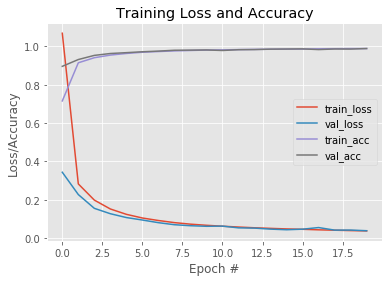

In [5]:
# Evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testData, batch_size=128)
print(classification_report(
    testLabels.argmax(axis=1),
    predictions.argmax(axis=1),
    target_names=[str(x) for x in le.classes_]
))

#plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()
